In [19]:
import random
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

###Assumptions about the Environment


*   The Robot can diffrentiate between moving and static obstacles. This is a major prior for us.
*   We assume that the robot can only view 5*5 i.e 2 places further.
*   In Conservative Setting, if obstacles are present in the robot view of 5*5. We move only one grid further. Else we move two grids and can move diagnolly too.



###Step 1: Base Line Implementation: Unknown Envrironment with conservative traversal

Initial Environment:


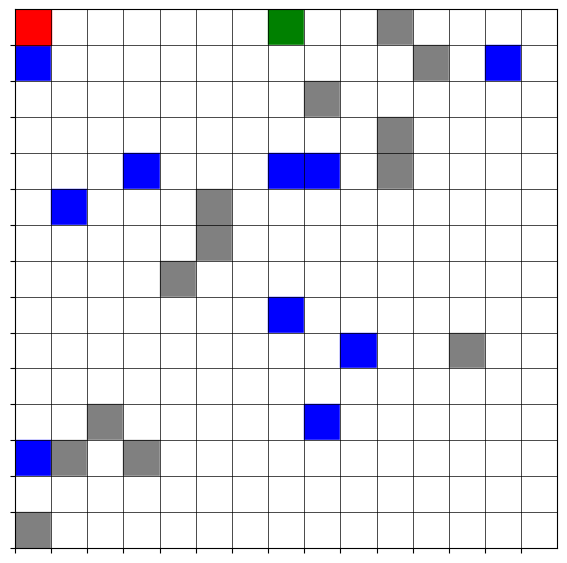


Iteration 1:


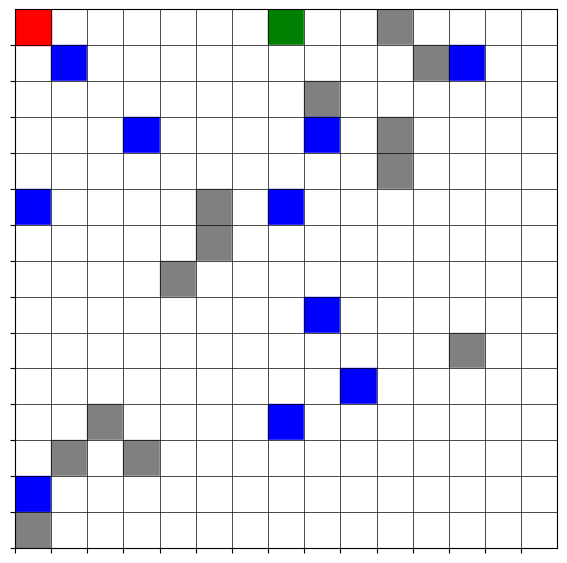

Robot's new position: (1, 0)

Iteration 2:


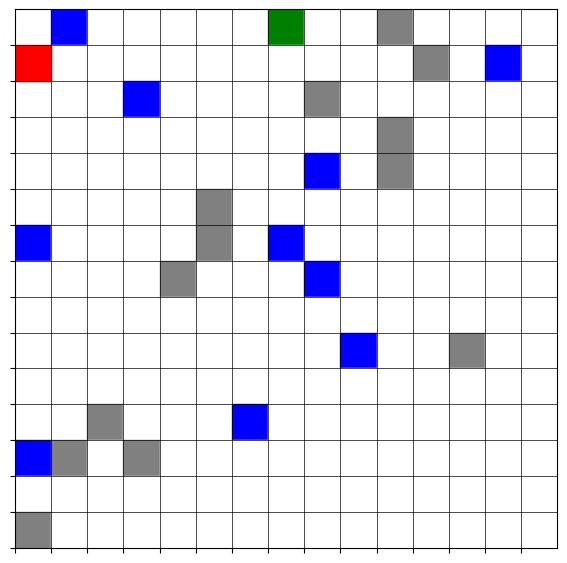

Robot's new position: (3, 0)

Iteration 3:


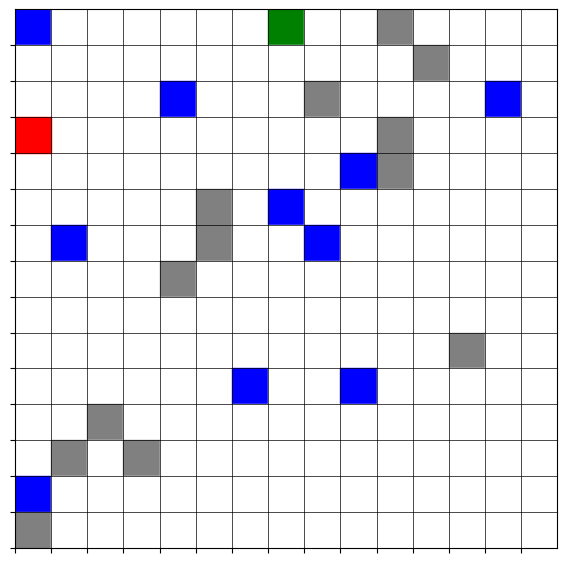

Robot's new position: (3, 2)

Iteration 4:


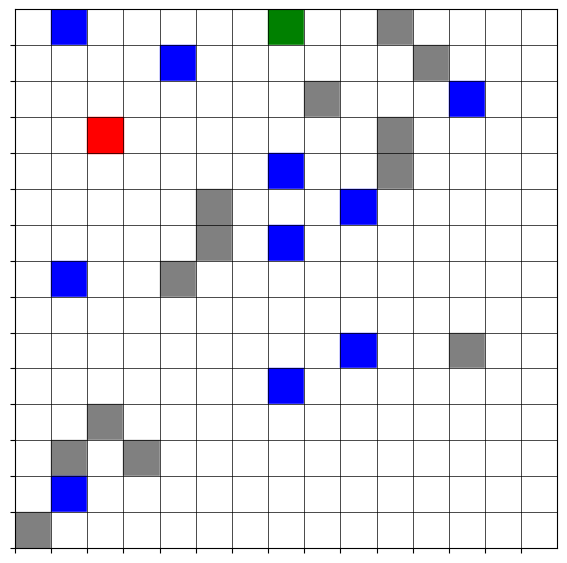

Robot's new position: (4, 1)

Iteration 5:


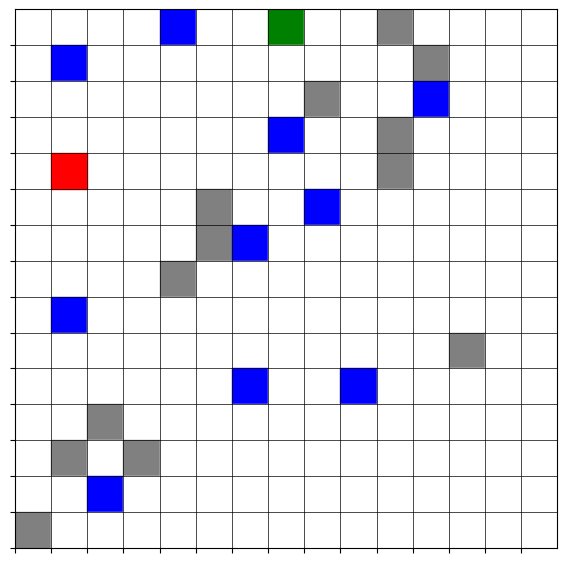

Robot's new position: (4, 3)

Iteration 6:


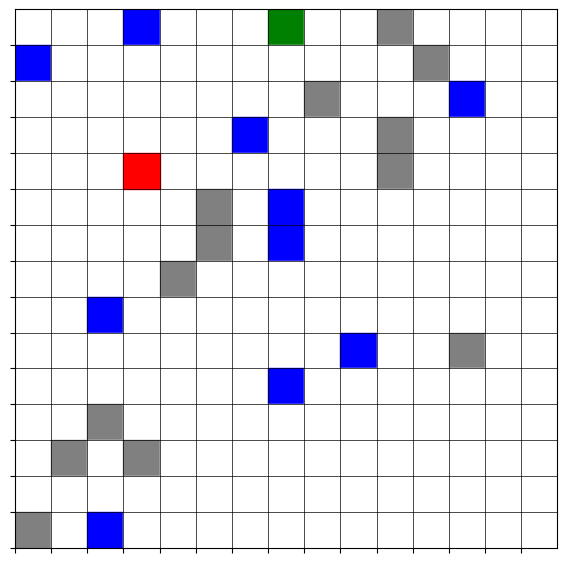

Robot's new position: (4, 2)

Iteration 7:


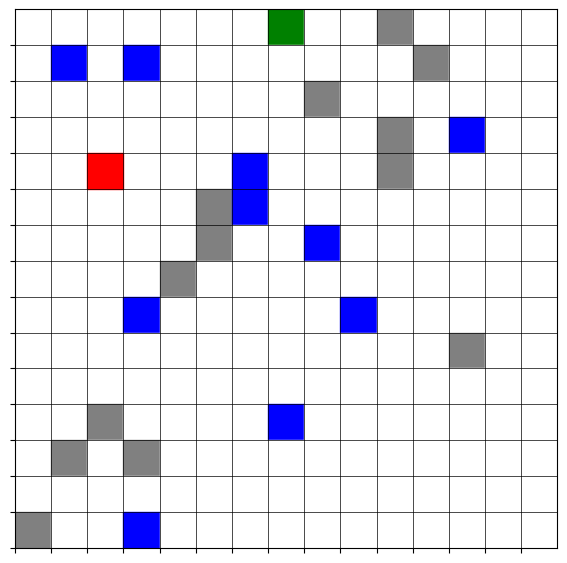

Robot's new position: (4, 0)

Iteration 8:


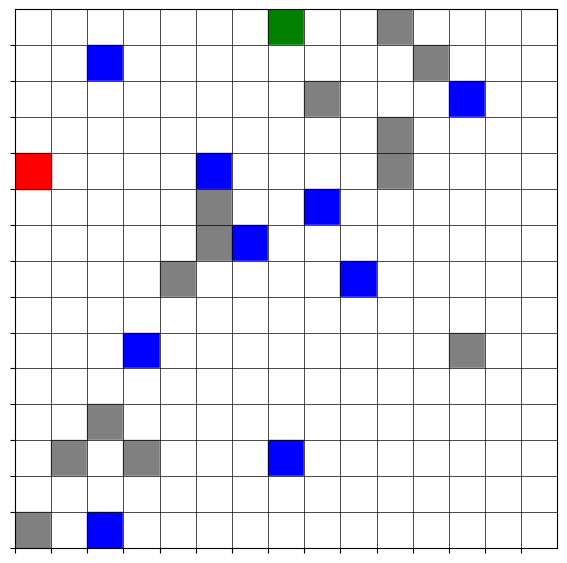

Robot's new position: (2, 0)

Iteration 9:


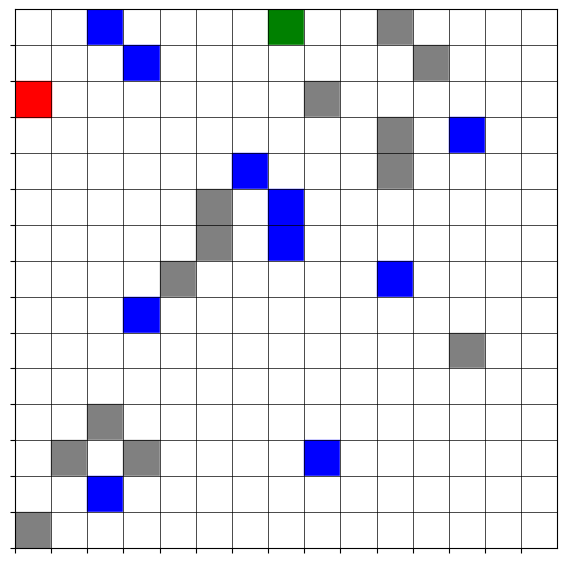

Robot's new position: (3, 1)

Iteration 10:


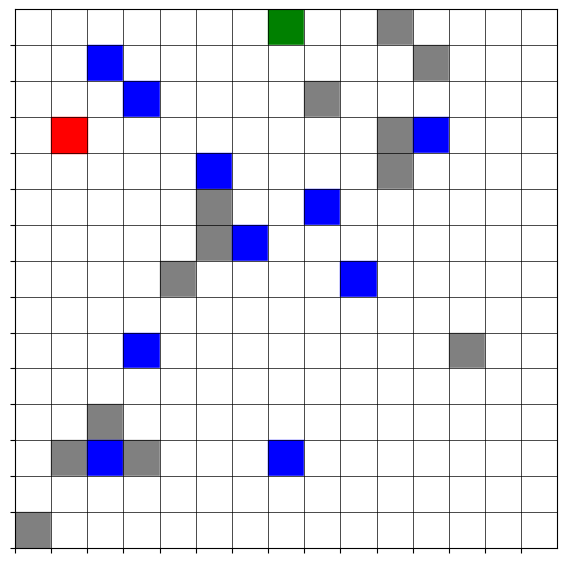

Robot's new position: (2, 1)

Iteration 11:


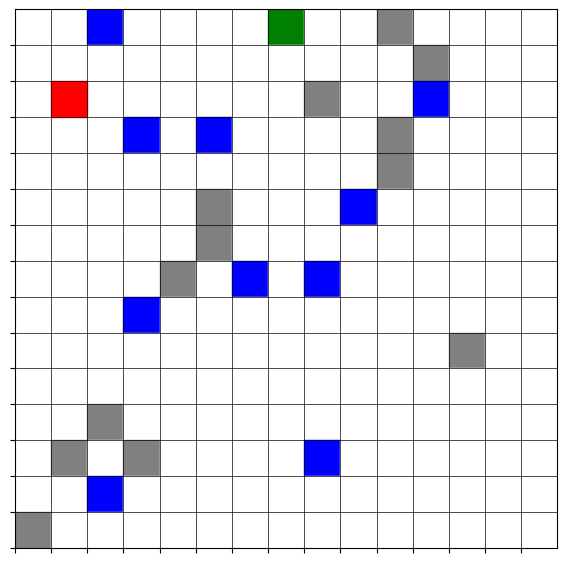

Robot's new position: (1, 1)

Iteration 12:


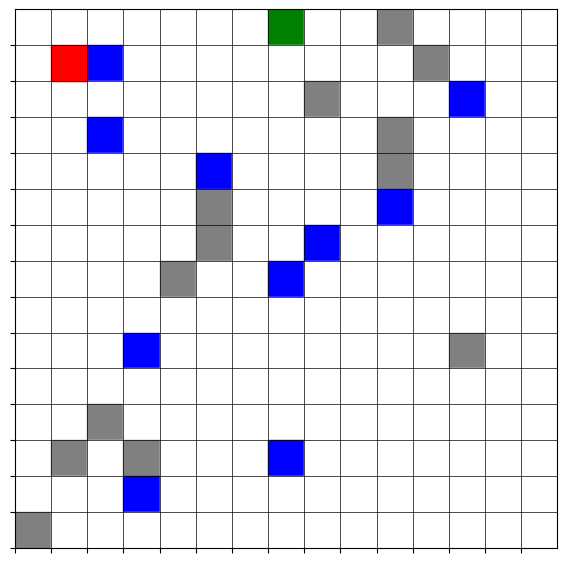

Robot's new position: (0, 2)

Iteration 13:


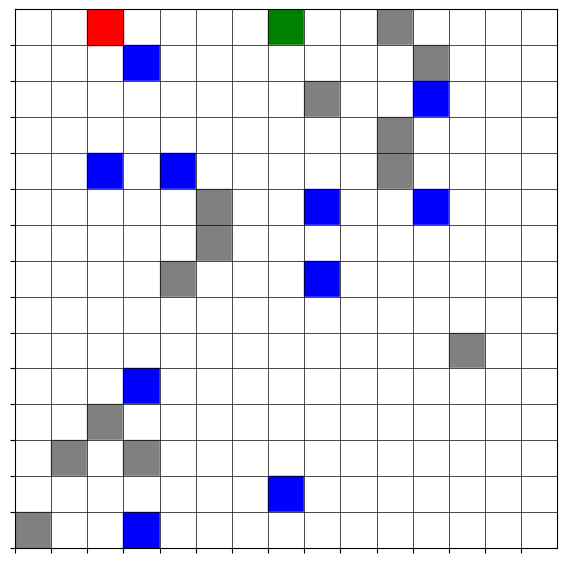

Robot's new position: (1, 2)

Iteration 14:


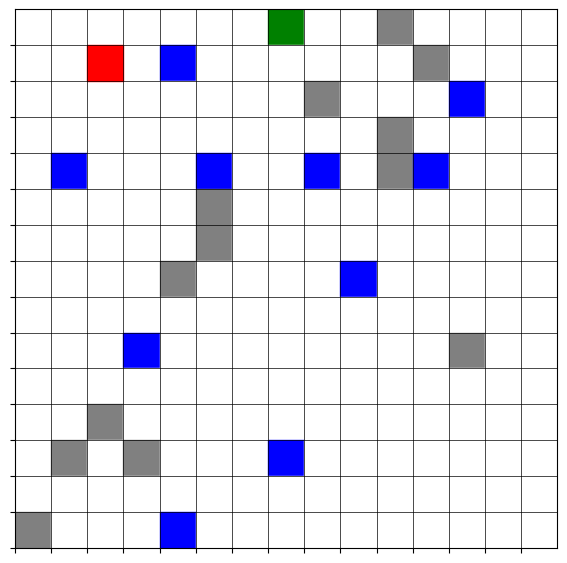

Robot's new position: (2, 2)

Iteration 15:


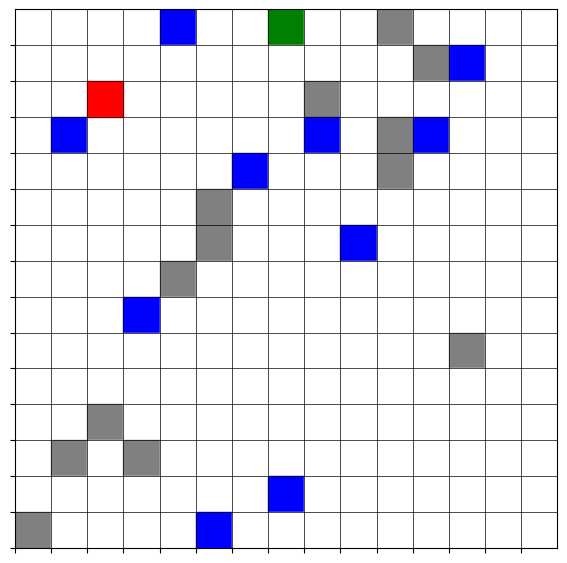

Robot's new position: (3, 3)

Iteration 16:


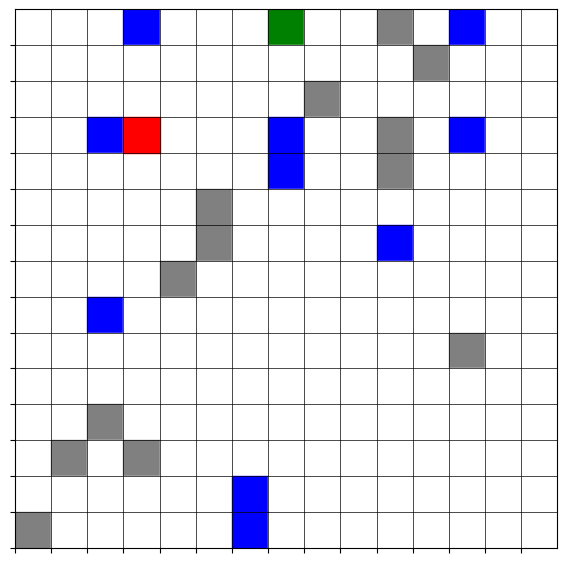

Robot's new position: (5, 3)

Iteration 17:


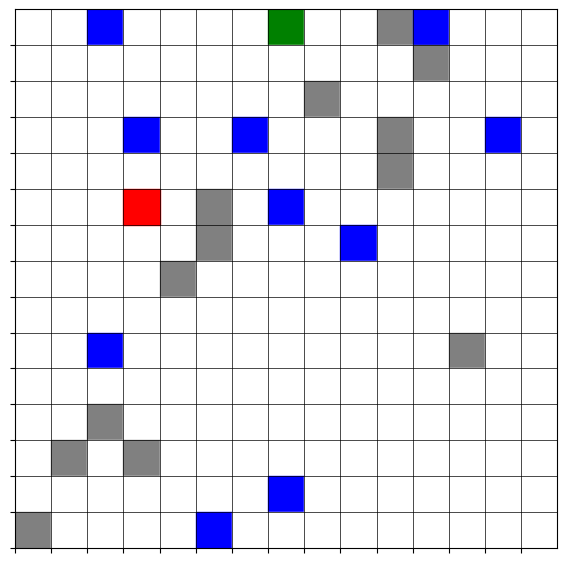

Robot's new position: (5, 2)

Iteration 18:


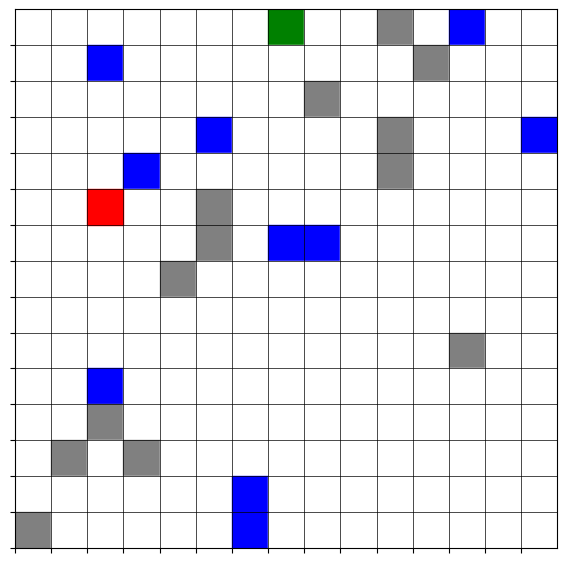

Robot's new position: (6, 2)

Iteration 19:


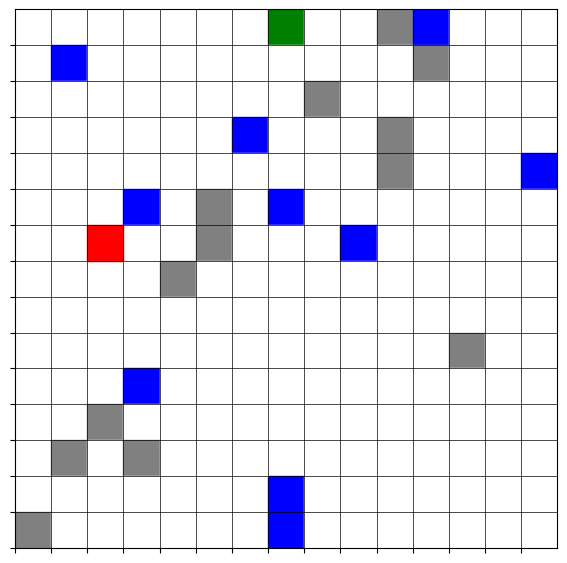

Robot's new position: (6, 1)

Iteration 20:


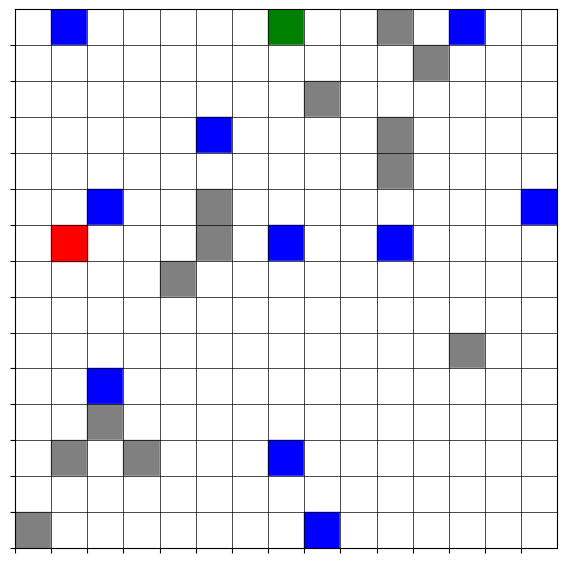

Robot's new position: (6, 0)

Iteration 21:


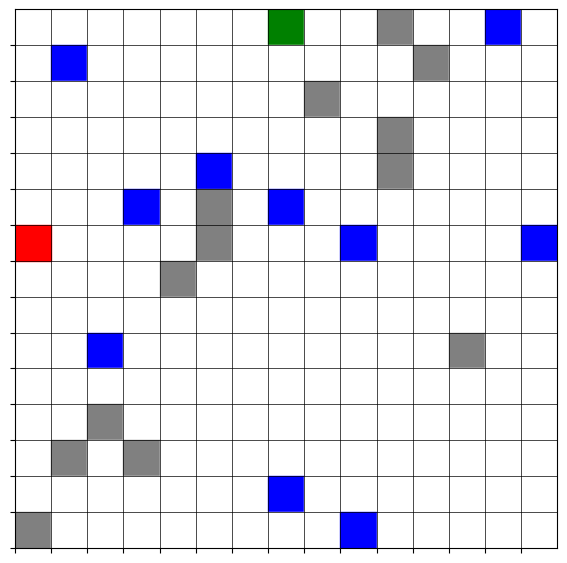

Robot's new position: (8, 0)

Iteration 22:


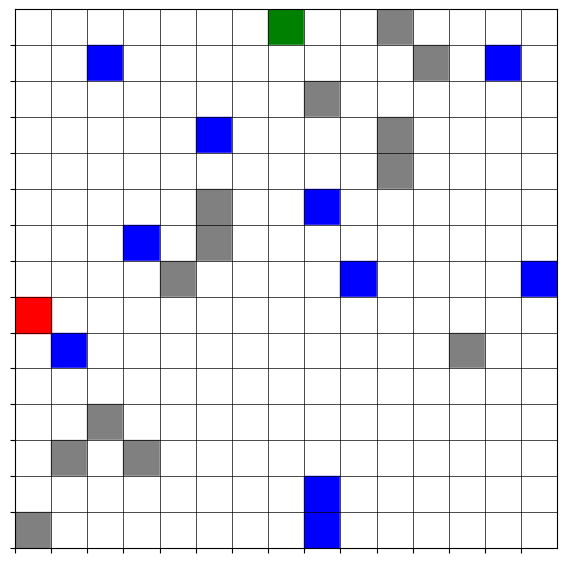

Robot's new position: (10, 0)

Iteration 23:


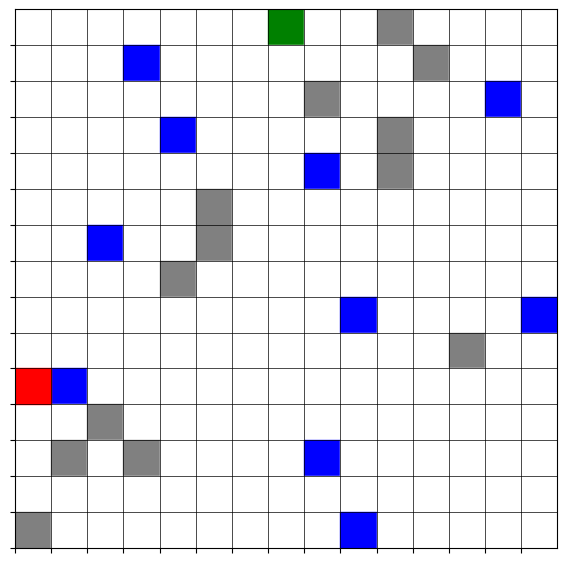

Robot's new position: (12, 0)

Iteration 24:


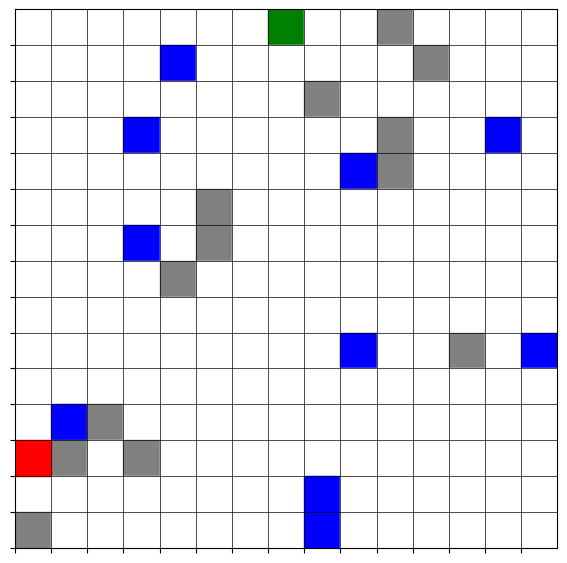

Robot's new position: (13, 1)

Iteration 25:


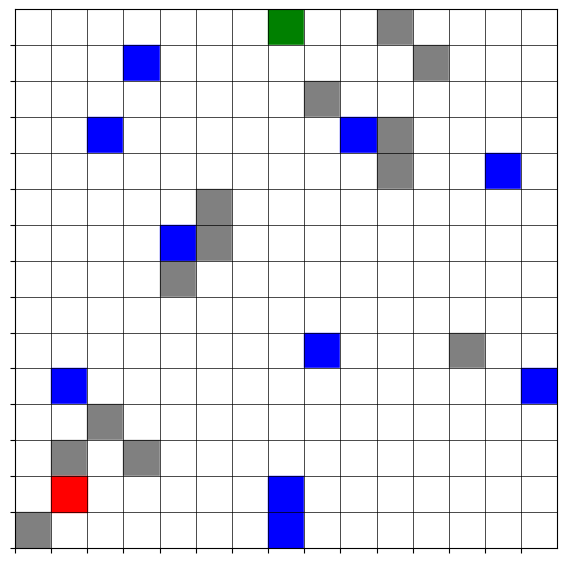

Robot's new position: (12, 2)

Iteration 26:


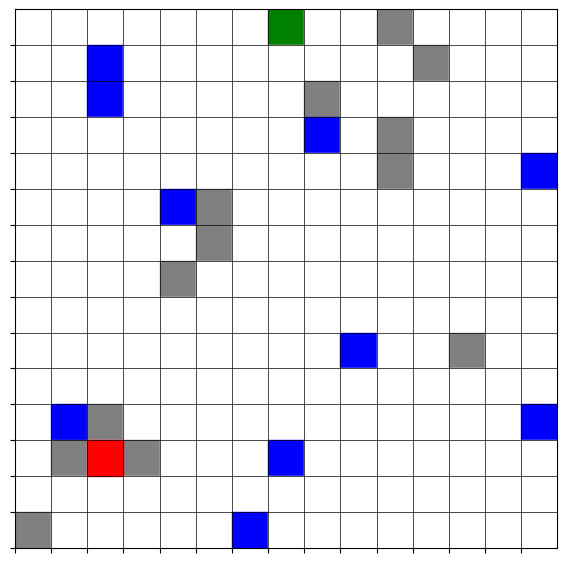

Robot's new position: (11, 3)

Iteration 27:


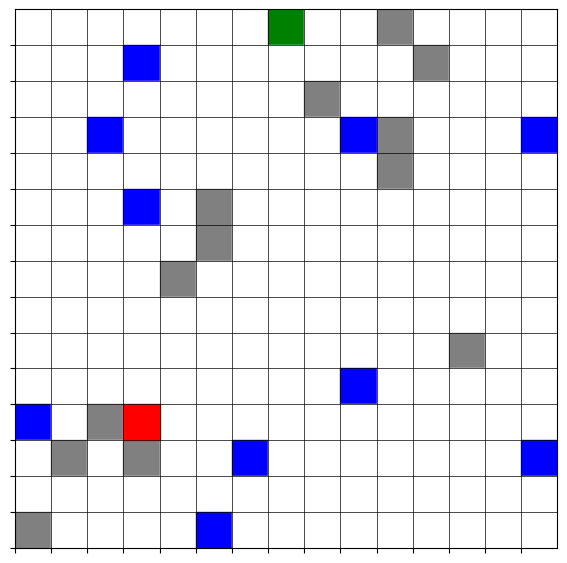

Robot's new position: (10, 3)

Iteration 28:


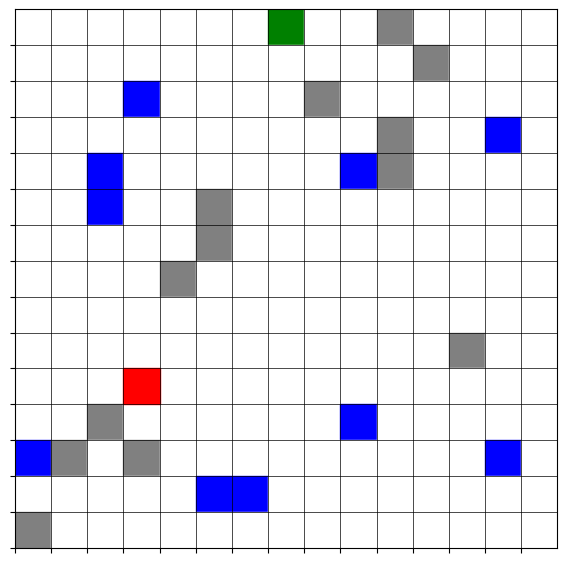

Robot's new position: (10, 4)

Iteration 29:


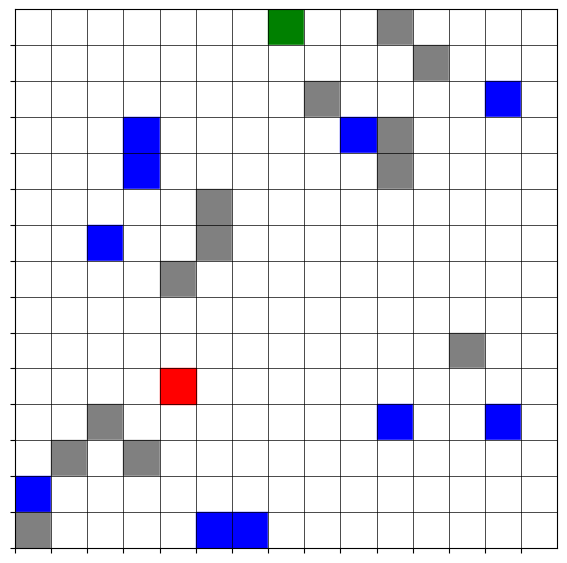

Robot's new position: (9, 5)

Iteration 30:


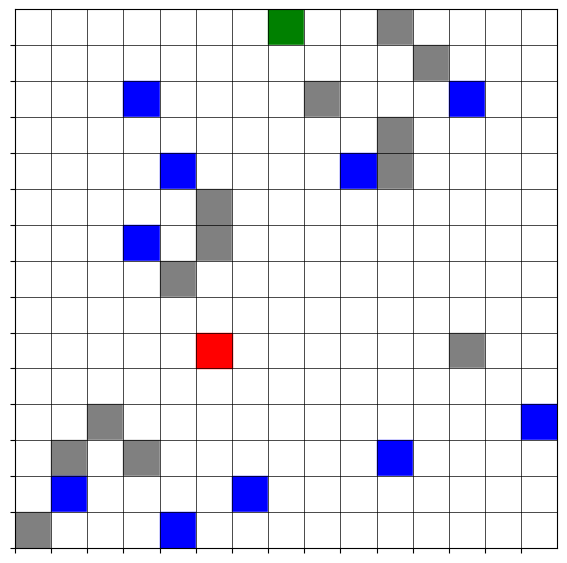

Robot's new position: (9, 3)

Iteration 31:


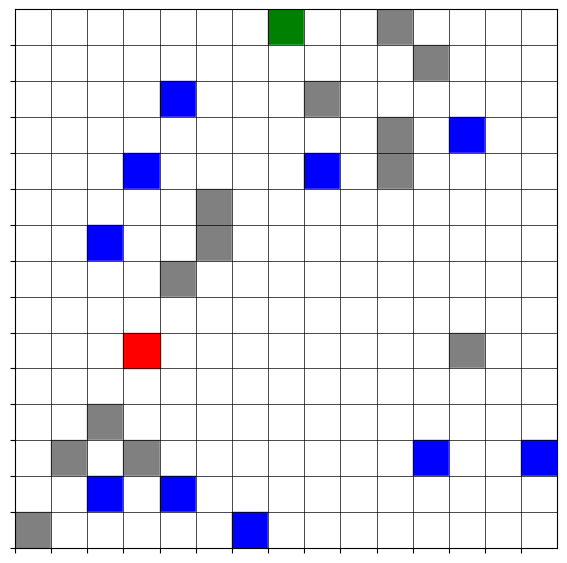

Robot's new position: (8, 2)

Iteration 32:


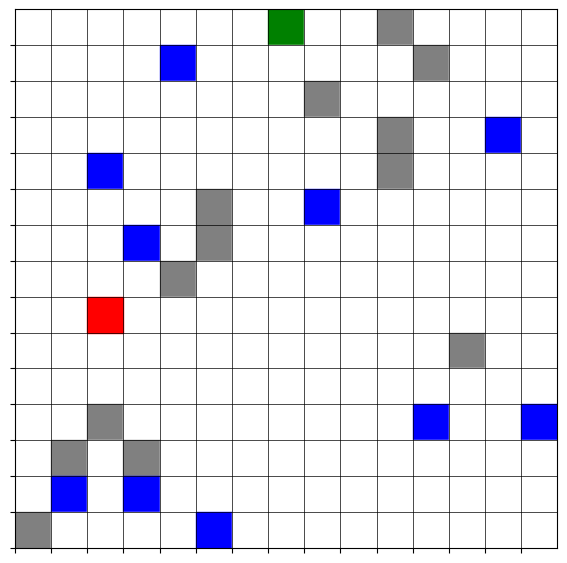

Robot's new position: (7, 1)

Iteration 33:


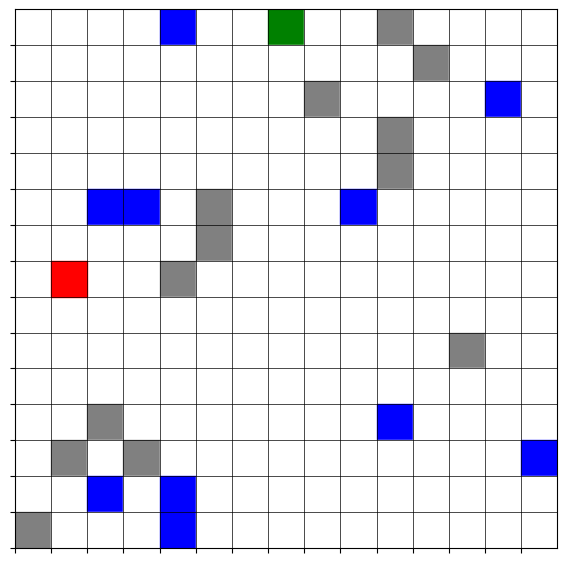

Robot's new position: (7, 0)

Iteration 34:


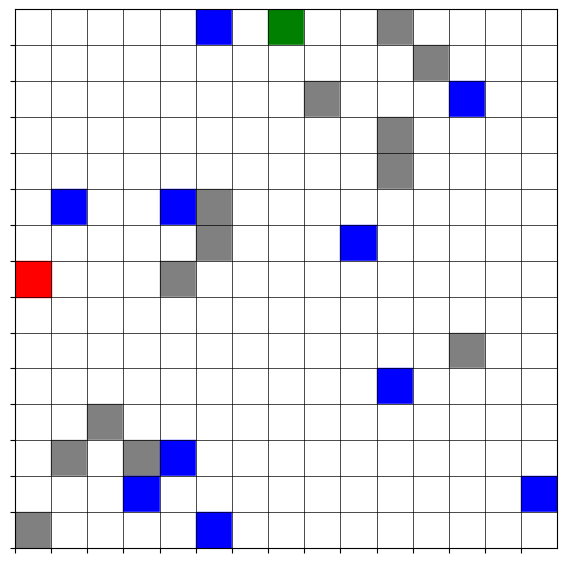

Robot's new position: (9, 0)

Iteration 35:


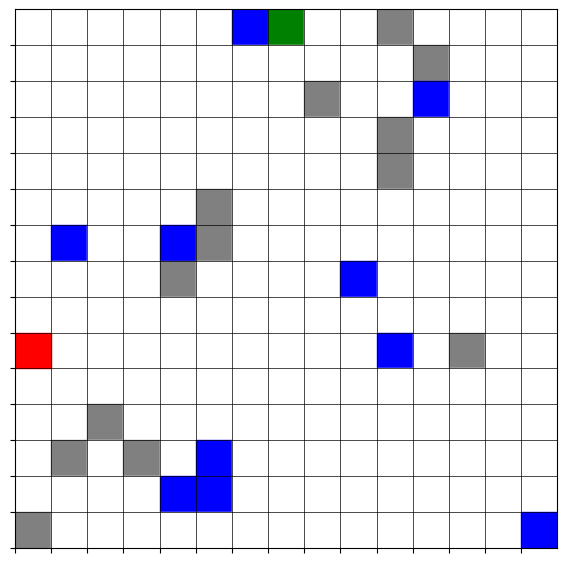

Robot's new position: (10, 1)

Iteration 36:


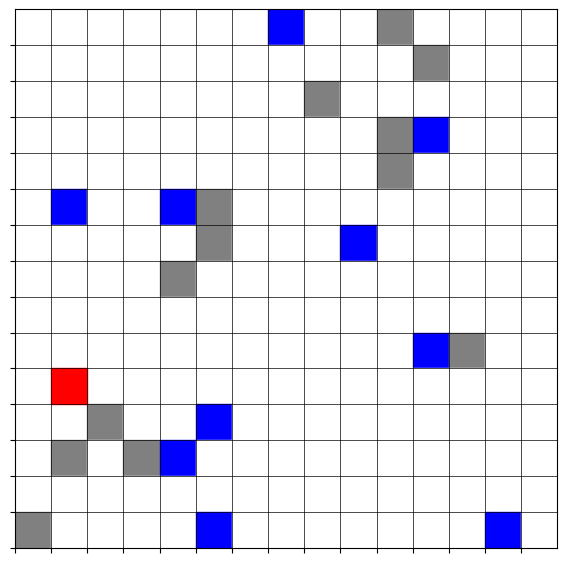

Robot's new position: (9, 1)

Iteration 37:


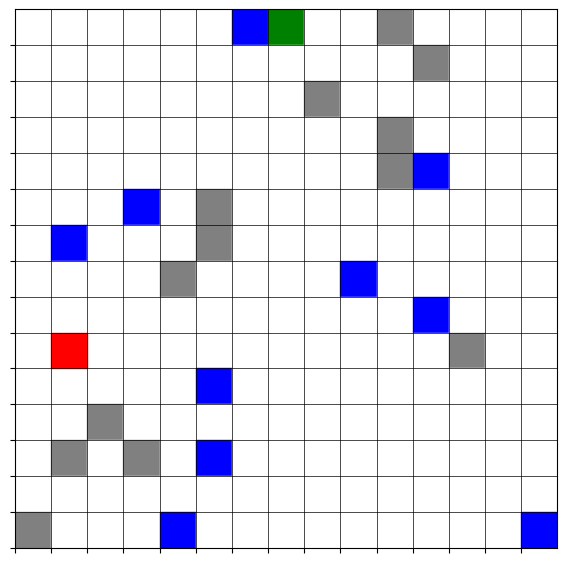

Robot's new position: (10, 2)

Iteration 38:


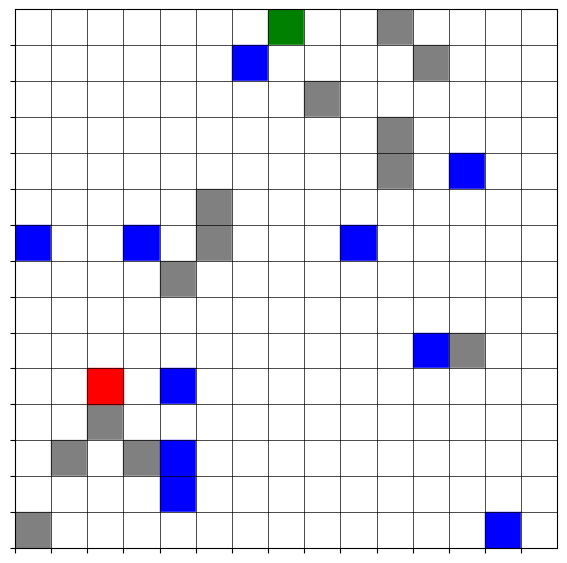

Robot's new position: (11, 1)

Iteration 39:


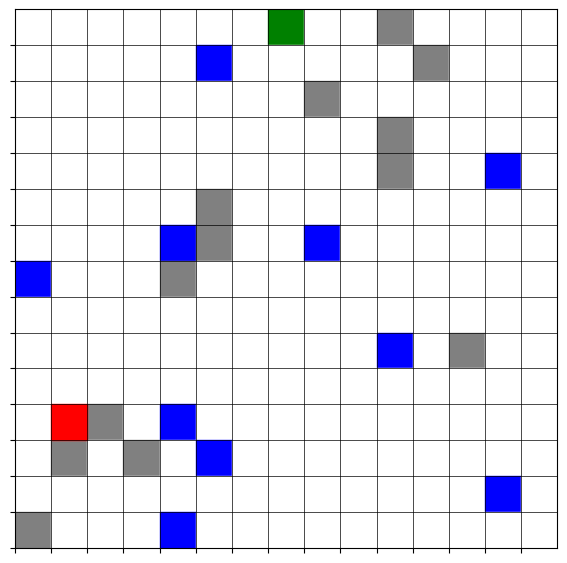

Robot's new position: (11, 0)

Iteration 40:


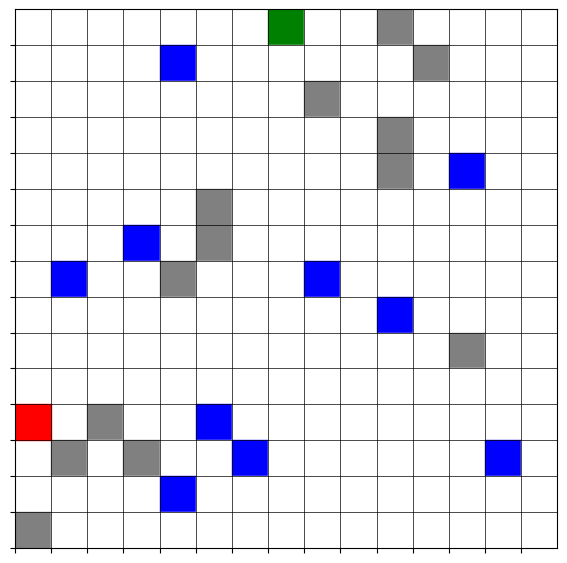

Robot's new position: (13, 0)

Iteration 41:


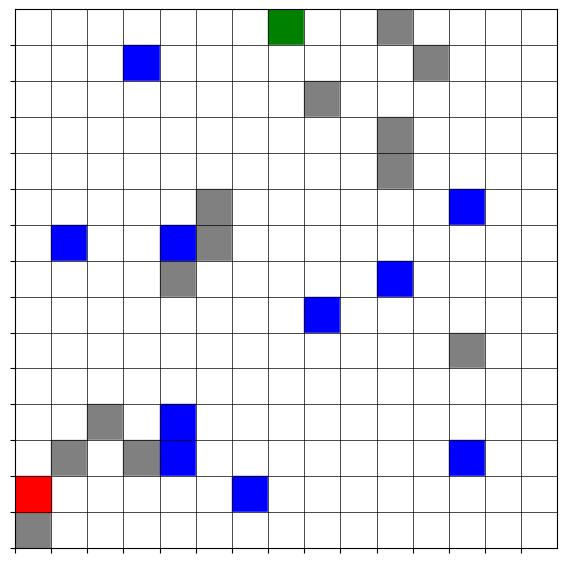

Robot's new position: (14, 1)

Iteration 42:


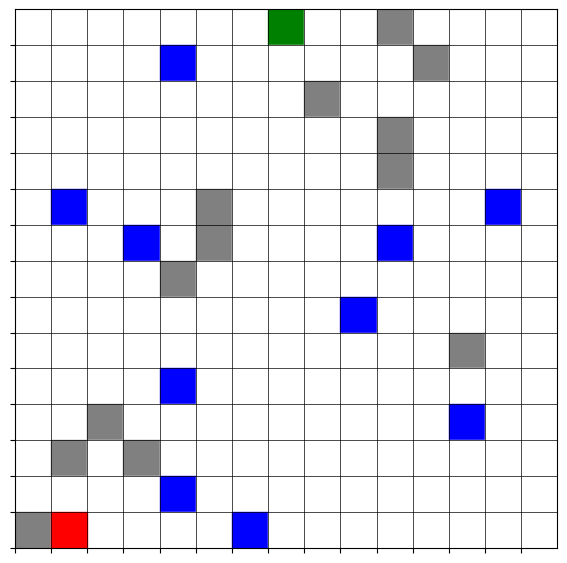

Robot's new position: (13, 2)

Iteration 43:


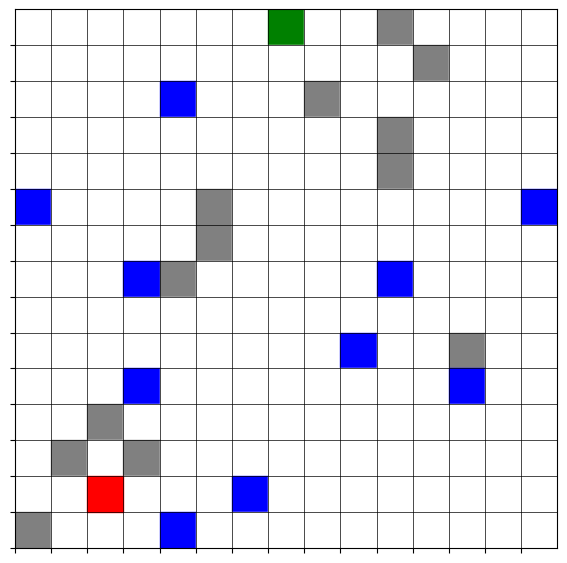

Robot's new position: (14, 3)

Iteration 44:


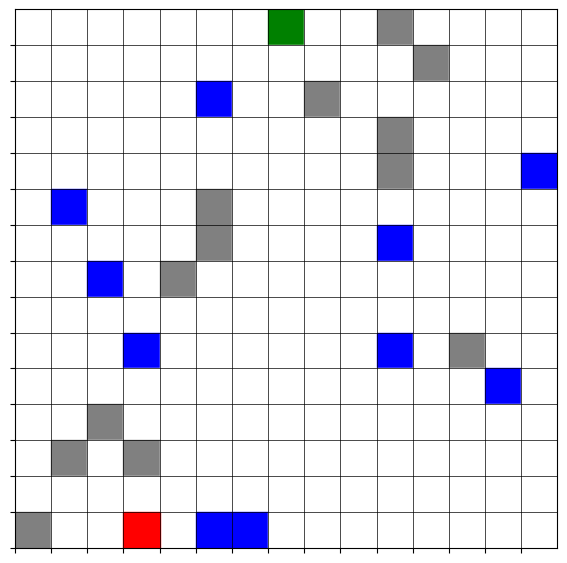

Robot's new position: (14, 2)

Iteration 45:


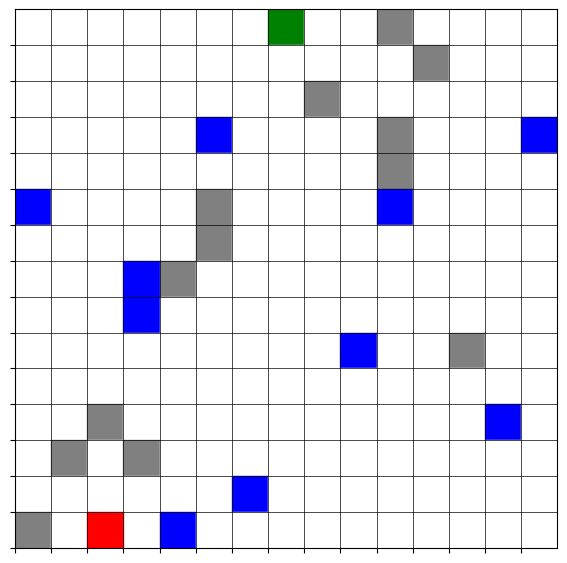

Robot's new position: (13, 3)

Iteration 46:


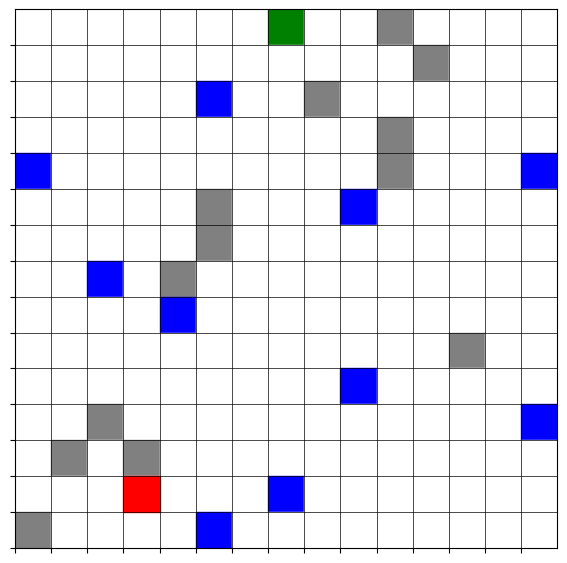

Robot's new position: (12, 4)

Iteration 47:


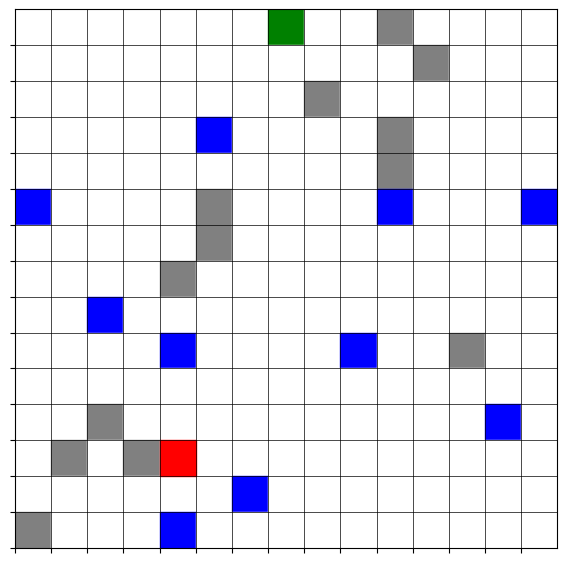

Robot's new position: (12, 5)

Iteration 48:


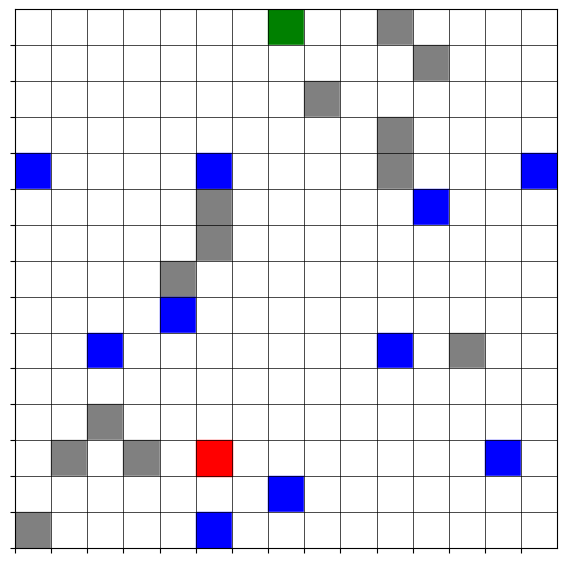

Robot's new position: (13, 4)

Iteration 49:


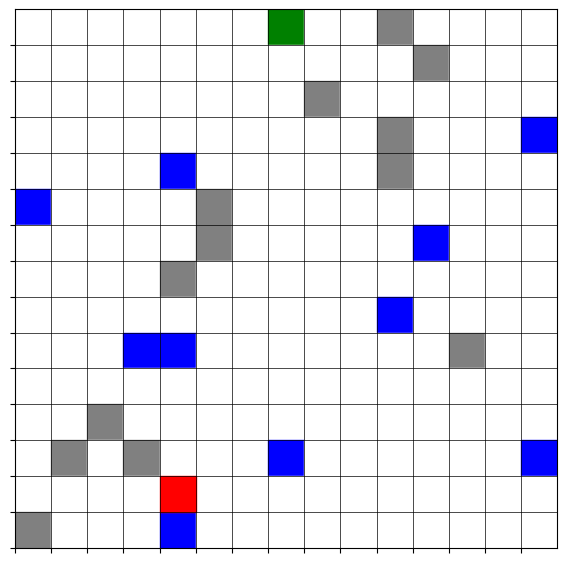

Robot's new position: (13, 5)

Iteration 50:


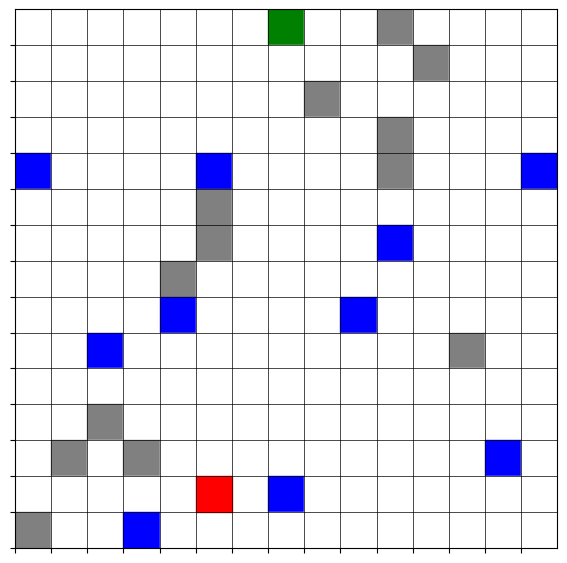

Robot's new position: (13, 6)

Iteration 51:


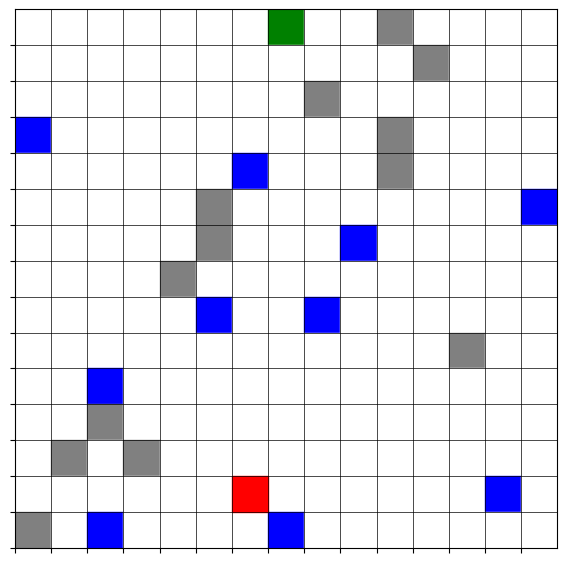

Robot's new position: (13, 7)

Iteration 52:


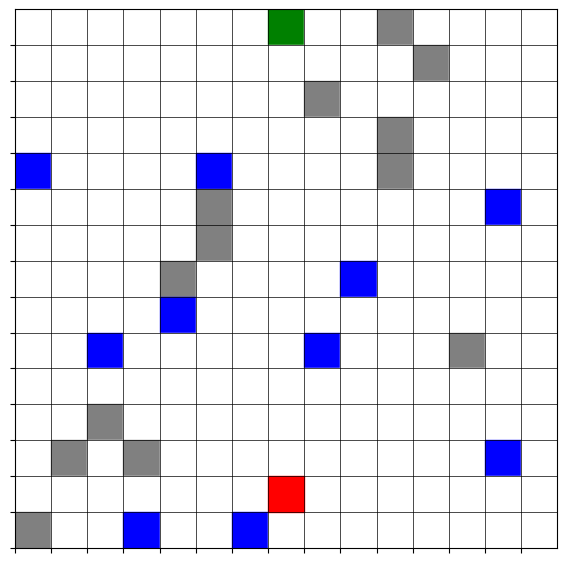

Robot's new position: (14, 8)

Iteration 53:


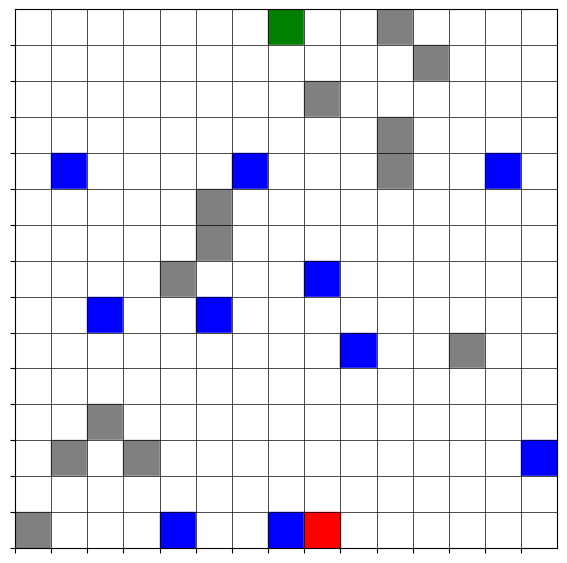

Robot's new position: (14, 6)

Iteration 54:


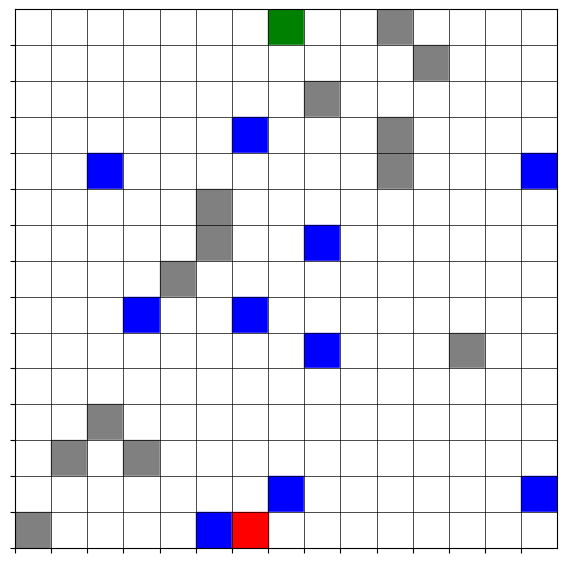

Robot's new position: (14, 7)

Iteration 55:


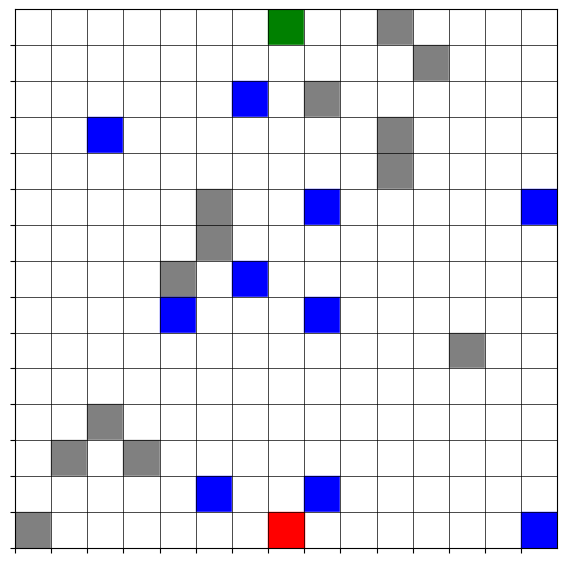

Robot's new position: (14, 5)

Iteration 56:


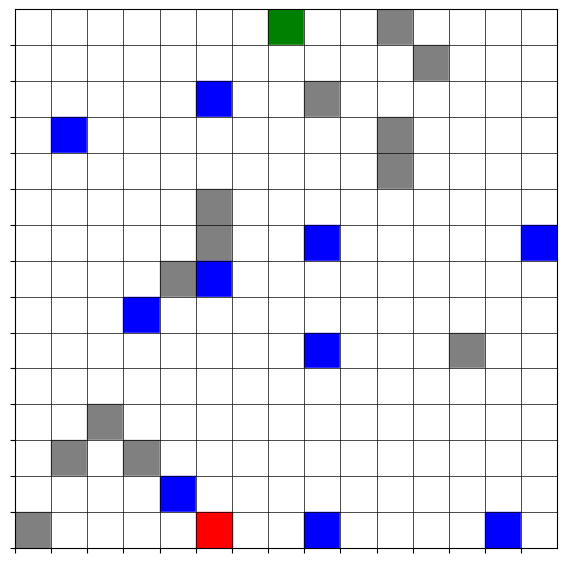

Robot's new position: (14, 4)

Iteration 57:


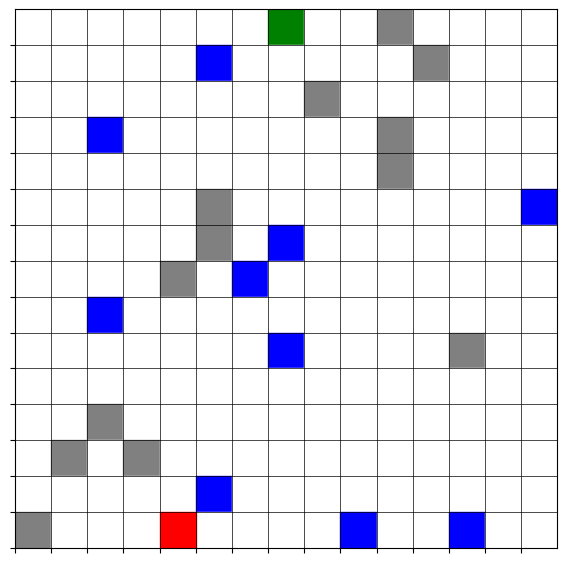

Robot's new position: (14, 4)

Iteration 58:


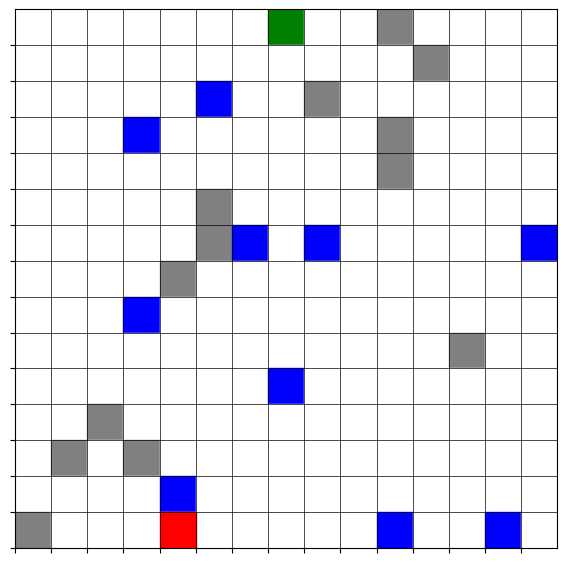

Robot's new position: (14, 4)

Iteration 59:


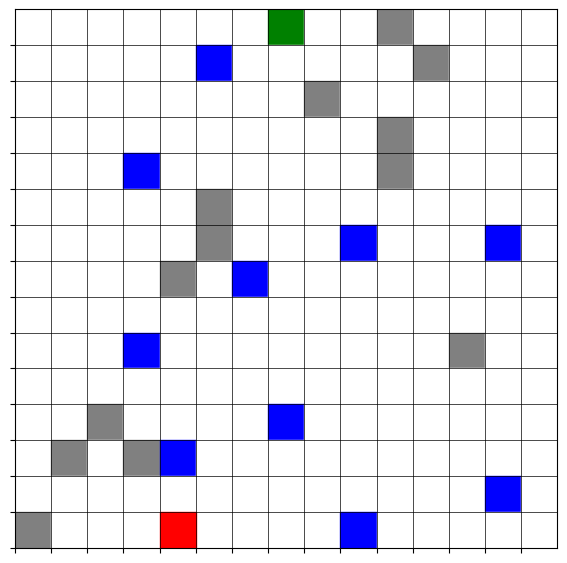

Robot's new position: (14, 4)

Iteration 60:


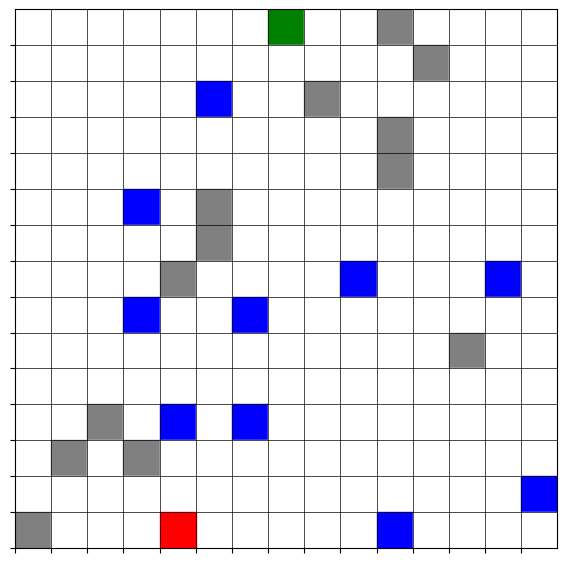

Robot's new position: (14, 4)

Iteration 61:


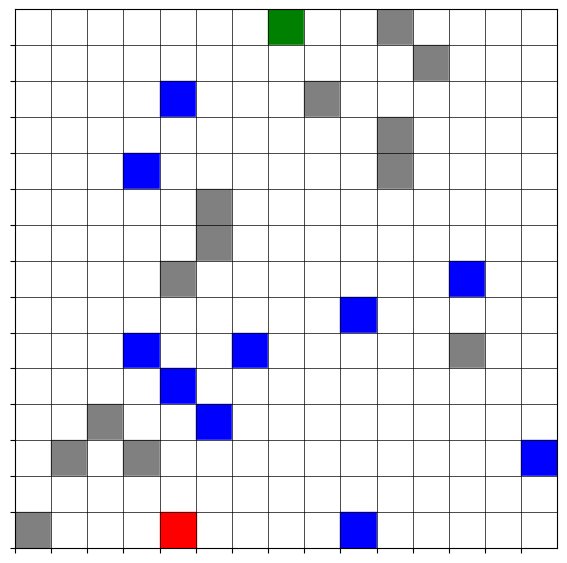

Robot's new position: (14, 4)

Iteration 62:


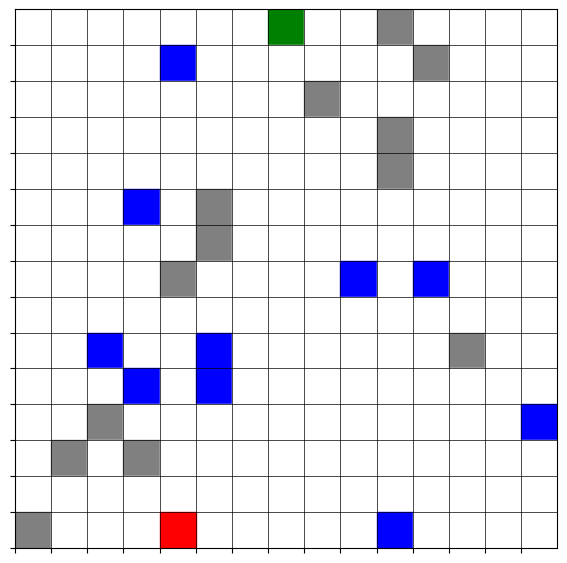

Robot's new position: (14, 4)

Iteration 63:


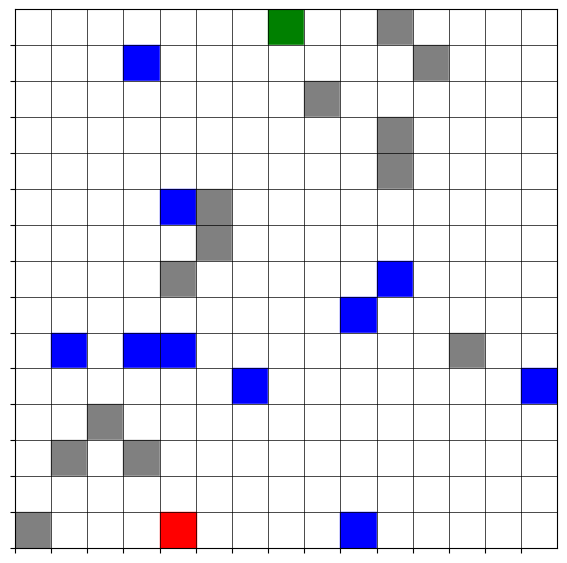

Robot's new position: (14, 4)

Iteration 64:


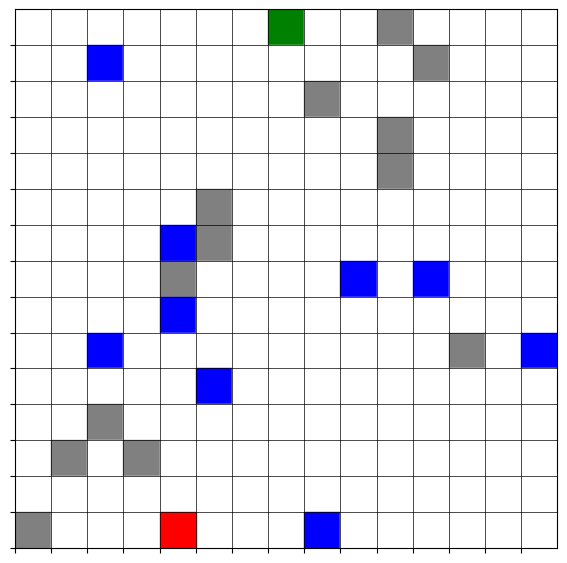

Robot's new position: (14, 4)

Iteration 65:


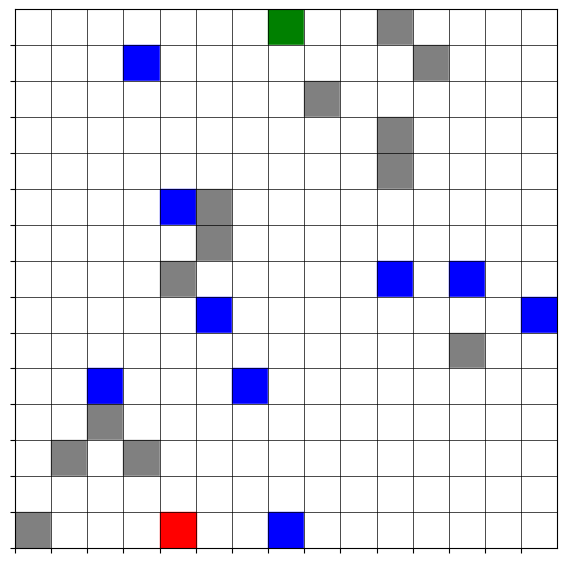

Robot's new position: (14, 4)

Iteration 66:


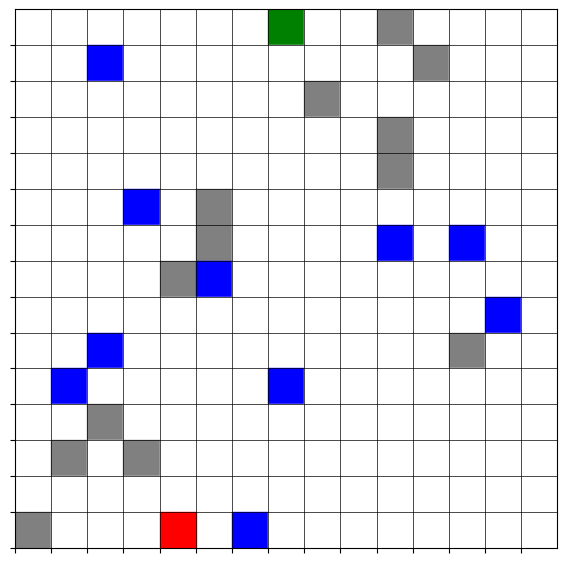

Robot's new position: (14, 4)

Iteration 67:


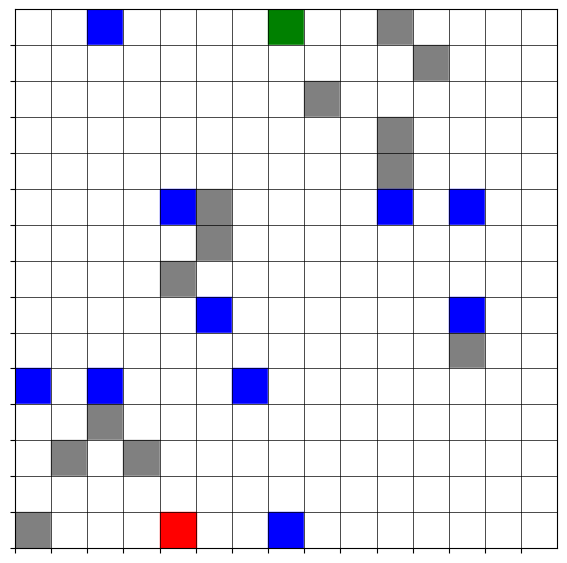

Robot's new position: (14, 4)

Iteration 68:


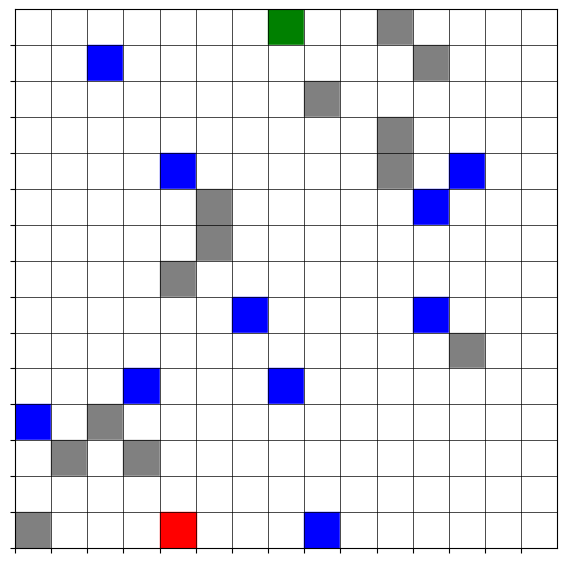

Robot's new position: (14, 4)

Iteration 69:


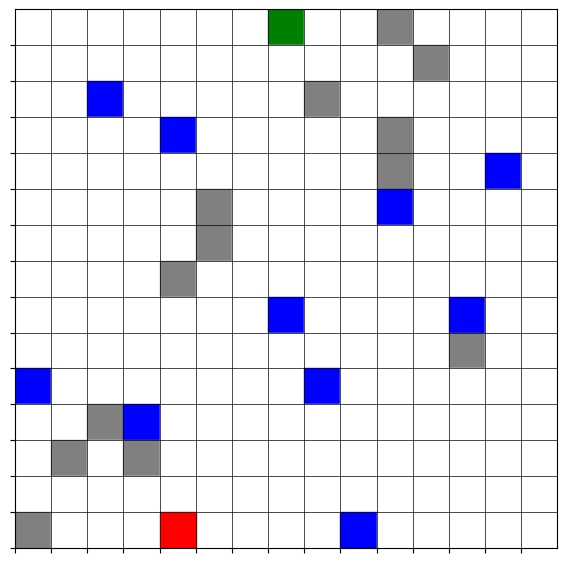

Robot's new position: (14, 4)

Iteration 70:


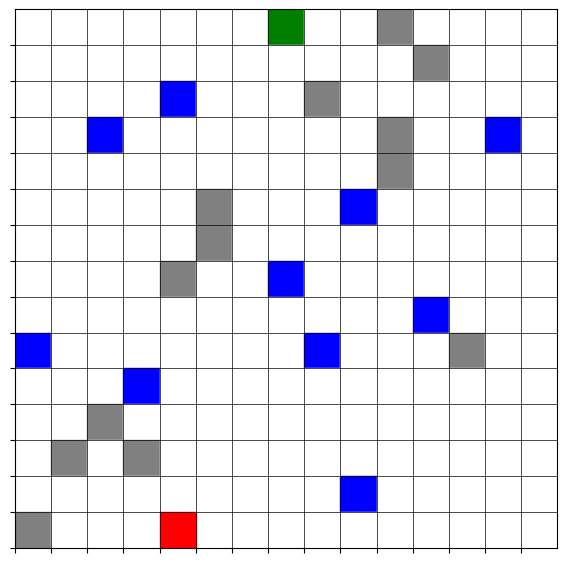

Robot's new position: (14, 4)

Iteration 71:


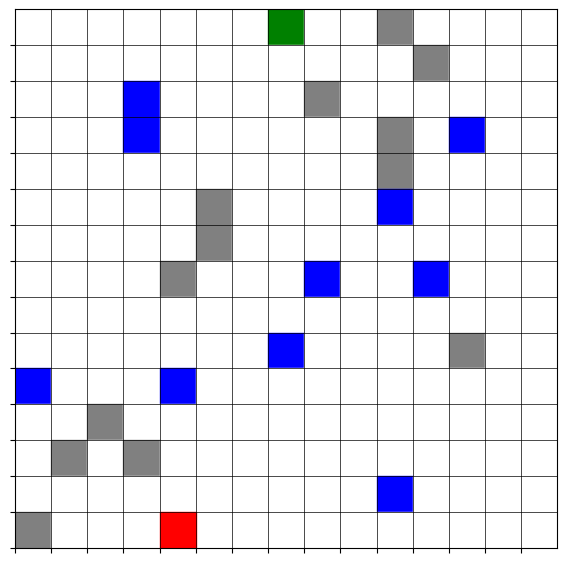

Robot's new position: (14, 4)

Iteration 72:


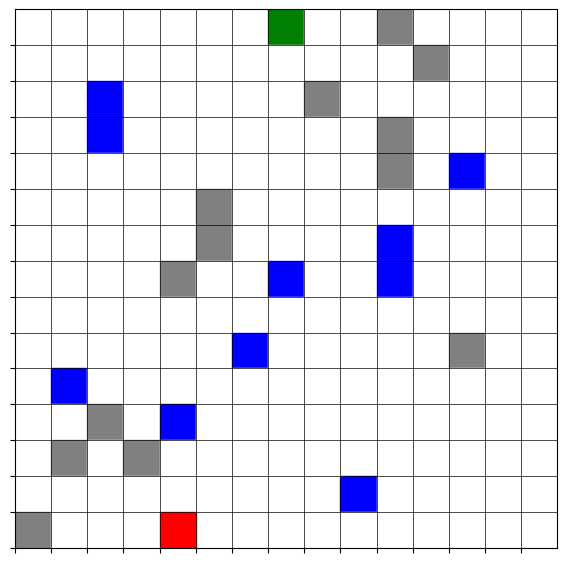

Robot's new position: (14, 4)

Iteration 73:


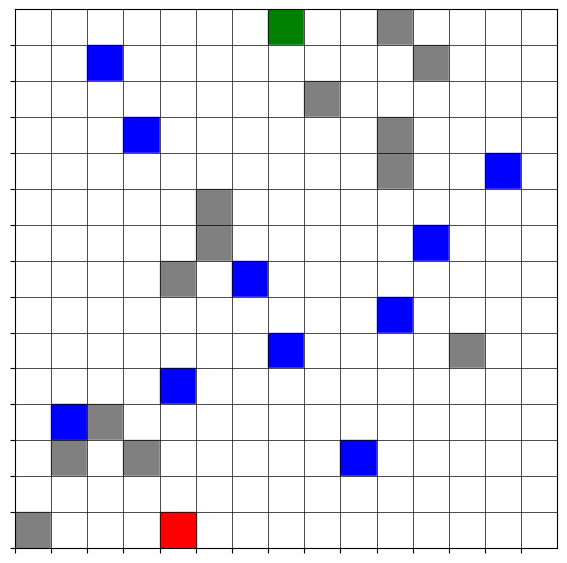

Robot's new position: (14, 4)

Iteration 74:


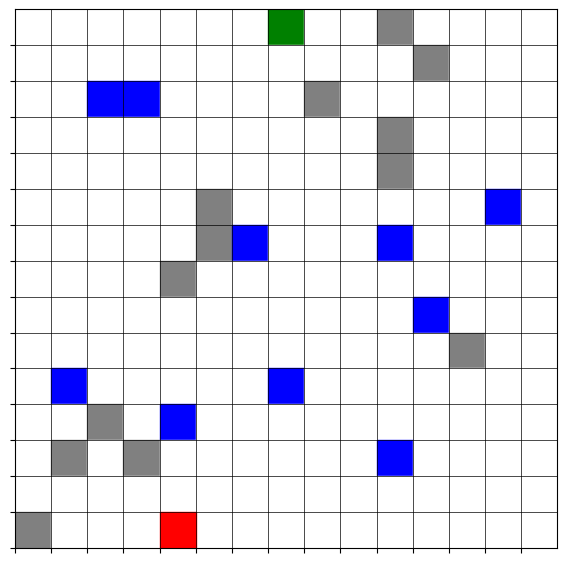

Robot's new position: (14, 4)

Iteration 75:


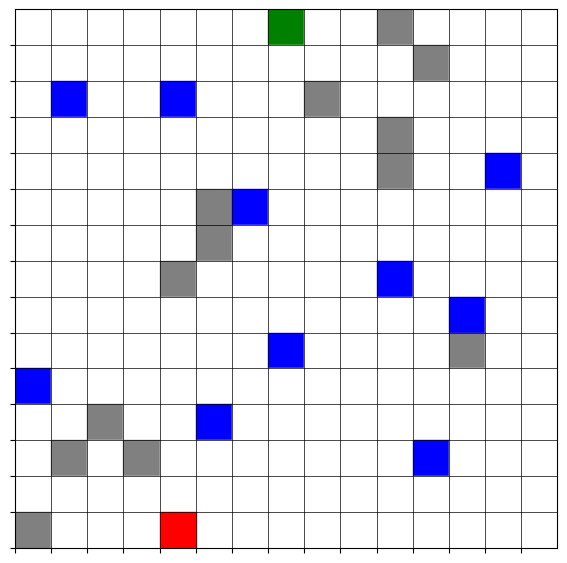

Robot's new position: (14, 4)

Iteration 76:


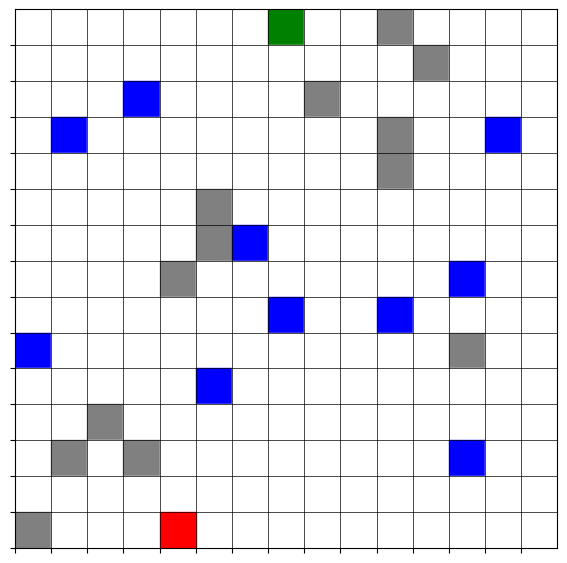

Robot's new position: (14, 4)

Iteration 77:


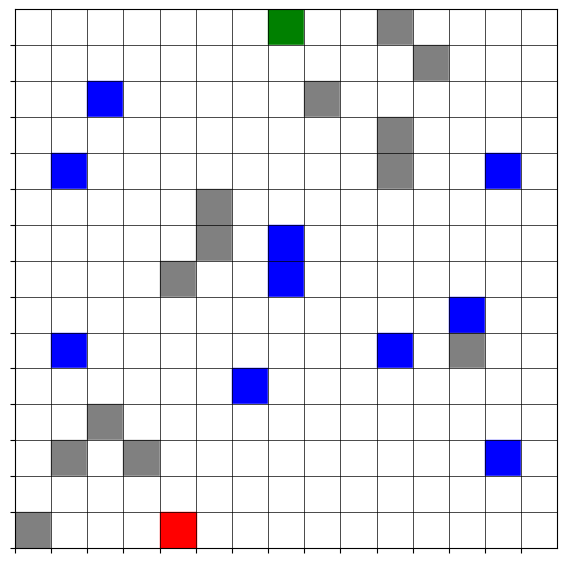

Robot's new position: (14, 4)

Iteration 78:


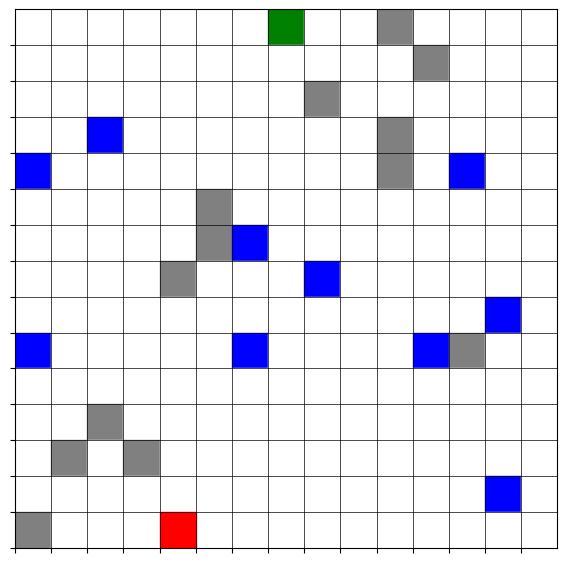

Robot's new position: (14, 4)

Iteration 79:


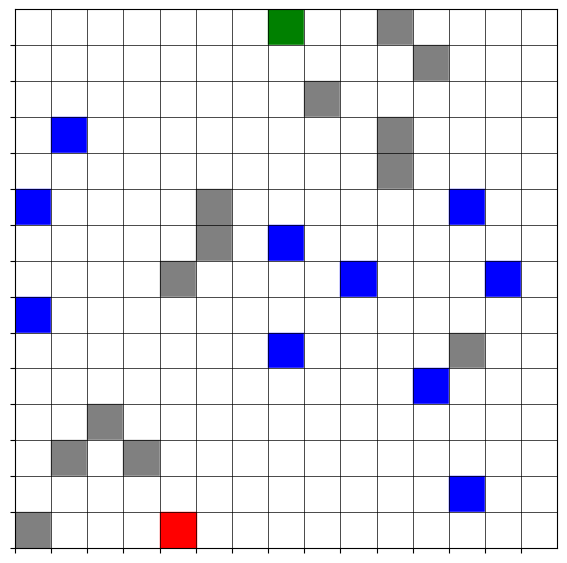

Robot's new position: (14, 4)

Iteration 80:


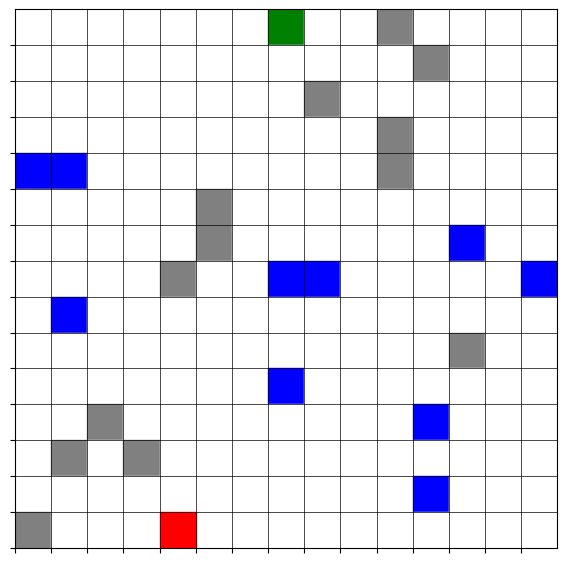

Robot's new position: (14, 4)

Iteration 81:


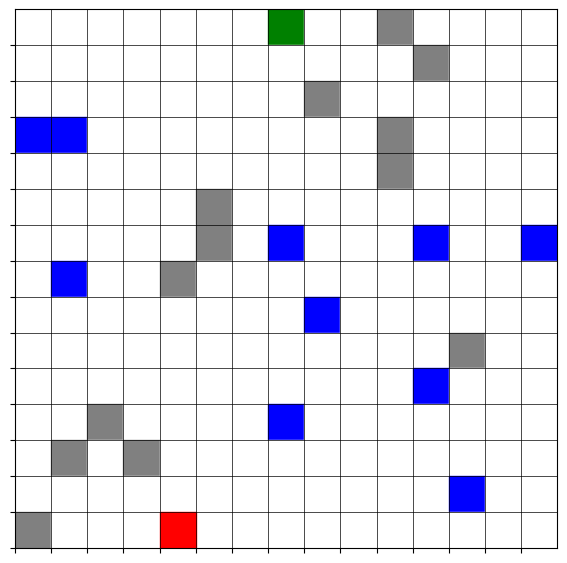

Robot's new position: (14, 4)

Iteration 82:


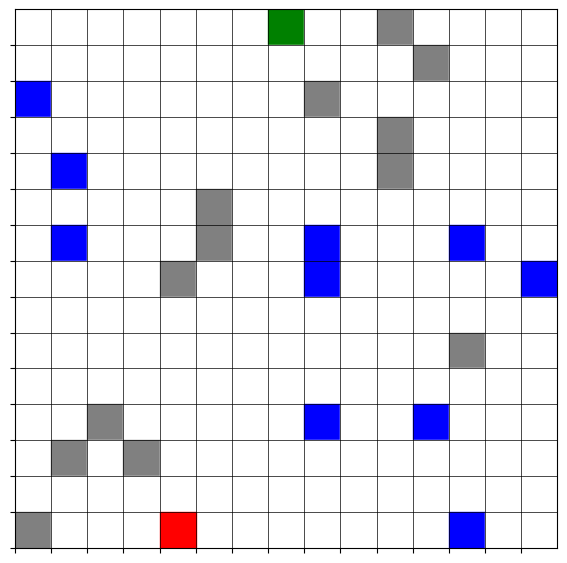

Robot's new position: (14, 4)

Iteration 83:


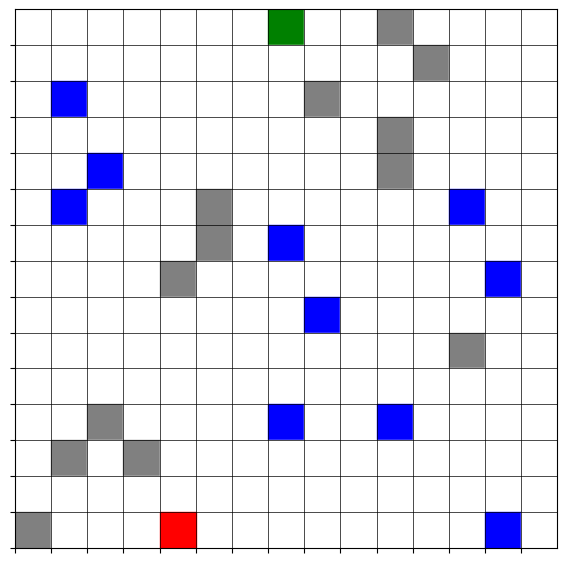

Robot's new position: (14, 4)

Iteration 84:


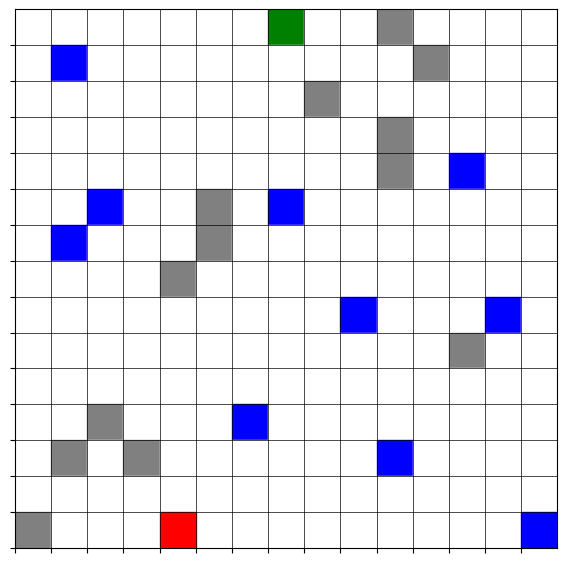

Robot's new position: (14, 4)

Iteration 85:


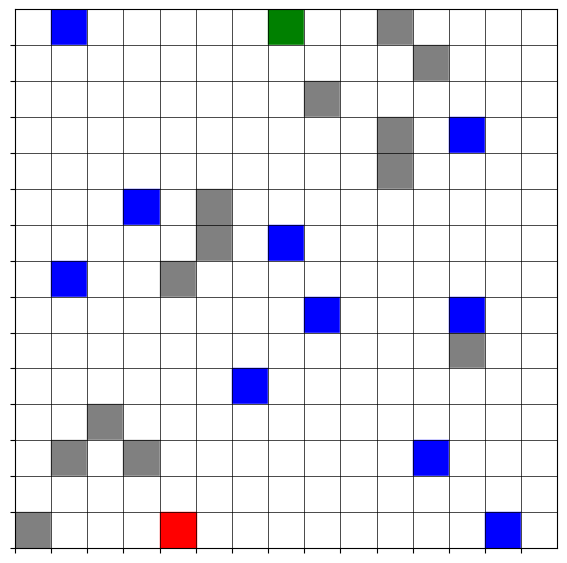

Robot's new position: (14, 4)

Iteration 86:


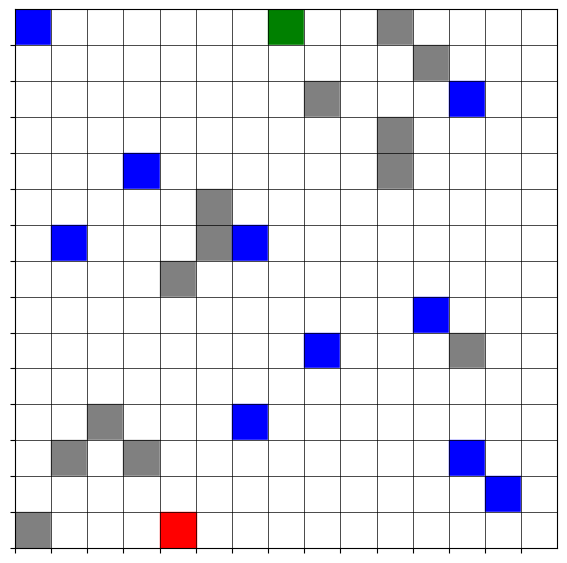

Robot's new position: (14, 4)

Iteration 87:


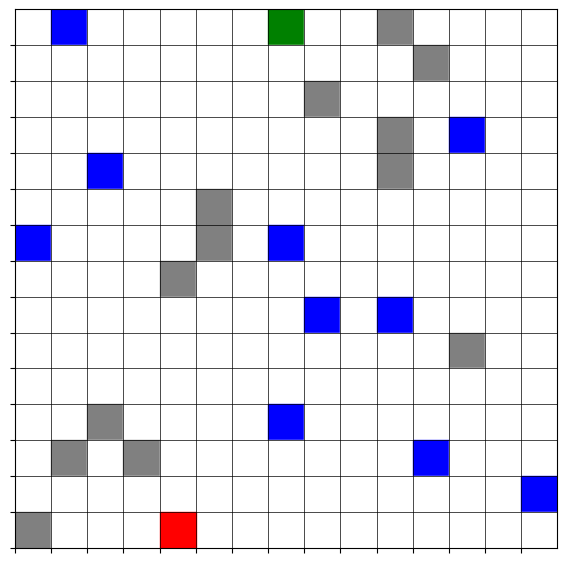

Robot's new position: (14, 4)

Iteration 88:


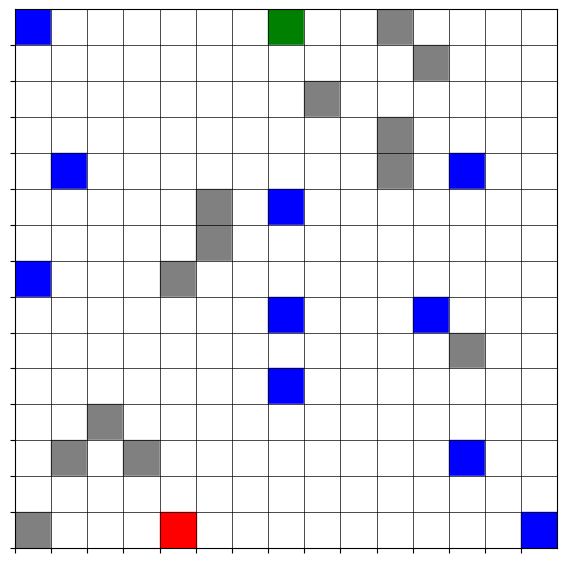

Robot's new position: (14, 4)

Iteration 89:


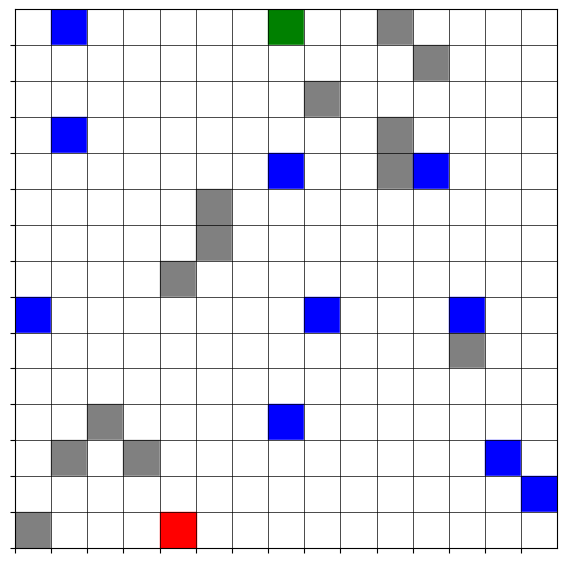

Robot's new position: (14, 4)

Iteration 90:


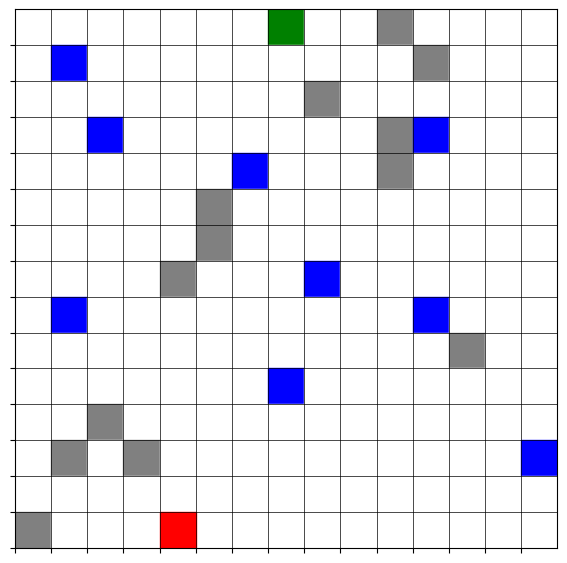

Robot's new position: (14, 4)

Iteration 91:


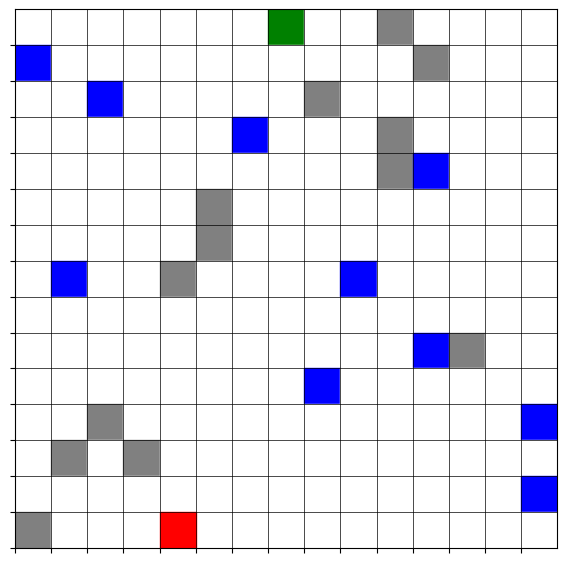

Robot's new position: (14, 4)

Iteration 92:


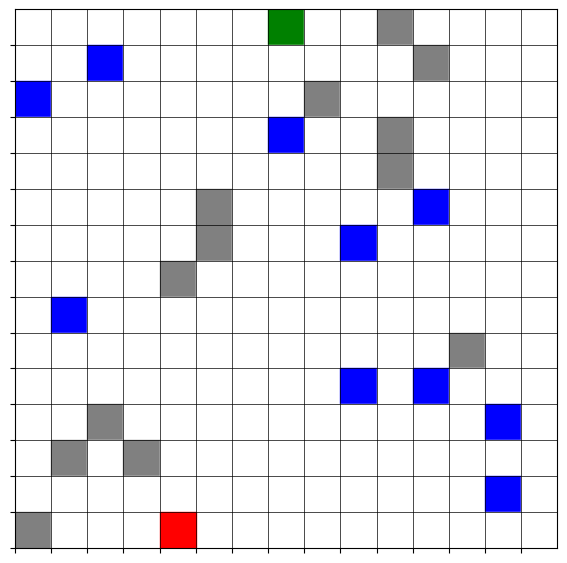

Robot's new position: (14, 4)

Iteration 93:


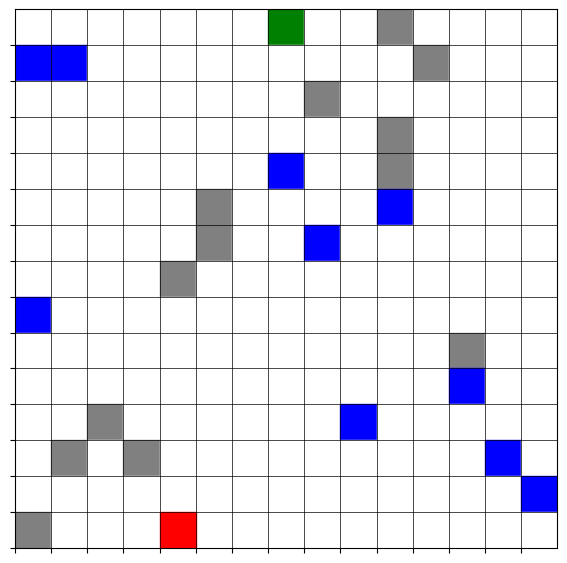

Robot's new position: (14, 4)

Iteration 94:


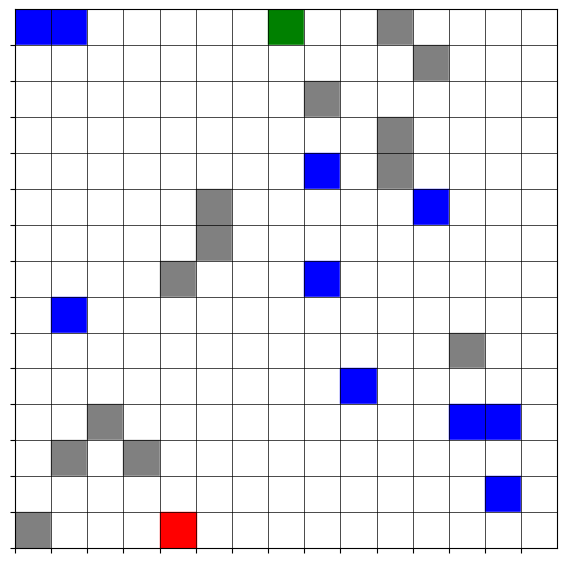

Robot's new position: (14, 4)

Iteration 95:


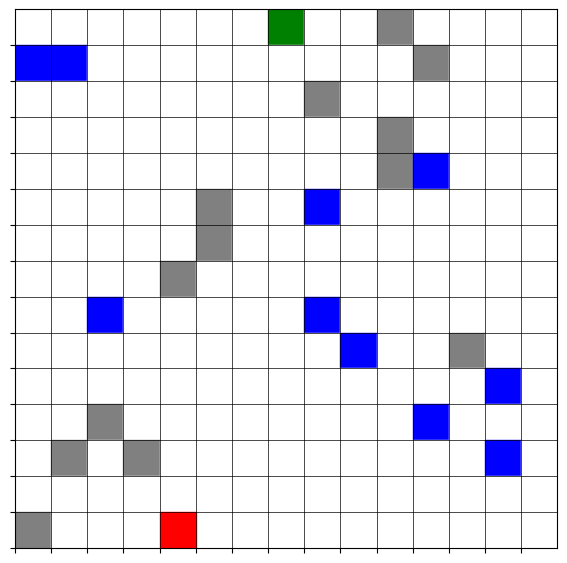

Robot's new position: (14, 4)

Iteration 96:


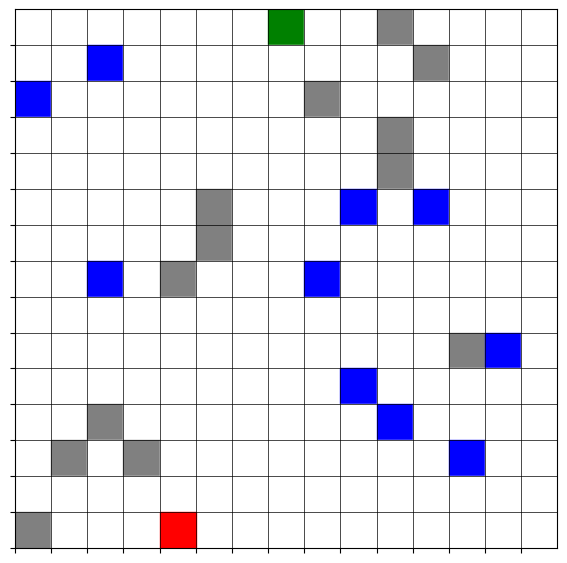

Robot's new position: (14, 4)

Iteration 97:


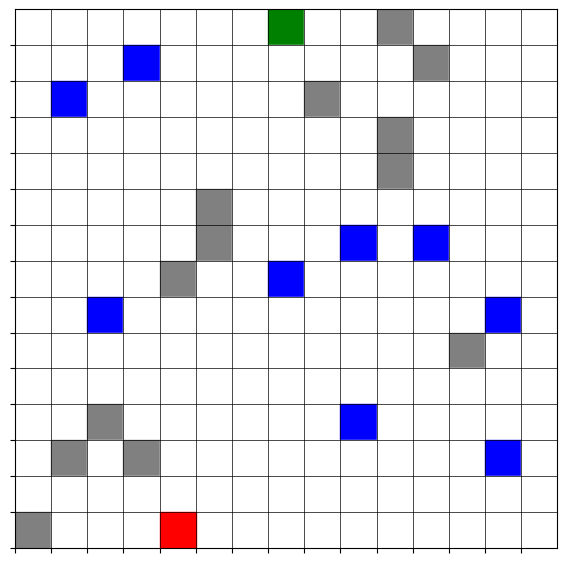

Robot's new position: (14, 4)

Iteration 98:


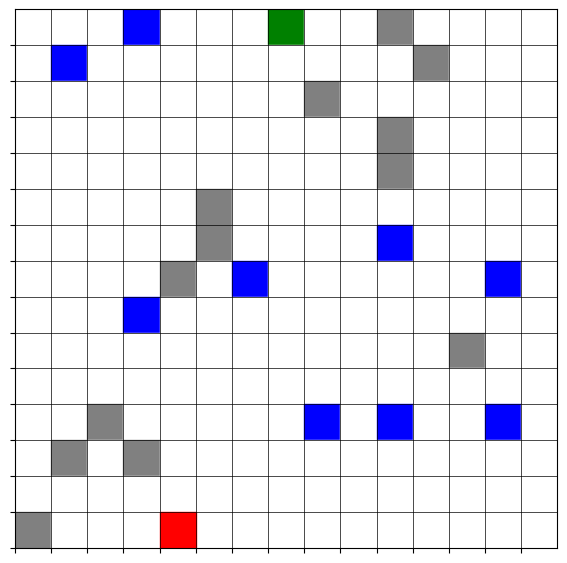

Robot's new position: (14, 4)

Iteration 99:


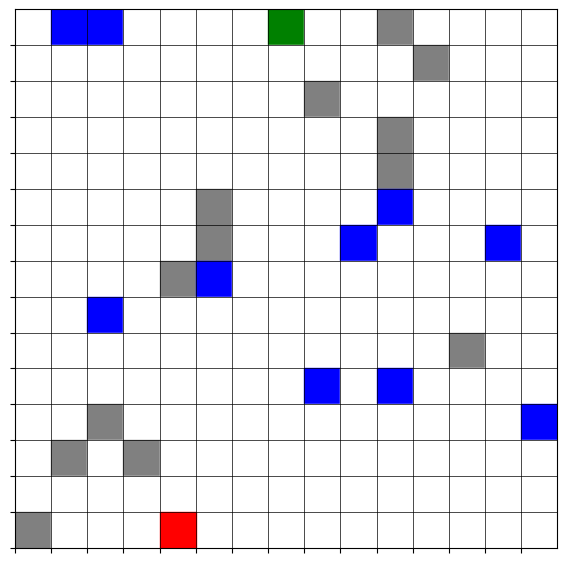

Robot's new position: (14, 4)

Iteration 100:


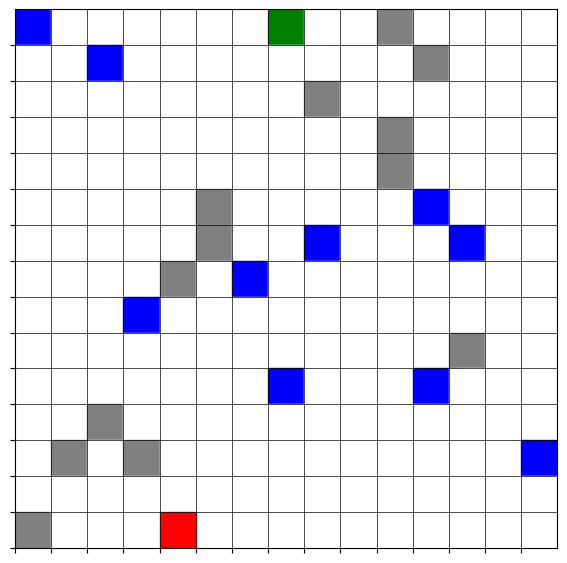

Robot's new position: (14, 4)


In [82]:
import random
import numpy as np
import matplotlib.pyplot as plt
import heapq

class ConservativeGridEnvironment:
    def __init__(self, size=15):
        self.size = size
        self.grid = np.zeros((size, size), dtype=int)
        self.robot = (0, 0)  # Robot's starting position
        self.goal = None  # Randomly assigned goal
        self.walls = []
        self.moving_obstacles = []
        self.collision_count = 0  # Counter for collisions
        self.goal_found = False  # Tracks if the goal is found
        self.visited_states = set()  # Track visited states
        self.generate_static_environment()
        self.generate_moving_obstacles()
        self.set_random_goal()  # Assign a random goal

    def set_random_goal(self):
        """Set a random goal position that is not a wall or obstacle."""
        while True:
            x, y = random.randint(0, self.size - 1), random.randint(0, self.size - 1)
            if (x, y) not in self.walls and (x, y) != self.robot and (x, y) not in self.moving_obstacles:
                self.goal = (x, y)
                break

    def generate_static_environment(self):
        """Generate walls for the environment."""
        self.walls = []
        for _ in range(random.randint(self.size // 2, self.size)):
            x, y = random.randint(0, self.size - 1), random.randint(0, self.size - 1)
            if (x, y) != self.robot:
                self.walls.append((x, y))

    def generate_moving_obstacles(self):
        """Generate moving obstacles with initial positions."""
        self.moving_obstacles = []
        for _ in range(10):
            while True:
                x, y = random.randint(0, self.size - 1), random.randint(0, self.size - 1)
                if (x, y) not in self.walls and (x, y) != self.robot:
                    self.moving_obstacles.append((x, y))
                    break

    def move_obstacles(self):
        """Move dynamic obstacles to new positions."""
        new_positions = []
        for x, y in self.moving_obstacles:
            possible_moves = [
                (x + dx, y + dy)
                for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]  # Only orthogonal moves
                if 0 <= x + dx < self.size and 0 <= y + dy < self.size
            ]
            random.shuffle(possible_moves)
            for new_pos in possible_moves:
                if new_pos not in self.walls and new_pos not in self.moving_obstacles and new_pos != self.robot:
                    new_positions.append(new_pos)
                    break
            else:
                new_positions.append((x, y))
        self.moving_obstacles = new_positions

    def dijkstra(self):
        """Implement Dijkstra's algorithm to find the shortest path to the goal."""
        start = self.robot
        goal = self.goal
        priority_queue = []
        heapq.heappush(priority_queue, (0, start))  # (cost, position)
        costs = {start: 0}
        parents = {start: None}

        while priority_queue:
            current_cost, current_pos = heapq.heappop(priority_queue)

            if current_pos == goal:
                break

            x, y = current_pos
            neighbors = [
                (x + dx, y + dy)
                for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]
                if 0 <= x + dx < self.size and 0 <= y + dy < self.size
            ]

            for neighbor in neighbors:
                if neighbor in self.walls or neighbor in self.moving_obstacles:
                    continue

                new_cost = current_cost + 1

                if neighbor not in costs or new_cost < costs[neighbor]:
                    costs[neighbor] = new_cost
                    priority = new_cost
                    heapq.heappush(priority_queue, (priority, neighbor))
                    parents[neighbor] = current_pos

        path = []
        current = goal
        while current is not None:
            path.append(current)
            current = parents.get(current)
        path.reverse()
        return path

    def is_obstacle_free(self, center):
        """Check if a 5x5 grid around the center is free of obstacles."""
        x, y = center
        for dx in range(-2, 3):
            for dy in range(-2, 3):
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.size and 0 <= ny < self.size:
                    if (nx, ny) in self.walls or (nx, ny) in self.moving_obstacles:
                        return False
        return True

    def choose_next_state(self):
      """Choose the next state conservatively."""
      self.visited_states.add(self.robot)

      if self.goal_found:
          # If goal is found, use Dijkstra's to navigate towards it
          path = self.dijkstra()
          if len(path) > 1:
              next_state = path[1]
              if next_state in self.walls or next_state in self.moving_obstacles:
                  self.collision_count += 1
                  print(f"Collision detected at {next_state}. Collision count: {self.collision_count}")
                  return
              self.robot = next_state
          return

      # Check 5x5 vicinity for the goal
      x, y = self.robot
      for dx in range(-2, 3):
          for dy in range(-2, 3):
              nx, ny = x + dx, y + dy
              if 0 <= nx < self.size and 0 <= ny < self.size and (nx, ny) == self.goal:
                  self.goal_found = True
                  # print("Goal found !")
                  self.robot = (nx, ny)
                  return

      # Explore conservatively
      neighbors = [
          (x + dx, y + dy)
          for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1), (0, -2), (2, 0)]
          if 0 <= x + dx < self.size and 0 <= y + dy < self.size
      ]
      random.shuffle(neighbors)

      if self.is_obstacle_free(self.robot):
          # Move up to two steps in obstacle-free areas
          for dx, dy in [(0, -2), (0, 2), (-2, 0), (2, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:
              nx, ny = x + dx, y + dy
              if (
                  0 <= nx < self.size and 0 <= ny < self.size
                  and (nx, ny) not in self.walls
                  and (nx, ny) not in self.moving_obstacles
                  and (nx, ny) not in self.visited_states
              ):
                  self.robot = (nx, ny)
                  self.visited_states.add(self.robot)
                  return

      # Move one step conservatively if obstacles are nearby
      for next_state in neighbors:
          if (
              next_state not in self.visited_states
              and next_state not in self.walls
              and next_state not in self.moving_obstacles
          ):
              self.robot = next_state
              self.visited_states.add(self.robot)
              if self.robot == self.goal:
                  self.goal_found = True
                  # print("Goal found!")
              return

    def plot_environment(self):
        """Plot the grid environment."""
        fig, ax = plt.subplots(figsize=(7, 7))
        for x in range(self.size):
            for y in range(self.size):
                color = 'white'
                if (x, y) in self.walls:
                    color = 'grey'
                elif (x, y) in self.moving_obstacles:
                    color = 'blue'
                elif (x, y) == self.goal:
                    color = 'green'
                rect = plt.Rectangle((y, self.size - x - 1), 1, 1, color=color)
                ax.add_patch(rect)

        rx, ry = self.robot
        rect = plt.Rectangle((ry, self.size - rx - 1), 1, 1, color='red')
        ax.add_patch(rect)

        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.set_xticks(range(self.size))
        ax.set_yticks(range(self.size))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True, which='both', color='black', linewidth=0.5)
        plt.show()

# Example usage
def create_basic_environment():
    env = ConservativeGridEnvironment(size=15)
    return env


env = create_basic_environment()
print("Initial Environment:")
env.plot_environment()
i =0

np.random.seed(123)
while env.robot != env.goal:
    print(f"\nIteration {i + 1}:")
    env.move_obstacles()
    env.plot_environment()
    env.choose_next_state()
    print(f"Robot's new position: {env.robot}")
    i+=1
    if i == 100:
      break



Average number of collisions: 0.0
Average number of iterations taken: 87.58


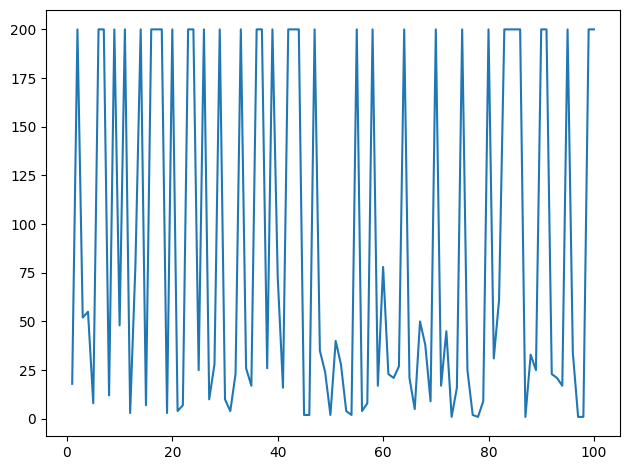

In [88]:
collision_count = []
iteration_count = []
velocity = []
for ep in range(100):
  env = create_basic_environment()
  # print("Initial Environment:")
  i =0
  # Update and plot
  while env.robot != env.goal:
      env.move_obstacles()
      # env.plot_environment()
      env.choose_next_state()
      i+=1
      if i == 200:
        break

  collision_count.append(env.collision_count)
  iteration_count.append(i)
  # print(f"Robot's new position: {env.robot}")
  # print(ep)
eps = [i for i in range(1, 101)]
print(f"Average number of collisions: {np.mean(collision_count)}")
print(f"Average number of iterations taken: {np.mean(iteration_count)}")

plt.plot(eps, iteration_count, label='No.of Iterations')
plt.tight_layout()
plt.show()

###Step 2: Known Environment + Collision Probability

Initial Grid Configuration:


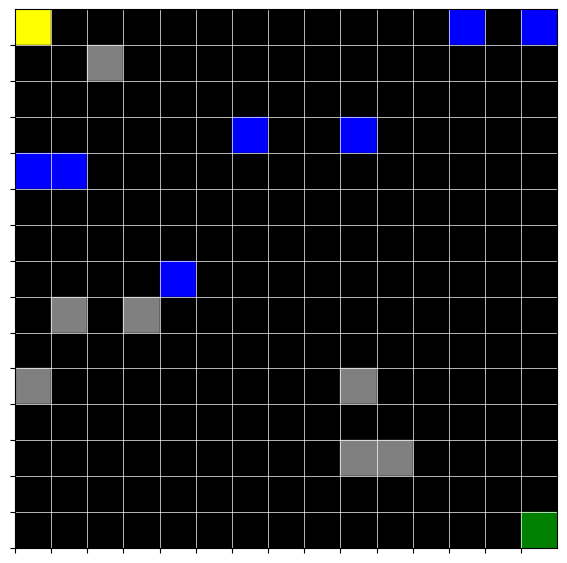


Iteration 1:


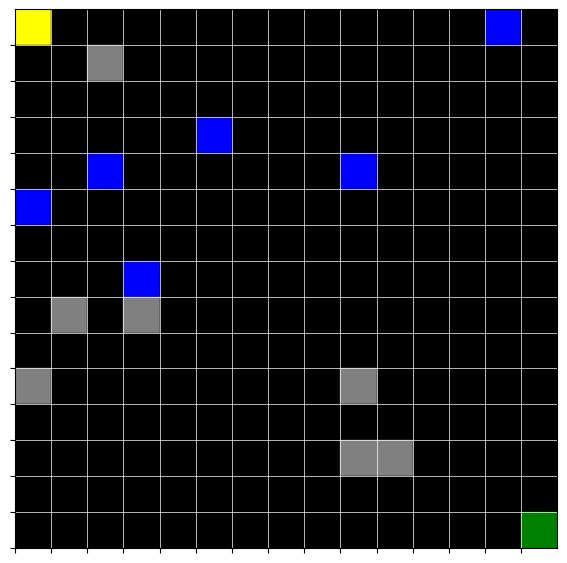

[[0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0. ]
 [0.  0.  0.2 0.2 0.2]
 [0.  0.  0.2 0.2 1. ]
 [0.  0.  0.2 0.2 0.2]]
Robot's new position: (2, 2)

Iteration 2:


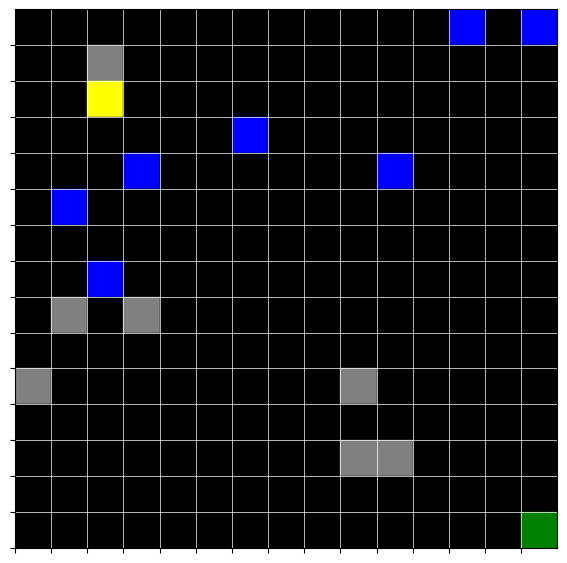

[[0.2        0.2        0.2        0.2        0.2       ]
 [0.2        0.2        1.         0.2        0.2       ]
 [0.2        0.2        0.2        0.2        0.2       ]
 [0.2        0.2        0.2        0.30714286 0.2       ]
 [0.2        0.2        0.30714286 0.42857143 0.2       ]]
Robot's new position: (4, 4)

Iteration 3:


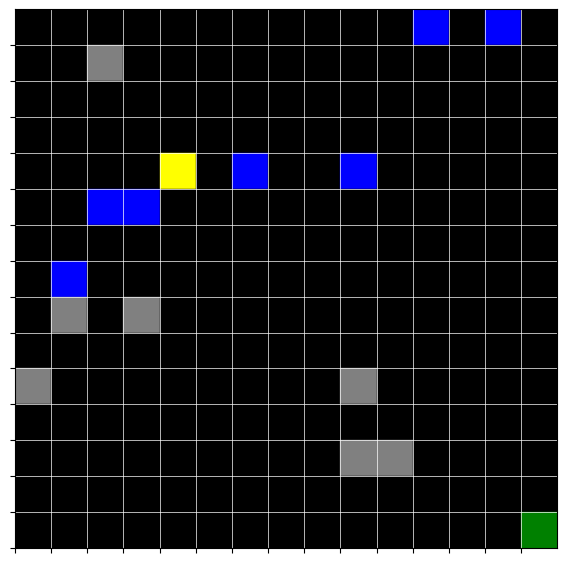

[[0.2        0.2        0.2        0.2        0.2       ]
 [0.2        0.2        0.2        0.2        0.34285714]
 [0.34285714 0.34285714 0.2        0.34285714 0.57142857]
 [0.71428571 0.57142857 0.2        0.2        0.2       ]
 [0.2        0.2        0.2        0.2        0.2       ]]
Robot's new position: (6, 6)

Iteration 4:


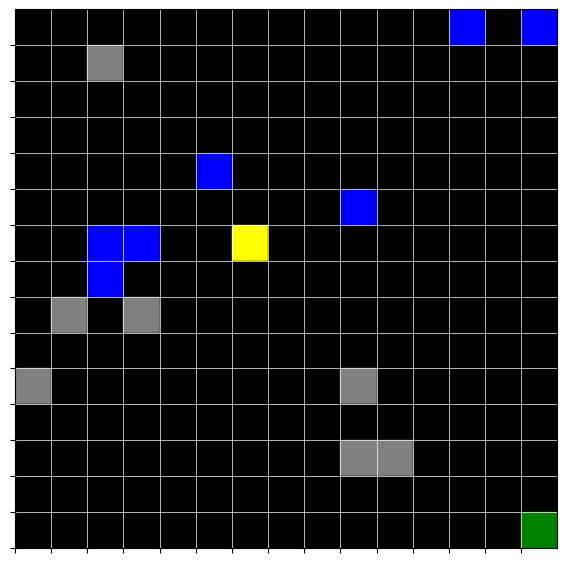

[[0.37857143 0.71428571 0.2        0.2        0.2       ]
 [0.2        0.2        0.2        0.2        0.2       ]
 [0.2        0.2        0.2        0.2        0.2       ]
 [0.2        0.2        0.2        0.2        0.2       ]
 [0.2        0.2        0.2        0.2        0.2       ]]
Robot's new position: (8, 8)

Iteration 5:


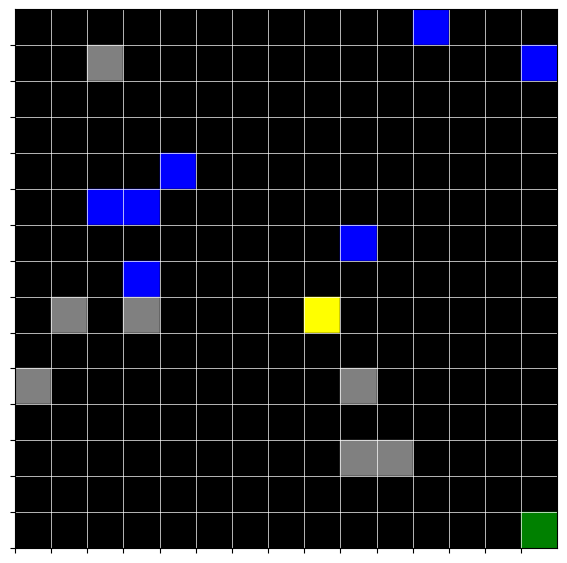

[[0.2        0.2        0.41428571 0.85714286 0.2       ]
 [0.2        0.2        0.2        0.2        0.2       ]
 [0.2        0.2        0.2        0.2        0.2       ]
 [0.2        0.2        0.2        0.2        0.2       ]
 [0.2        0.2        0.2        1.         0.2       ]]
Robot's new position: (10, 10)

Iteration 6:


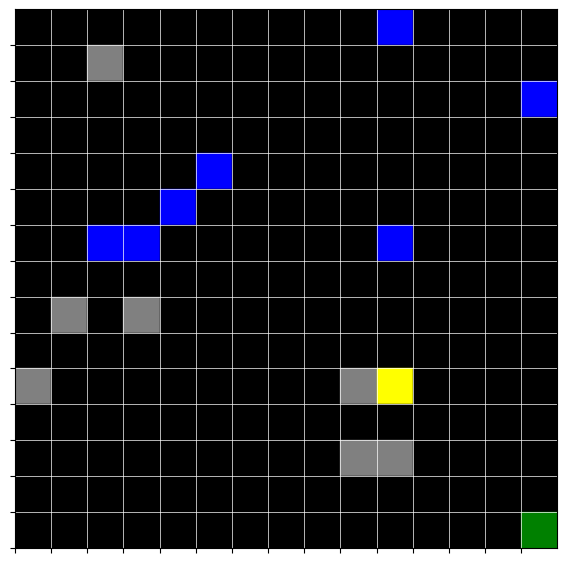

[[0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 1.  0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 1.  1.  0.2 0.2]]
Robot's new position: (12, 12)

Iteration 7:


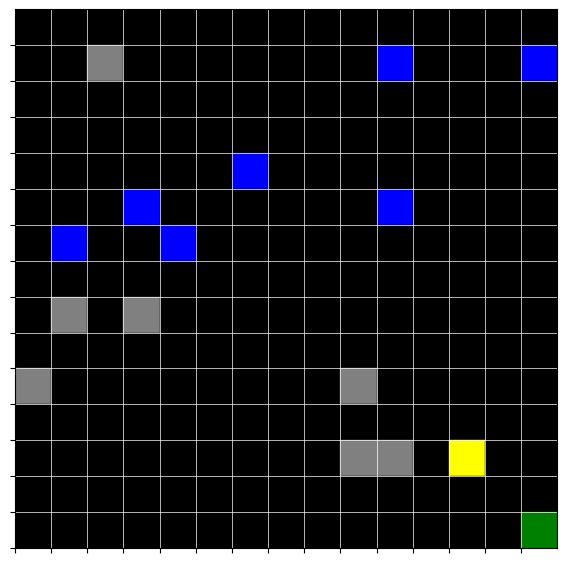

[[0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [1.  0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2]]
Robot's new position: (14, 14)


In [2]:
class DynamicGridEnvironment:
    def __init__(self, size=15):
        self.size = size
        self.grid = np.zeros((size, size), dtype=int)
        self.robot = (0, 0)  # Robot's starting position
        self.goal = (size - 1, size - 1)
        self.walls = []
        self.moving_obstacles = []
        self.obstacle_history = {}
        self.generate_static_environment()
        self.generate_moving_obstacles()

    def generate_static_environment(self):
        """Generate walls and ensure a valid path exists between robot and goal."""
        while True:
            self.grid.fill(0)
            self.walls = []

            for _ in range(random.randint(self.size // 2, self.size)):
                x, y = random.randint(0, self.size - 1), random.randint(0, self.size - 1)
                if (x, y) != self.robot and (x, y) != self.goal:
                    self.walls.append((x, y))

            for wall in self.walls:
                self.grid[wall] = 1

            # Ensure path exists using graph connectivity check
            if self.is_path_to_goal():
                break

    def generate_moving_obstacles(self):
        """Generate moving obstacles with initial positions."""
        self.moving_obstacles = []
        for _ in range(random.randint(5, 10)):
            while True:
                x, y = random.randint(0, self.size - 1), random.randint(0, self.size - 1)
                if (x, y) not in self.walls and (x, y) != self.robot and (x, y) != self.goal:
                    self.moving_obstacles.append((x, y))
                    self.obstacle_history[(x, y)] = []
                    break

    def move_obstacles(self):
        """Move dynamic obstacles to new positions."""
        new_positions = []
        new_history = {}
        for x, y in self.moving_obstacles:
            possible_moves = [
                (x + dx, y + dy)
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
                if 0 <= x + dx < self.size and 0 <= y + dy < self.size
            ]
            random.shuffle(possible_moves)
            for new_pos in possible_moves:
                if new_pos not in self.walls and new_pos not in self.moving_obstacles and new_pos != self.robot and new_pos != self.goal:
                    new_positions.append(new_pos)
                    new_history[new_pos] = self.obstacle_history.get((x, y), [])[-4:] + [new_pos]
                    break
            else:
                new_positions.append((x, y))
                new_history[(x, y)] = self.obstacle_history.get((x, y), [])[-4:] + [(x, y)]
        self.moving_obstacles = new_positions
        self.obstacle_history = new_history

    def is_path_to_goal(self):
        """Check if there's a valid path from robot to goal using BFS."""
        graph = nx.grid_2d_graph(self.size, self.size)
        graph.remove_nodes_from(self.walls)

        try:
            nx.shortest_path(graph, source=self.robot, target=self.goal)
            return True
        except nx.NetworkXNoPath:
            return False

    def get_grid(self):
        """Return the current state of the grid."""
        grid_with_obstacles = self.grid.copy()
        for x, y in self.moving_obstacles:
            grid_with_obstacles[x, y] = 2
        grid_with_obstacles[self.robot] = 3
        grid_with_obstacles[self.goal] = 4
        return grid_with_obstacles

    def plot_grid(self):
        """Plot the current grid configuration."""
        grid = self.get_grid()
        color_map = {0: 'black', 1: 'grey', 2: 'blue', 3: 'yellow', 4: 'green'}

        fig, ax = plt.subplots(figsize=(7, 7))
        for x in range(self.size):
            for y in range(self.size):
                rect = plt.Rectangle((y, self.size - x - 1), 1, 1, color=color_map[grid[x, y]])
                ax.add_patch(rect)

        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.set_xticks(range(self.size))
        ax.set_yticks(range(self.size))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True, which='both', color='white', linewidth=0.5)
        plt.show()

    def predict_collision_probabilities(self):
        """Predict collision probabilities for the visible 5x5 grid centered on the robot."""
        robot_x, robot_y = self.robot
        visible_range = 2  # 5x5 grid -> 2 units in each direction
        probabilities = np.zeros((5, 5))

        for dx in range(-visible_range, visible_range + 1):
            for dy in range(-visible_range, visible_range + 1):
                x, y = robot_x + dx, robot_y + dy
                if 0 <= x < self.size and 0 <= y < self.size:
                    if (x, y) in self.walls:
                        probabilities[dx + visible_range, dy + visible_range] = 1.0
                    elif (x, y) in self.obstacle_history:
                        history = self.obstacle_history[(x, y)]
                        successes = len(history)
                        failures = 5 - successes
                        alpha, beta = successes + 1, failures + 1  # Beta-Bernoulli prior
                        base_prob = alpha / (alpha + beta)
                        probabilities[dx + visible_range, dy + visible_range] = base_prob

                        # Increase probability for neighboring cells
                        for ndx, ndy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                            nx, ny = x + ndx, y + ndy
                            prob_x = nx - robot_x + visible_range
                            prob_y = ny - robot_y + visible_range
                            if 0 <= prob_x < 5 and 0 <= prob_y < 5:
                                probabilities[prob_x, prob_y] += base_prob * 0.25
                    else:
                        probabilities[dx + visible_range, dy + visible_range] = 0.2  # Default prior

        # Ensure probabilities do not exceed 1.0
        probabilities = np.clip(probabilities, 0.0, 1.0)
        return probabilities

    def compute_cost_function(self, probabilities):
        """Compute the cost function for all states in the 5x5 visible grid."""
        robot_x, robot_y = self.robot
        visible_range = 2
        costs = np.full((5, 5), np.inf)

        for dx in range(-visible_range, visible_range + 1):
            for dy in range(-visible_range, visible_range + 1):
                x, y = robot_x + dx, robot_y + dy
                if 0 <= x < self.size and 0 <= y < self.size and (x, y) not in self.walls:
                    time_cost = 1
                    heuristic_cost = abs(self.goal[0] - x) + abs(self.goal[1] - y)  # Manhattan distance
                    collision_penalty = probabilities[dx + visible_range, dy + visible_range] * 10  # Weighted penalty
                    costs[dx + visible_range, dy + visible_range] = time_cost + heuristic_cost + collision_penalty

        return costs

    def choose_next_state(self, costs):
        """Choose the next state with the minimum cost."""
        visible_range = 2
        min_cost = np.min(costs)
        indices = np.argwhere(costs == min_cost)
        if len(indices) > 0:
            dx, dy = indices[0] - visible_range
            next_x, next_y = self.robot[0] + dx, self.robot[1] + dy
            if 0 <= next_x < self.size and 0 <= next_y < self.size:
                self.robot = (next_x, next_y)

    def plot_costs(self, costs):
        """Plot the cost function for the visible 5x5 grid."""
        fig, ax = plt.subplots()
        cax = ax.matshow(costs, cmap='Blues')
        fig.colorbar(cax)
        ax.set_xticks(range(5))
        ax.set_yticks(range(5))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.title("Cost Function")
        plt.show()

# Example usage
def create_environment():
    env = DynamicGridEnvironment(size=15)
    return env

# Initialize environment
env = create_environment()
print("Initial Grid Configuration:")

# Plot initial grid
env.plot_grid()
i = 0
# Simulate obstacle movements and predict collision probabilities
while env.robot != env.goal:
    print(f"\nIteration {i + 1}:")
    env.move_obstacles()
    env.plot_grid()
    probabilities = env.predict_collision_probabilities()
    print(probabilities)

    costs = env.compute_cost_function(probabilities)
    env.choose_next_state(costs)
    print(f"Robot's new position: {env.robot}")
    i+=1

###Step 3: Unknown Environment + Collision Probability



Initial Belief Map:

Iteration 1:


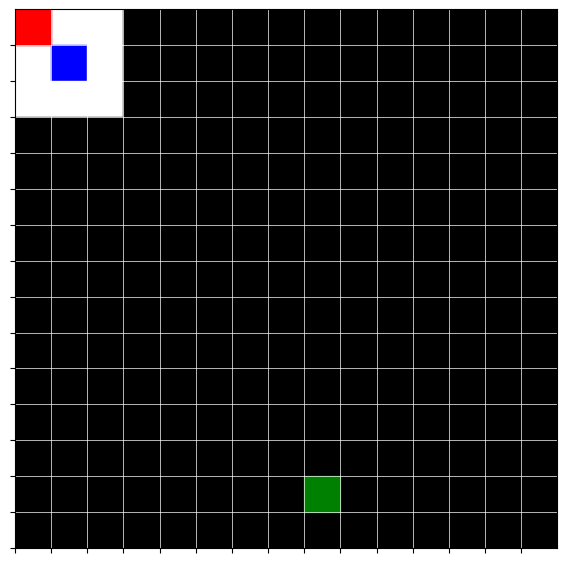

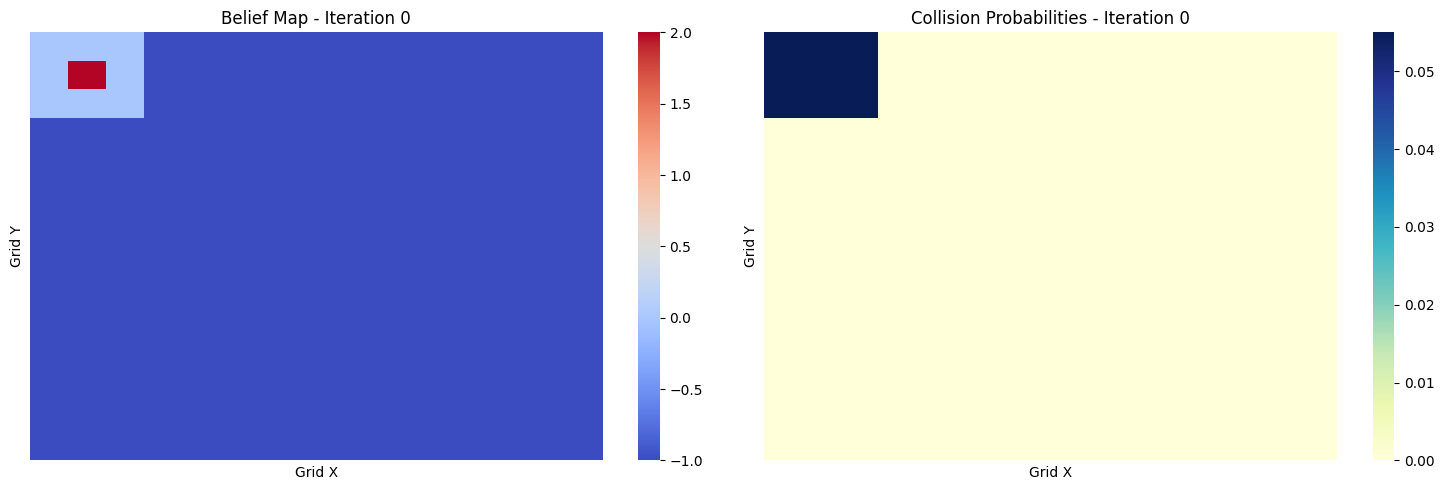

Robot's new position: (2, 0)

Iteration 4:


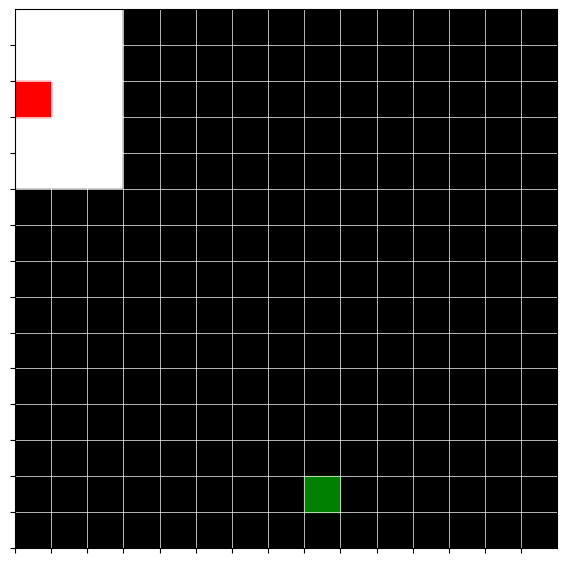

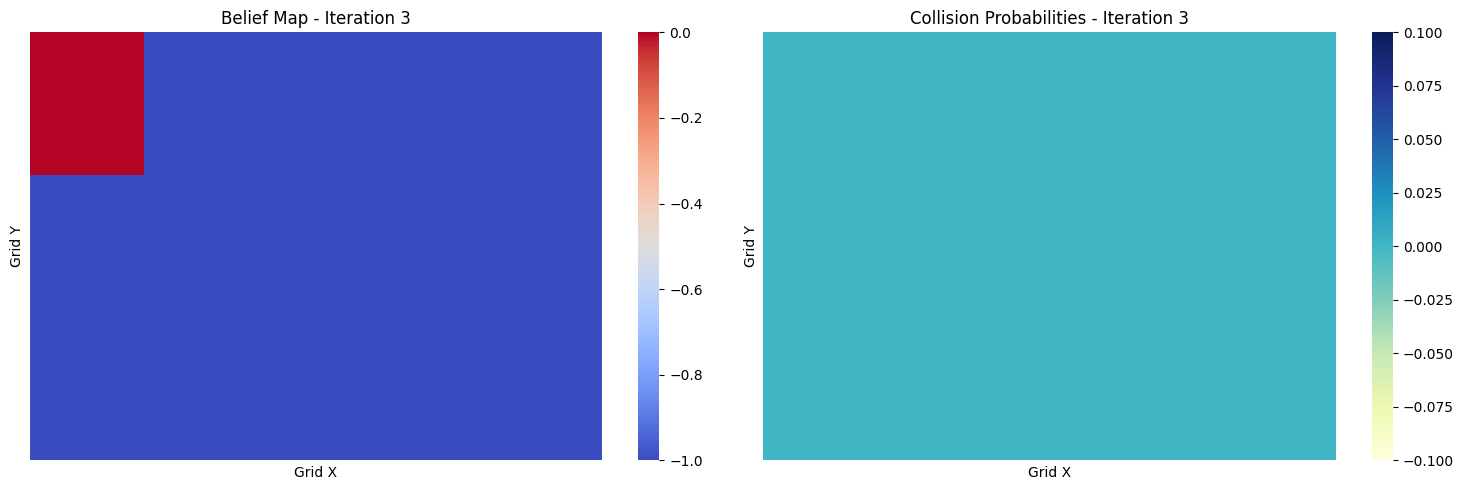

Robot's new position: (4, 0)

Iteration 7:


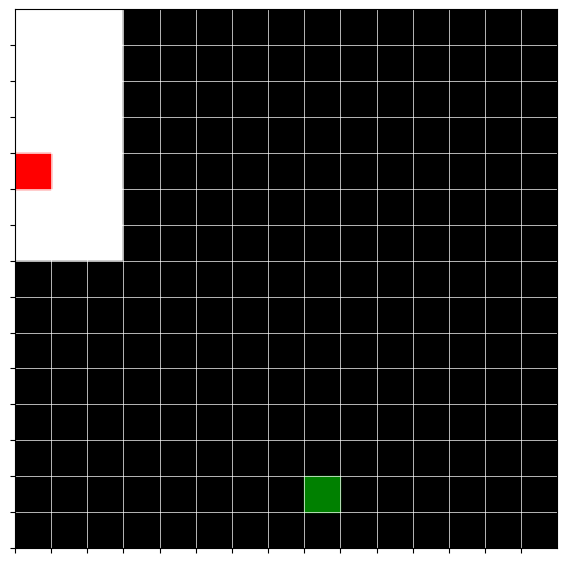

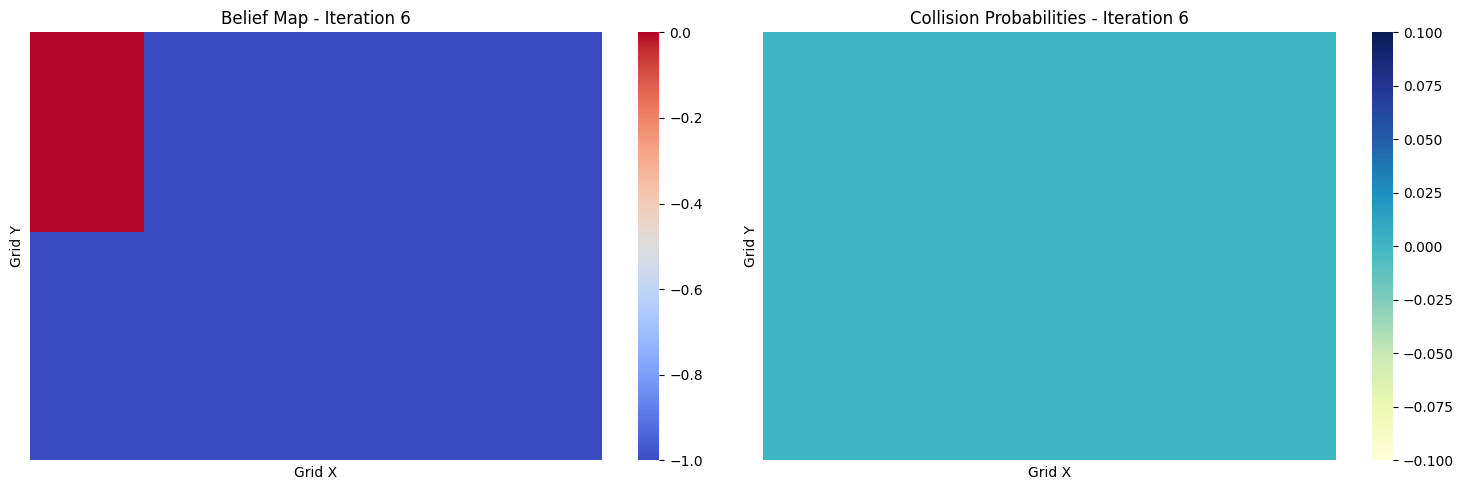

Robot's new position: (6, 0)

Iteration 10:


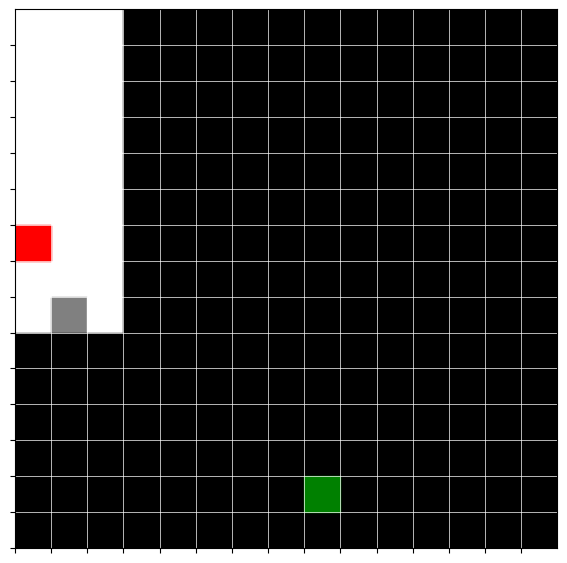

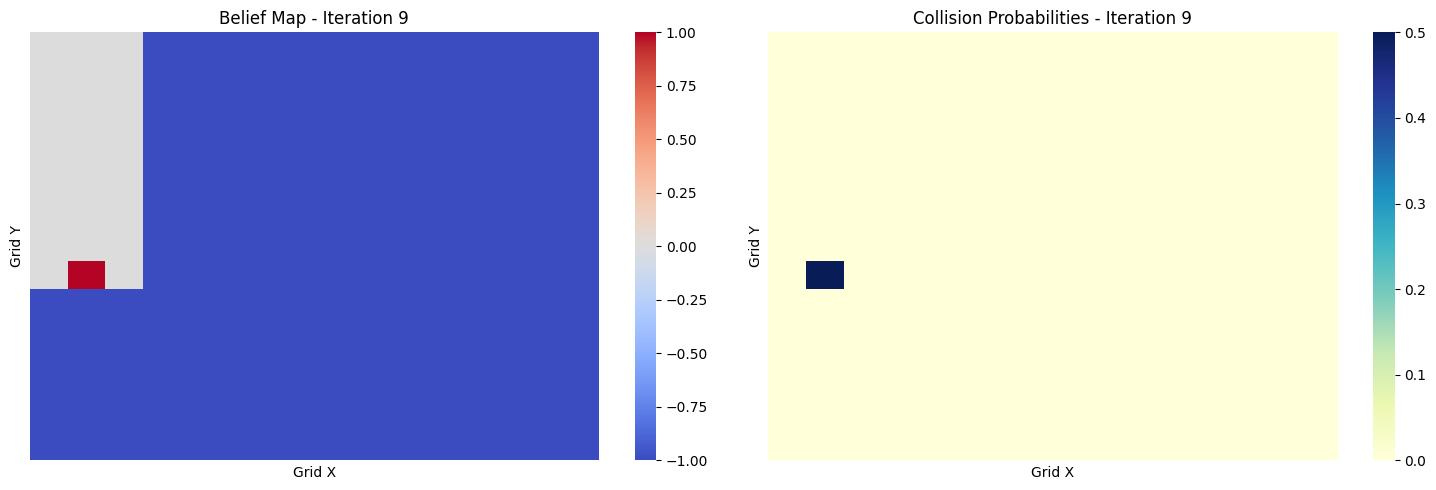

Robot's new position: (8, 0)

Iteration 13:


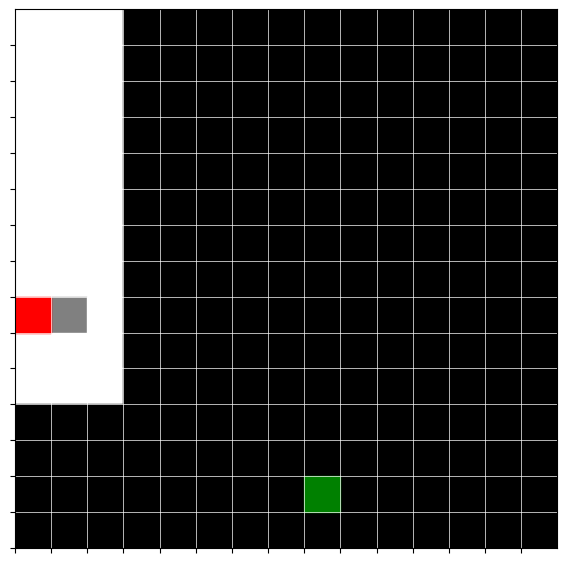

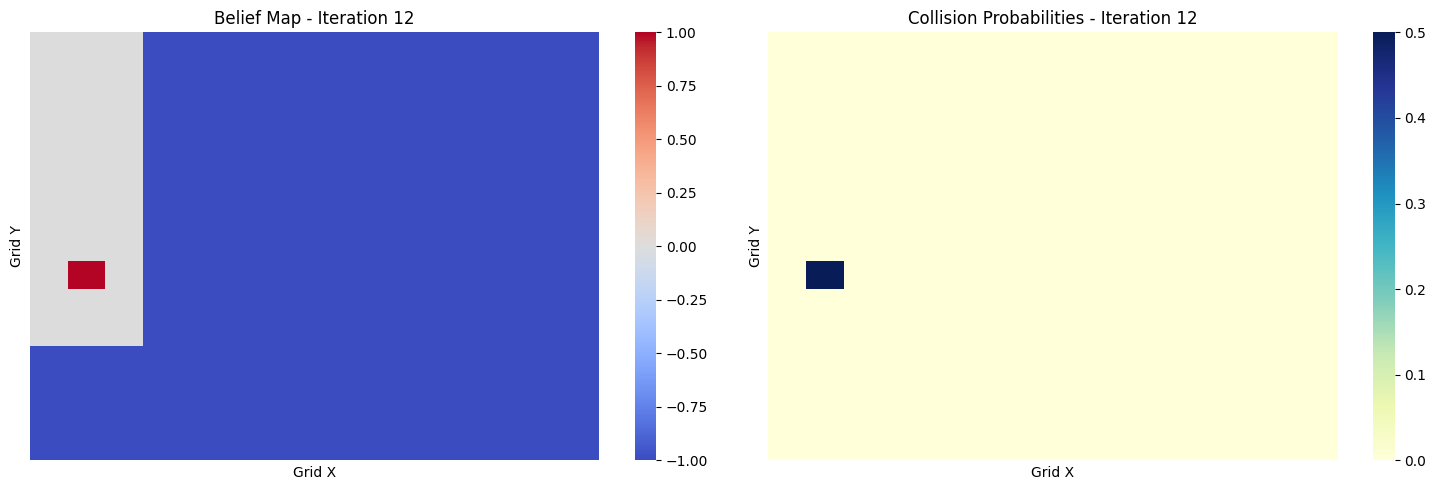

Robot's new position: (10, 0)

Iteration 16:


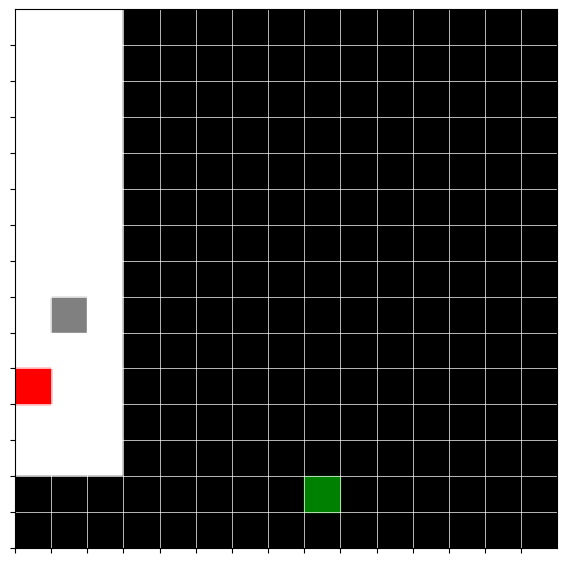

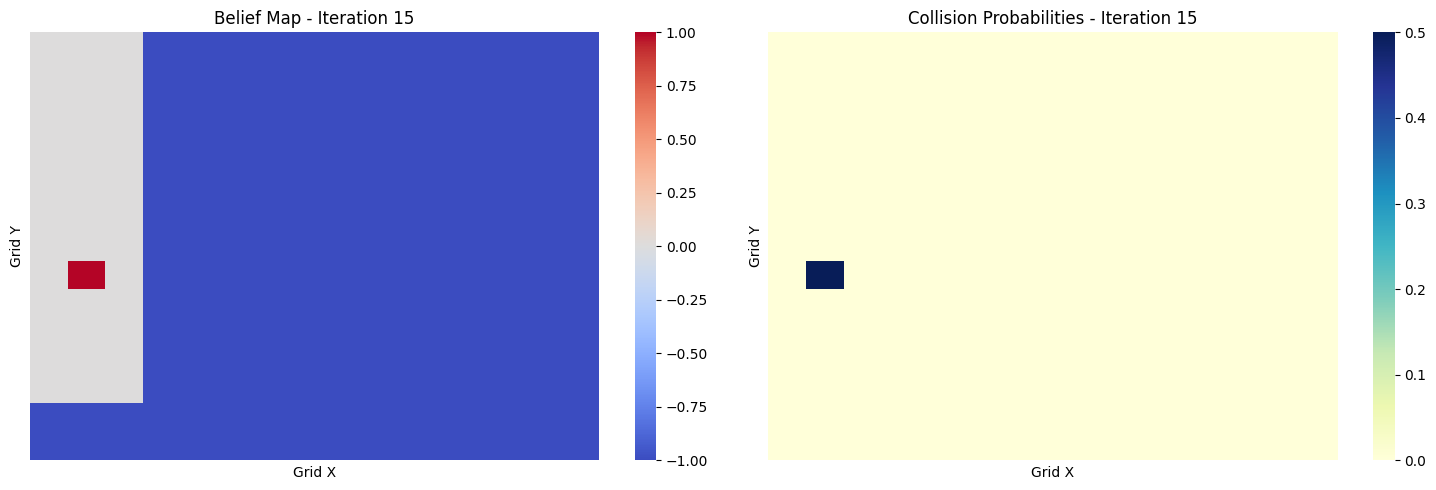

Robot's new position: (12, 0)

Iteration 19:


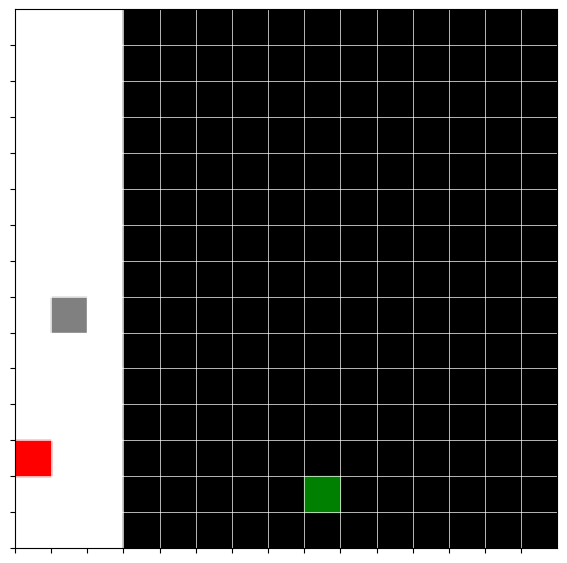

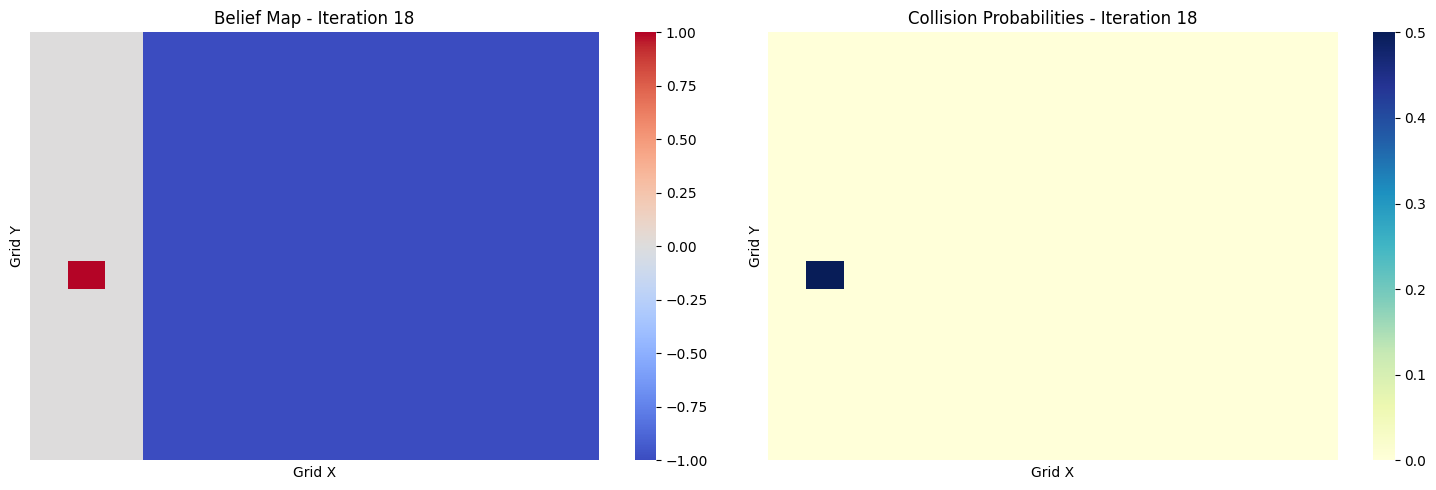

Robot's new position: (12, 2)

Iteration 22:


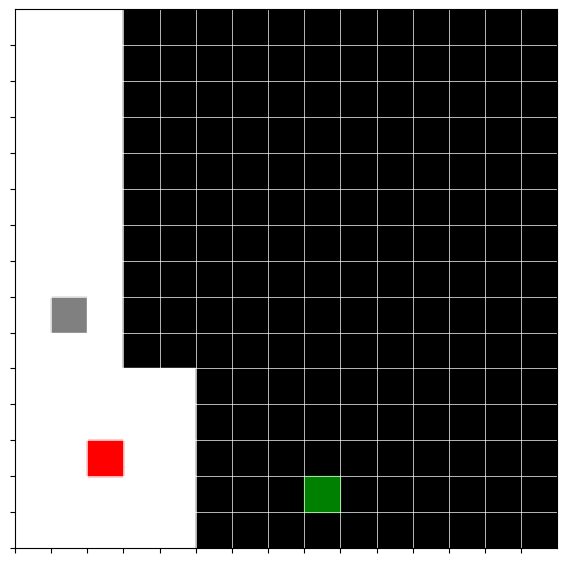

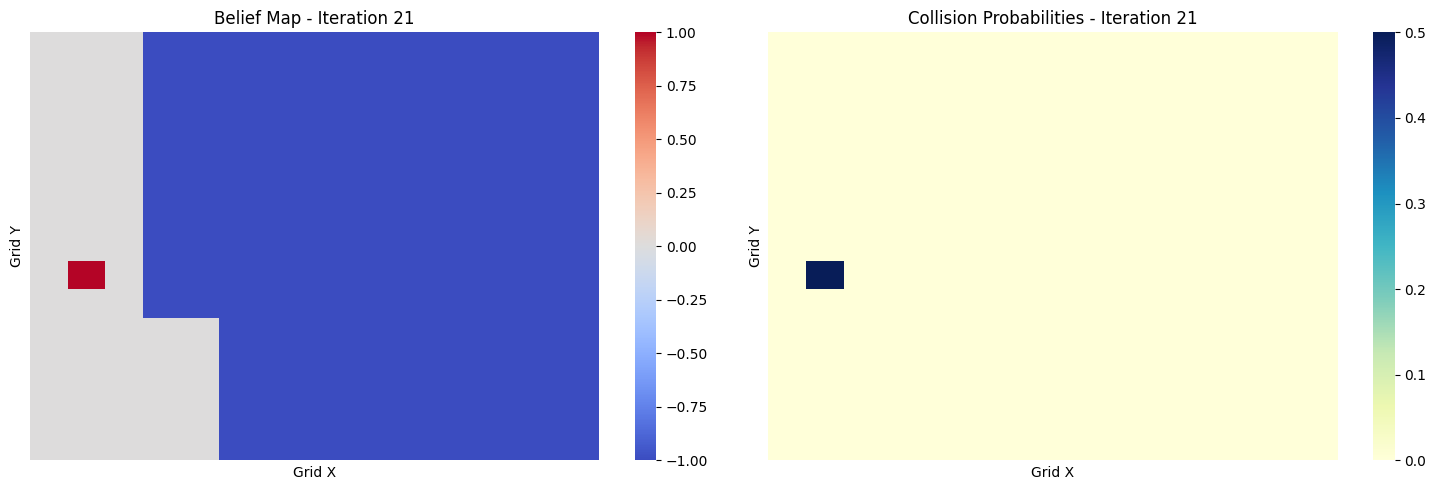

Robot's new position: (12, 4)

Iteration 25:


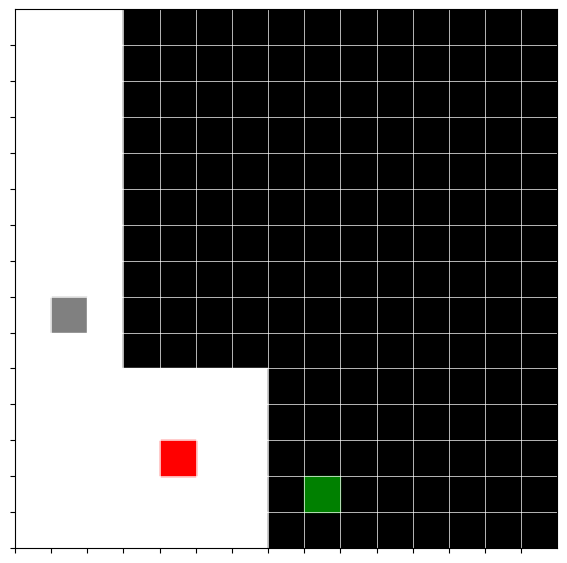

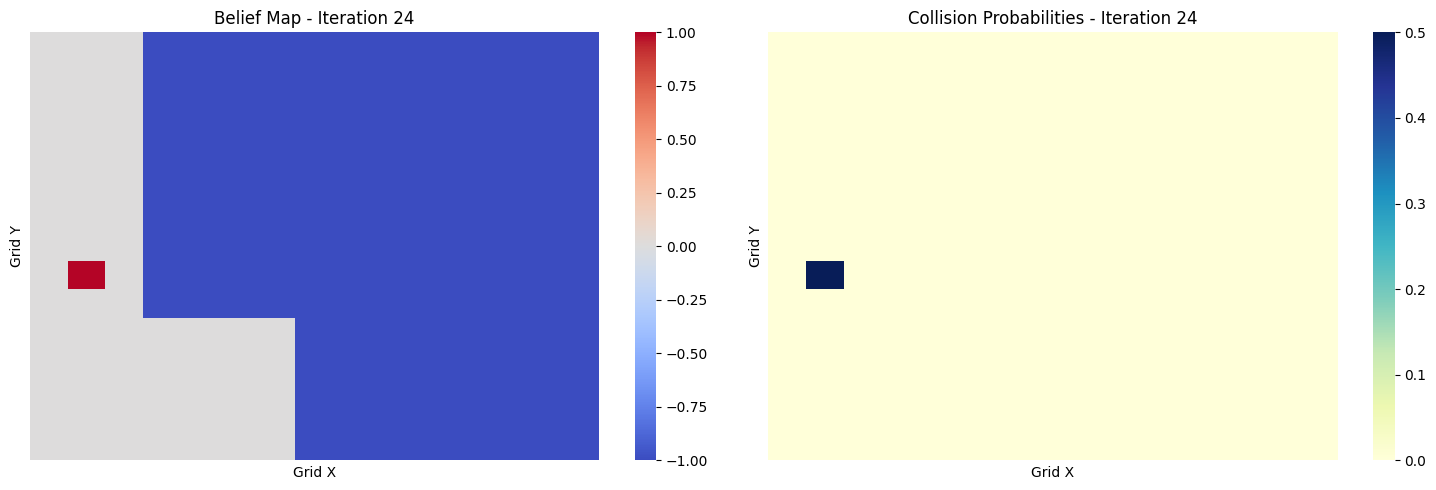

Robot's new position: (10, 4)

Iteration 28:


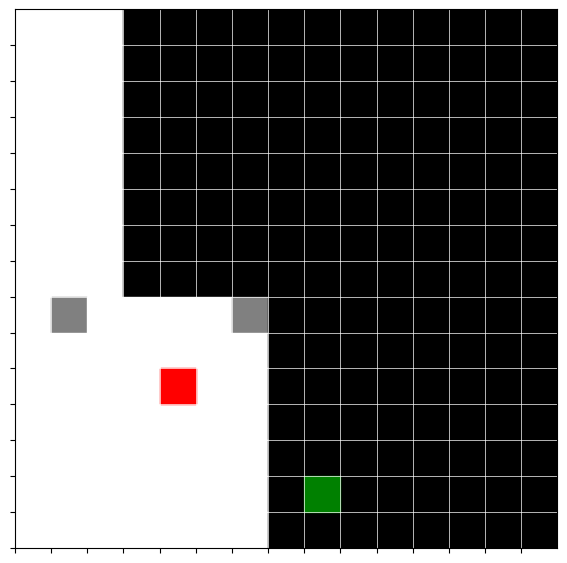

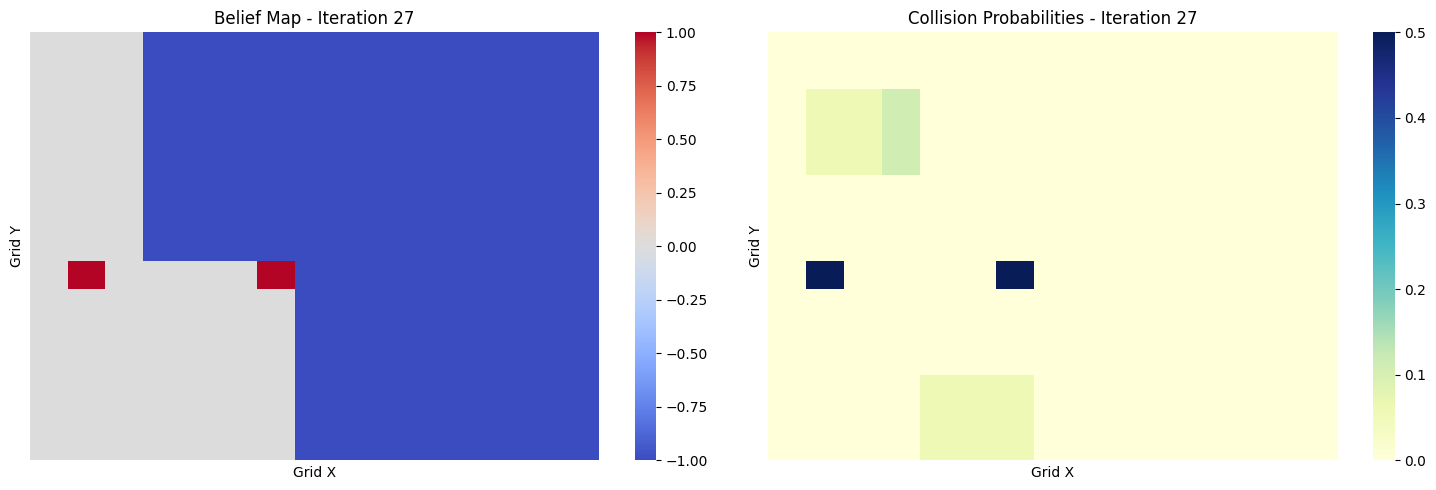

Robot's new position: (8, 4)

Iteration 31:


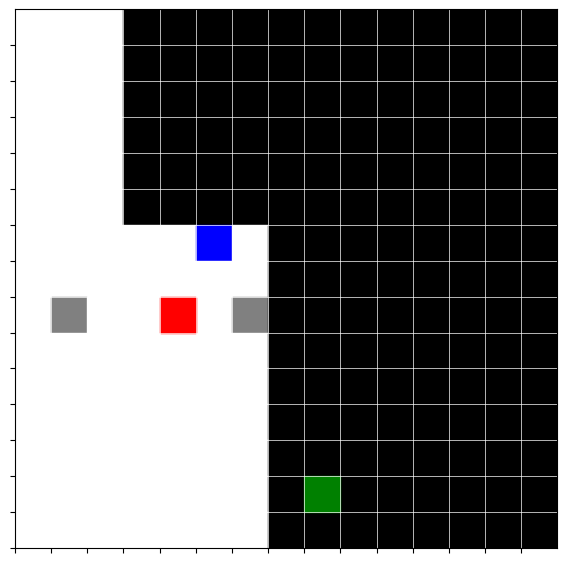

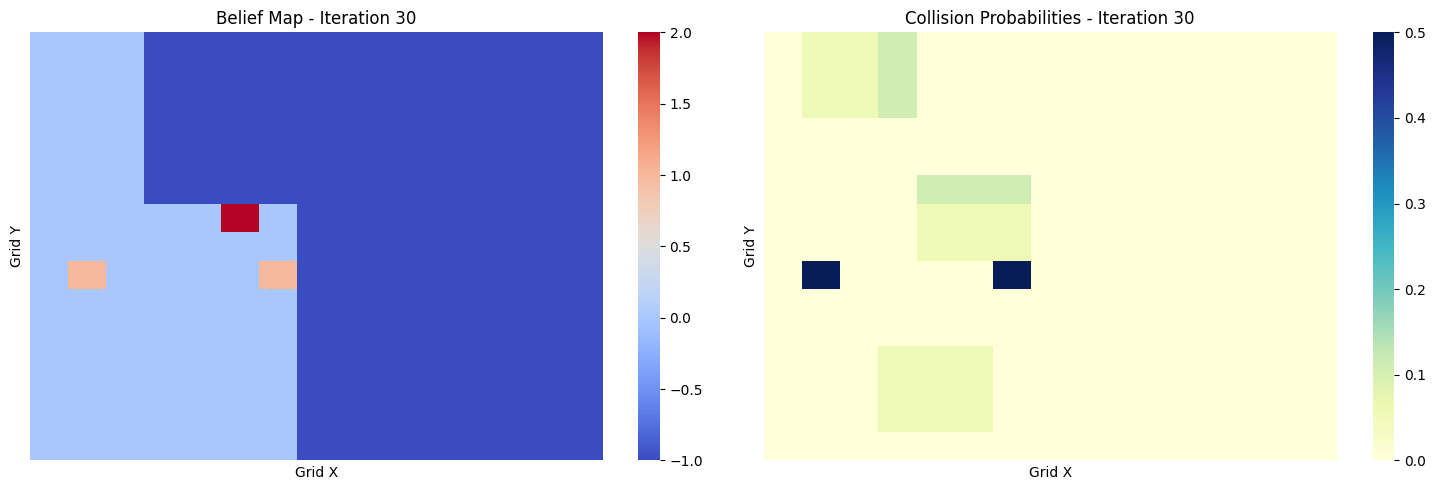

Robot's new position: (9, 6)

Iteration 34:


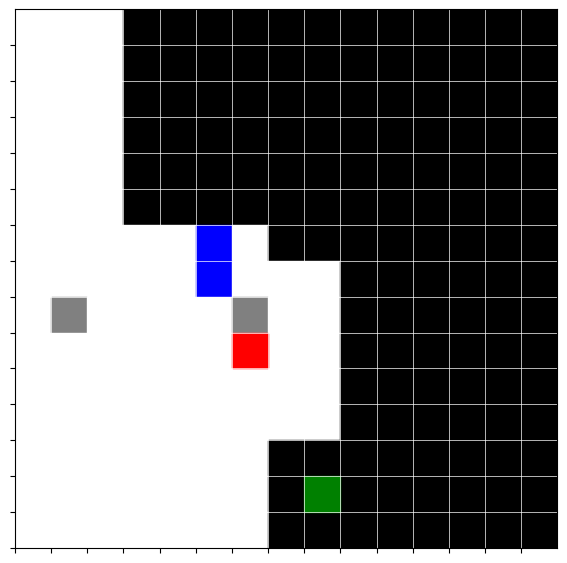

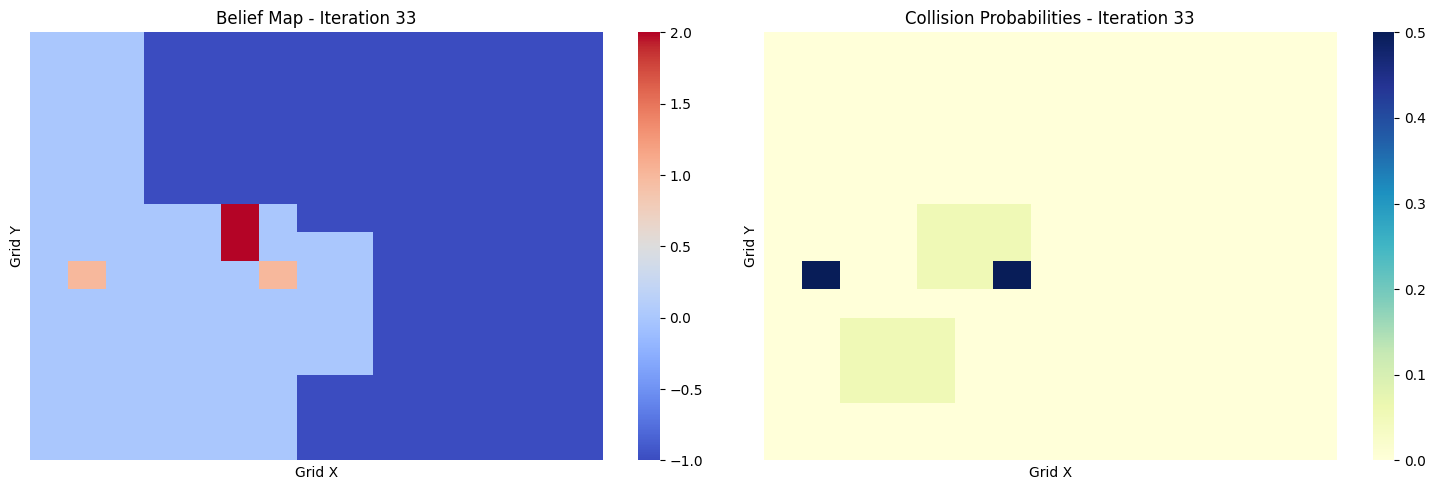

Robot's new position: (9, 8)

Iteration 37:


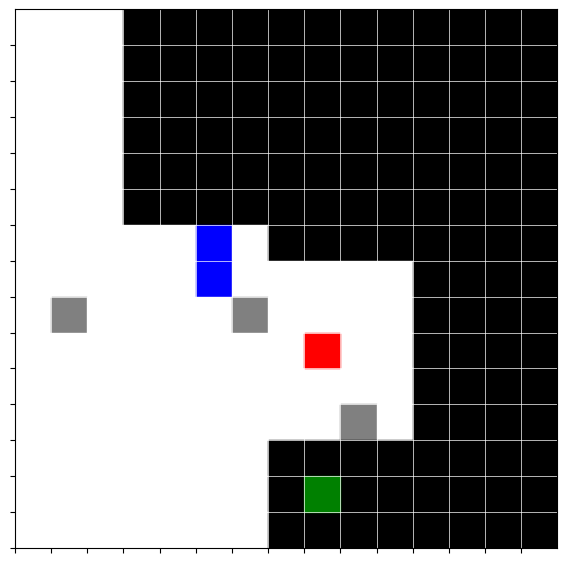

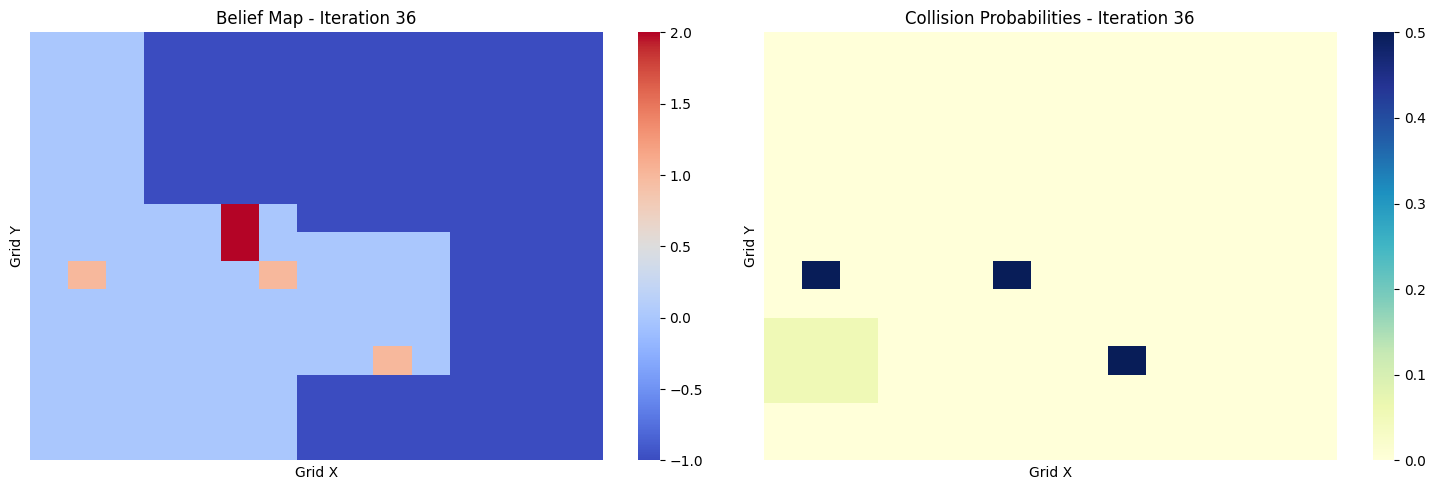

Robot's new position: (7, 8)

Iteration 40:


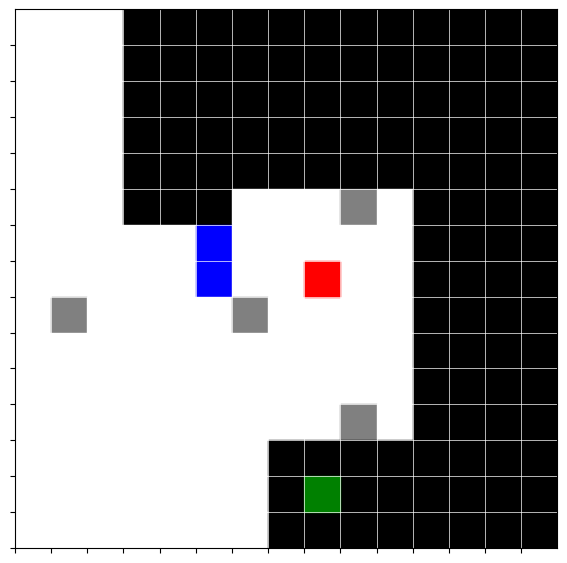

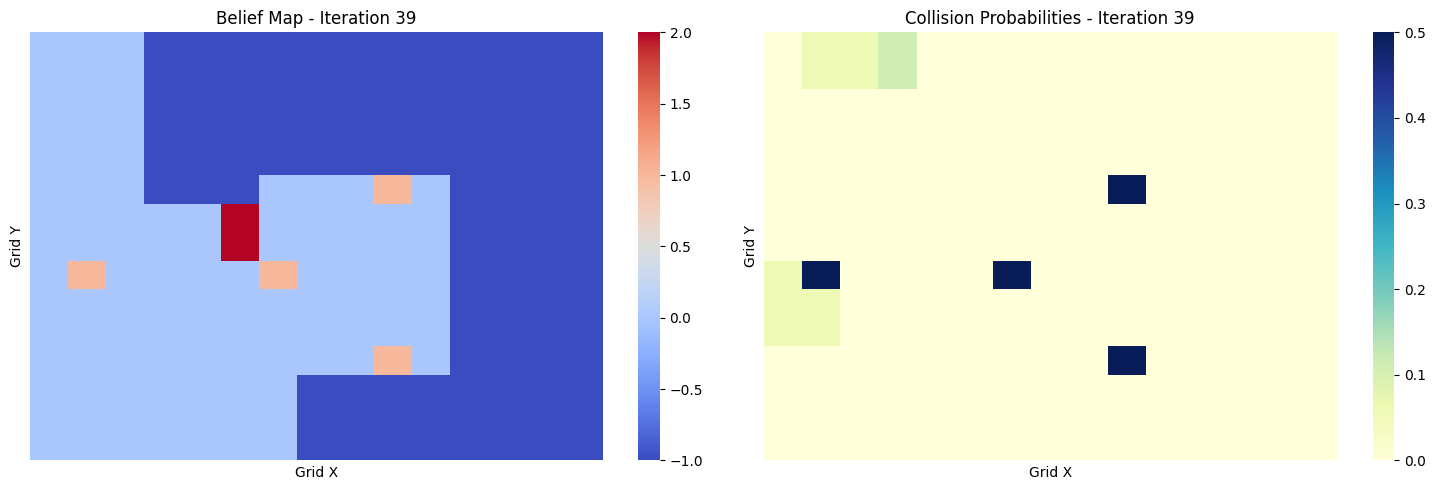

Robot's new position: (5, 8)

Iteration 43:


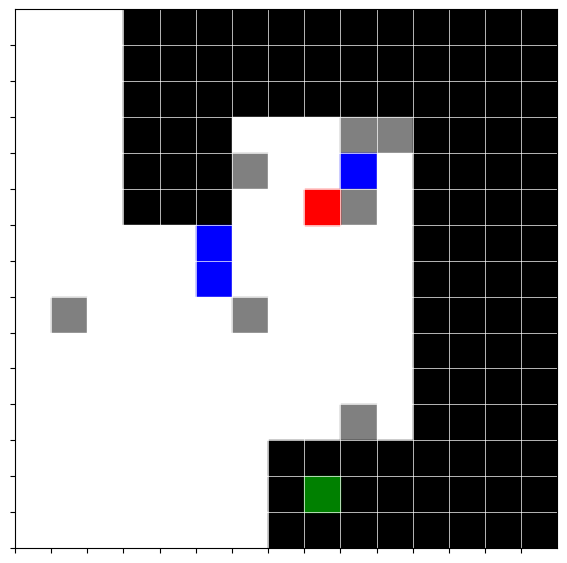

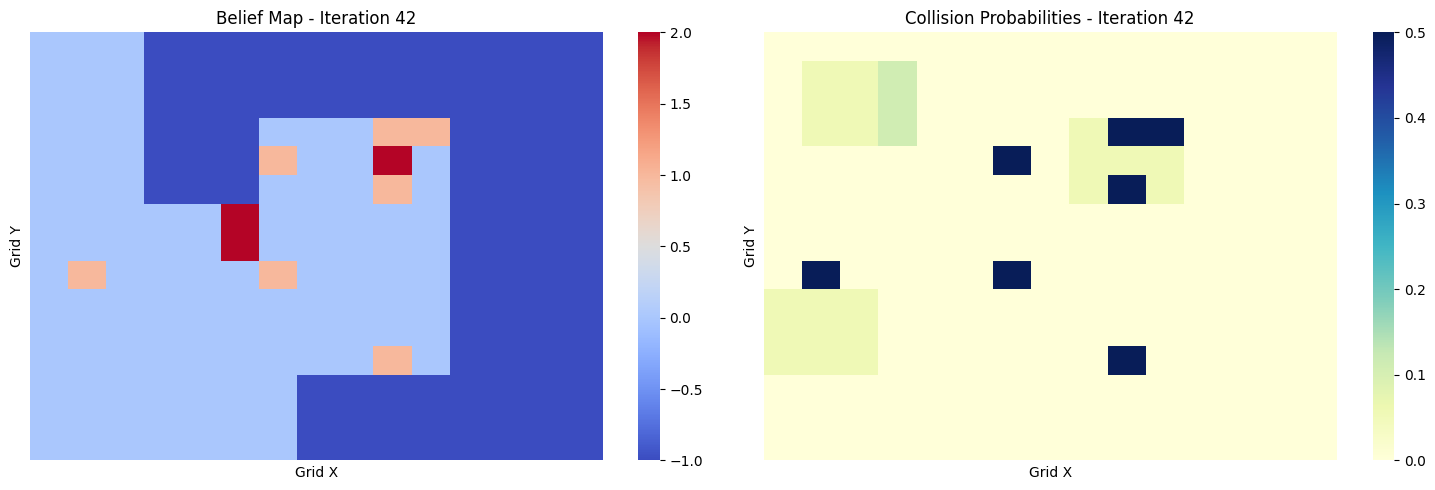

Robot's new position: (5, 6)

Iteration 46:


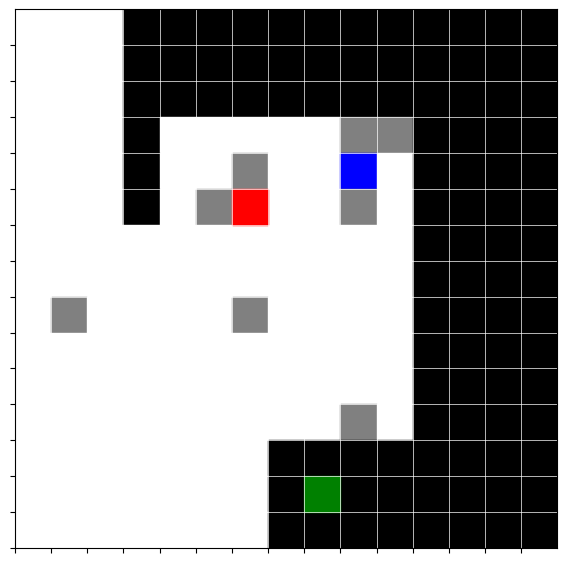

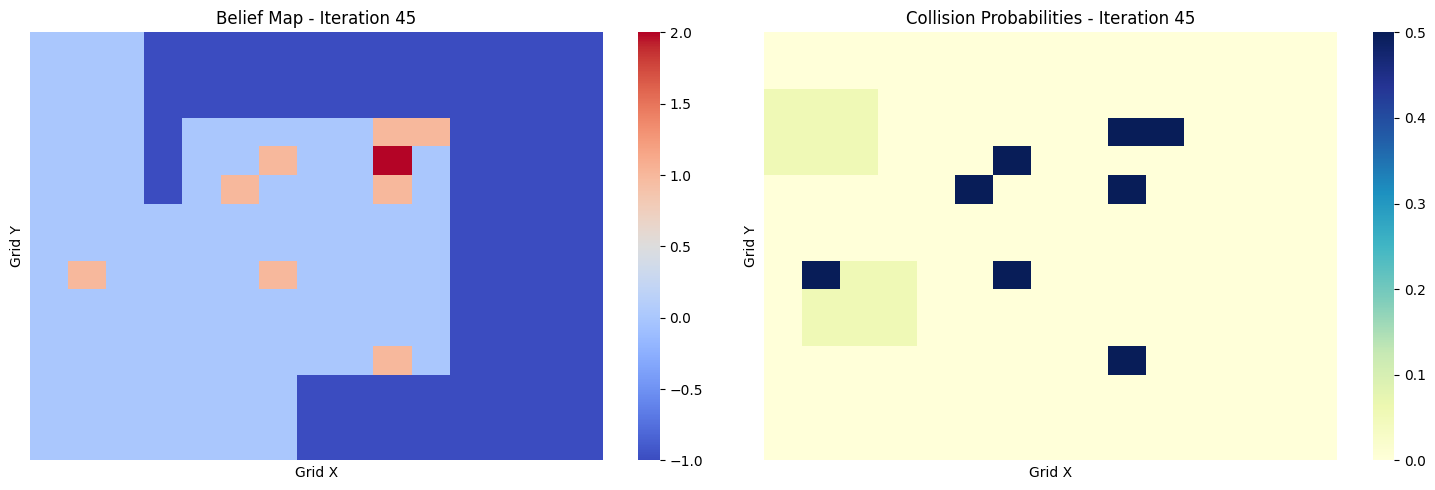

Robot's new position: (3, 5)

Iteration 49:


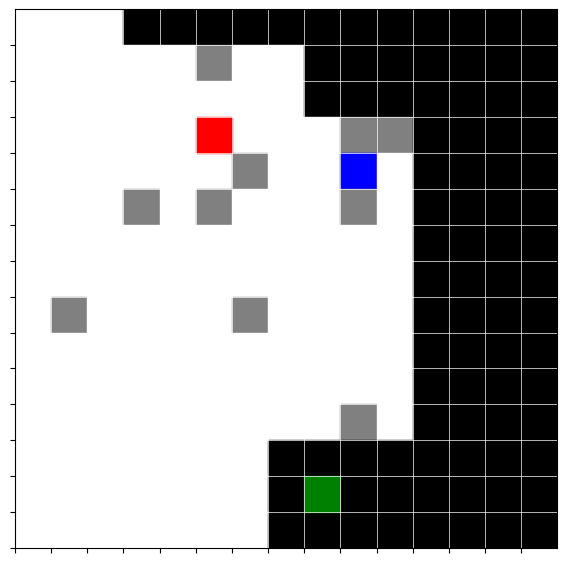

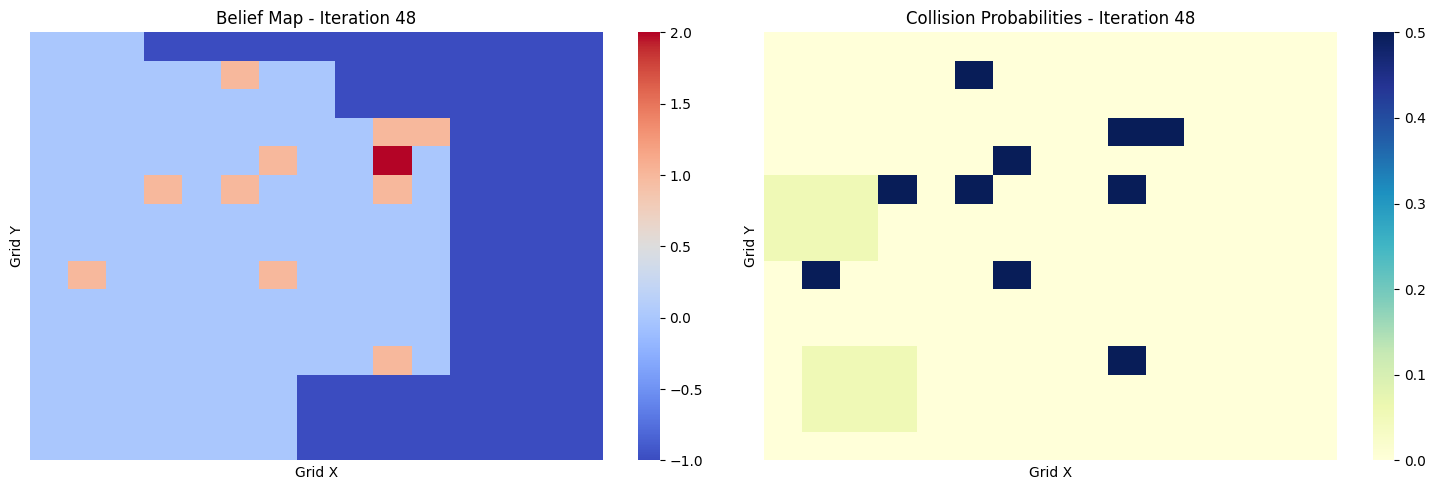

Robot's new position: (3, 7)

Iteration 52:


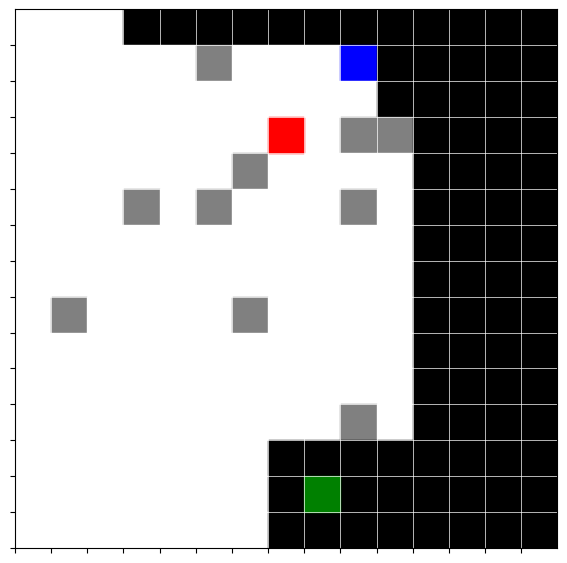

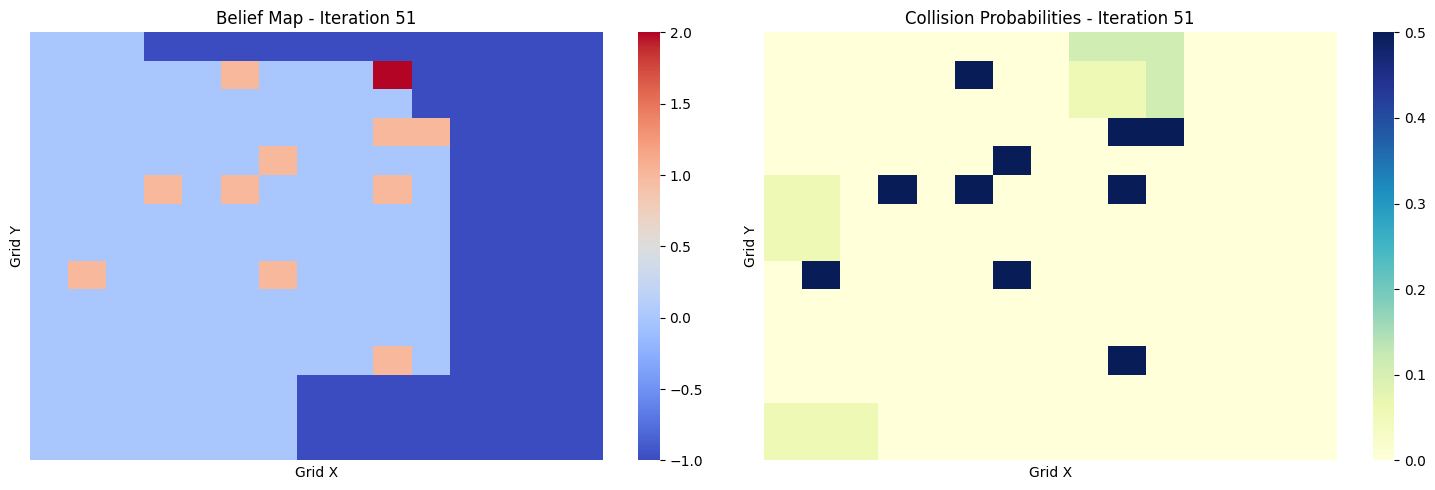

Robot's new position: (1, 7)

Iteration 55:


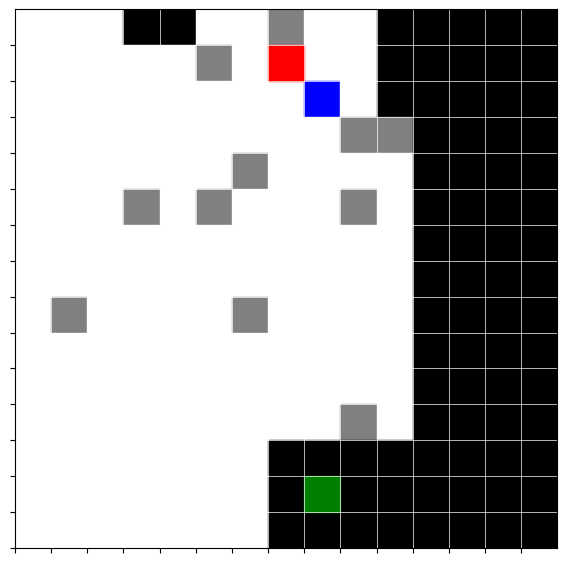

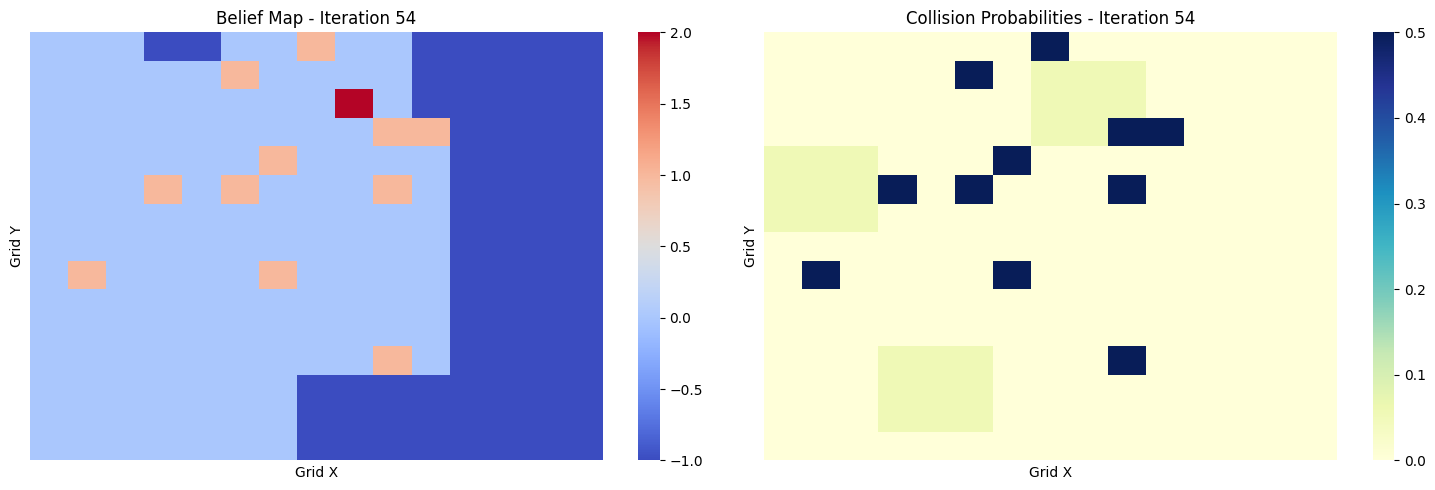

Robot's new position: (0, 5)

Iteration 58:


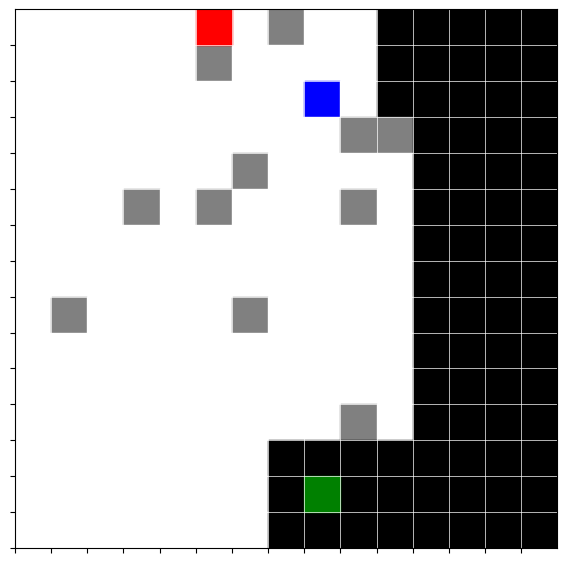

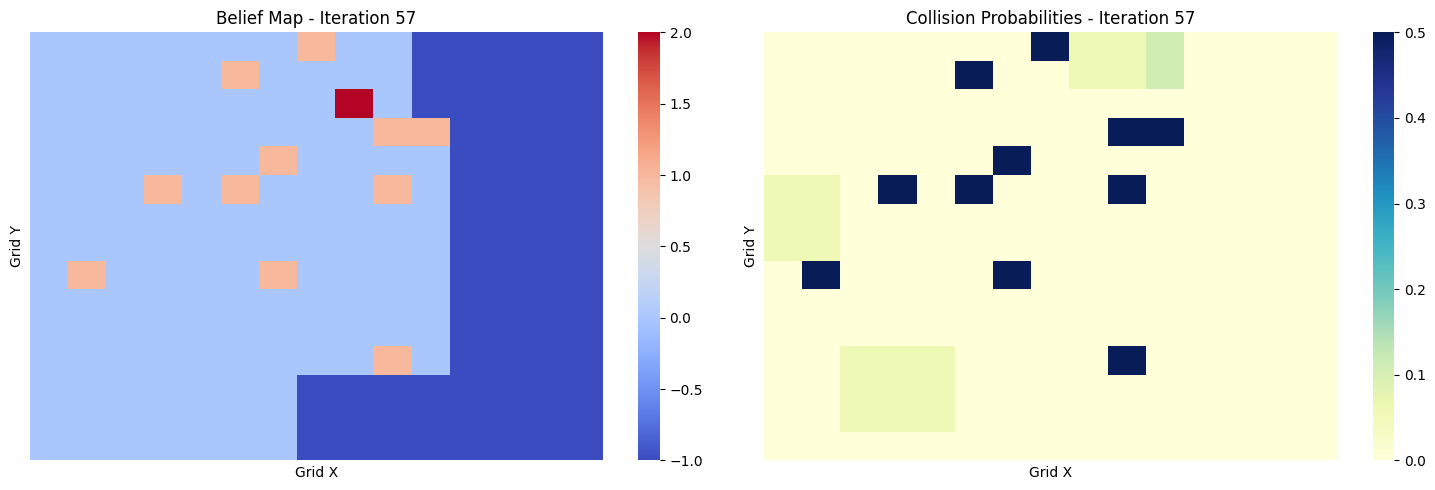

Robot's new position: (1, 7)

Iteration 61:


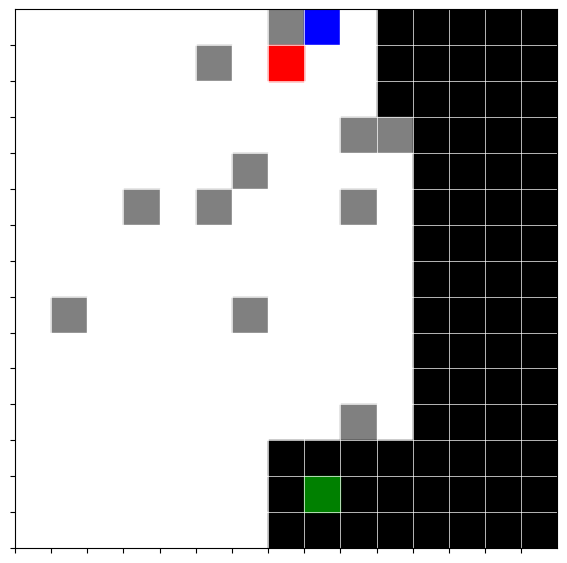

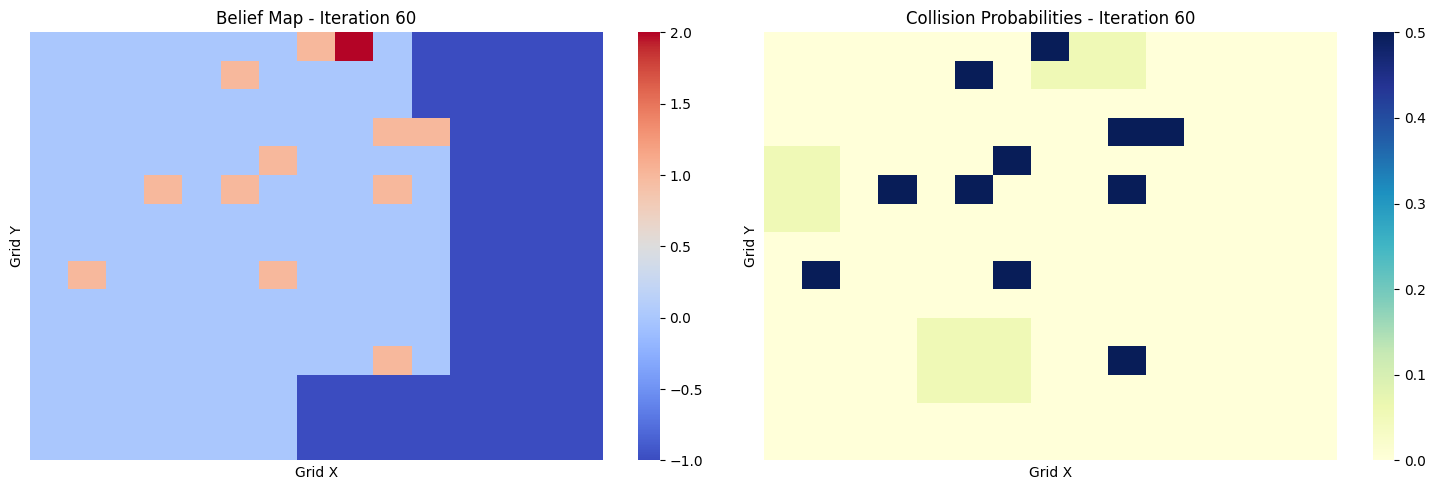

Robot's new position: (2, 9)

Iteration 64:


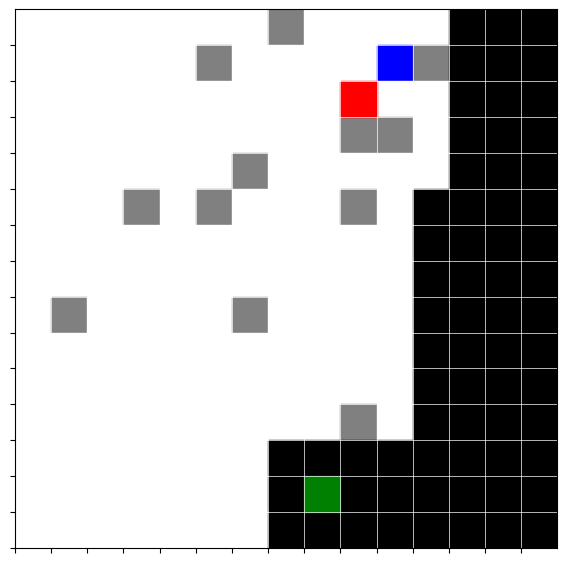

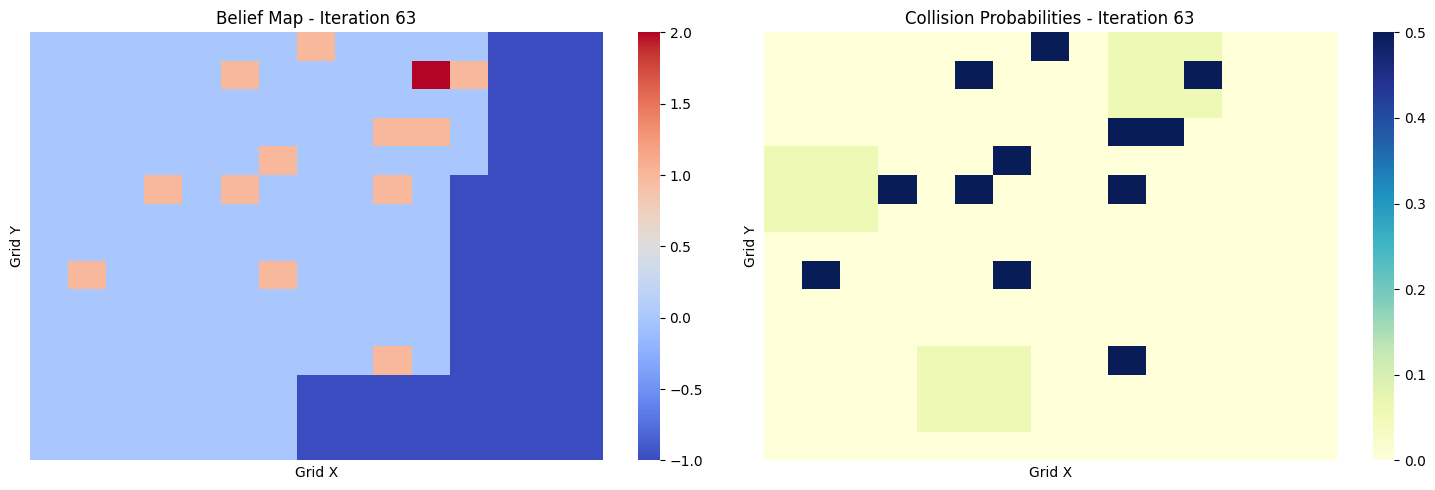

Robot's new position: (3, 11)

Iteration 67:


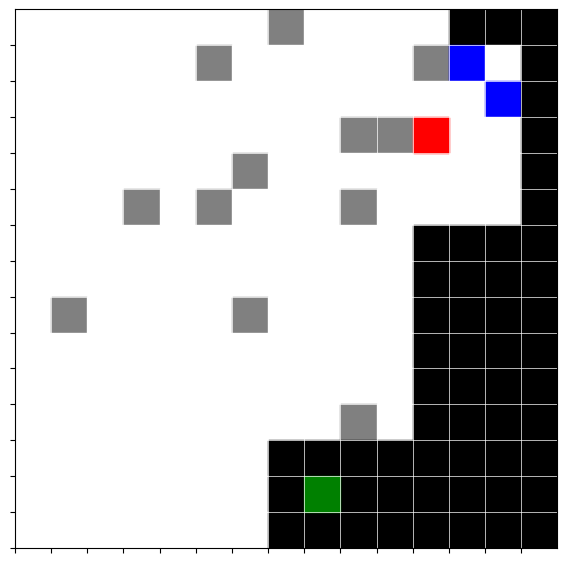

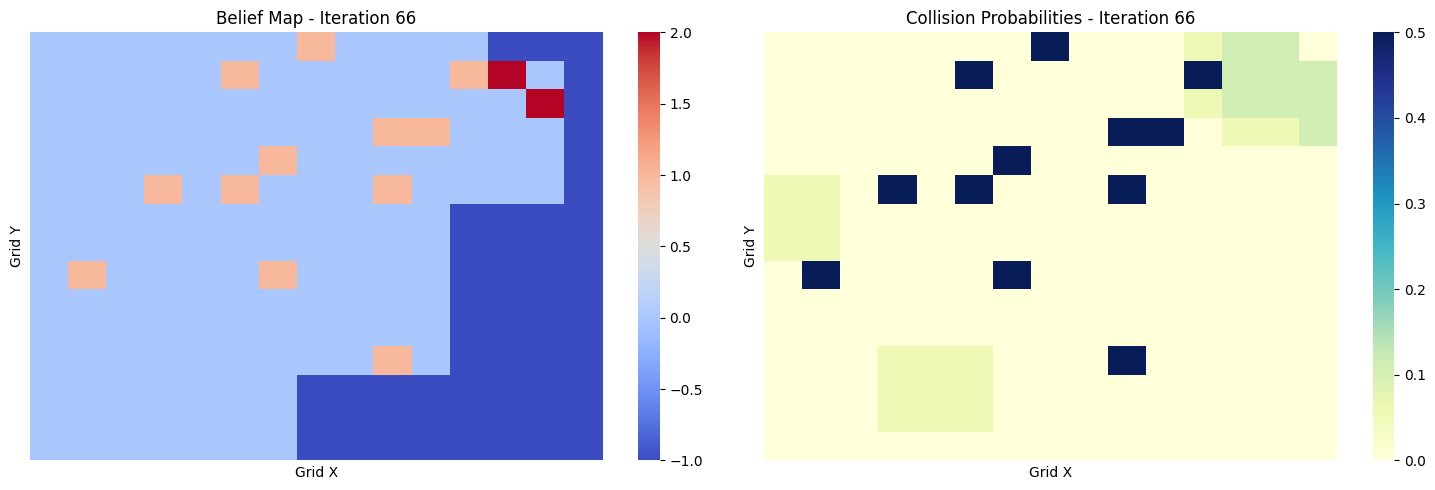

Robot's new position: (5, 11)

Iteration 70:


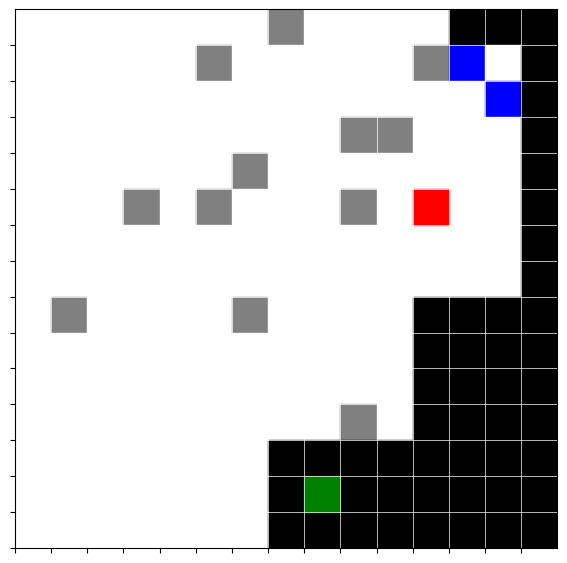

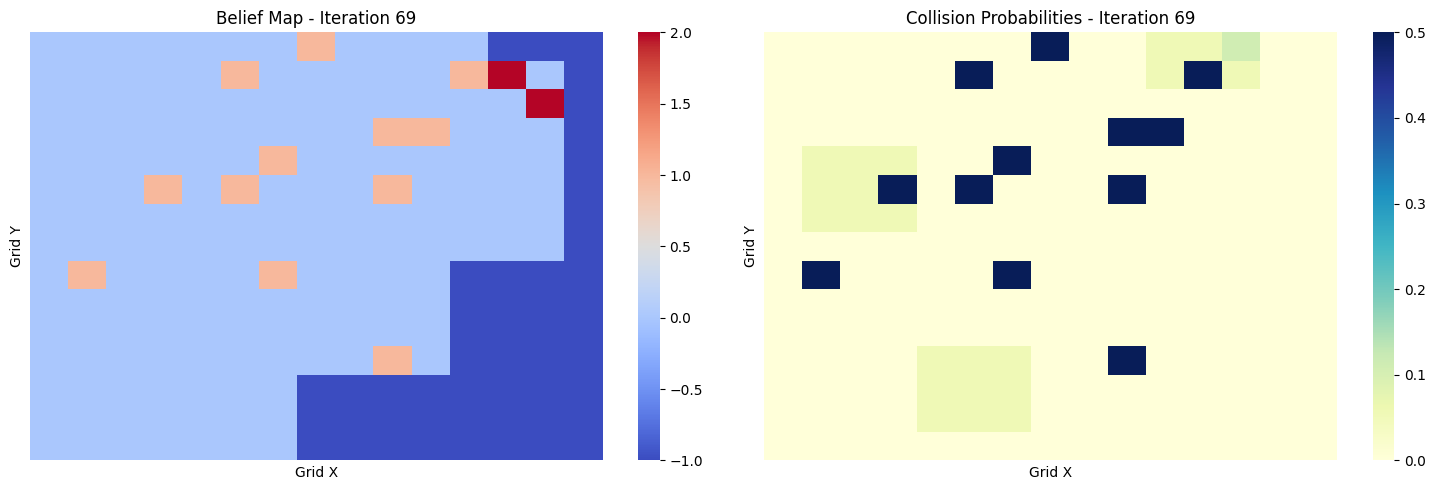

Robot's new position: (7, 11)

Iteration 73:


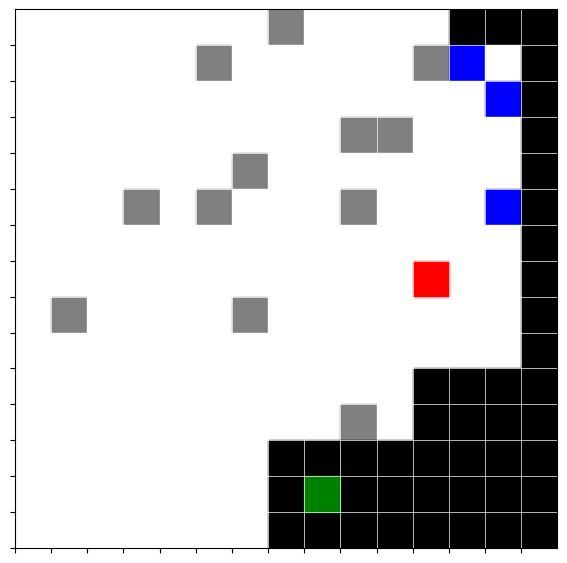

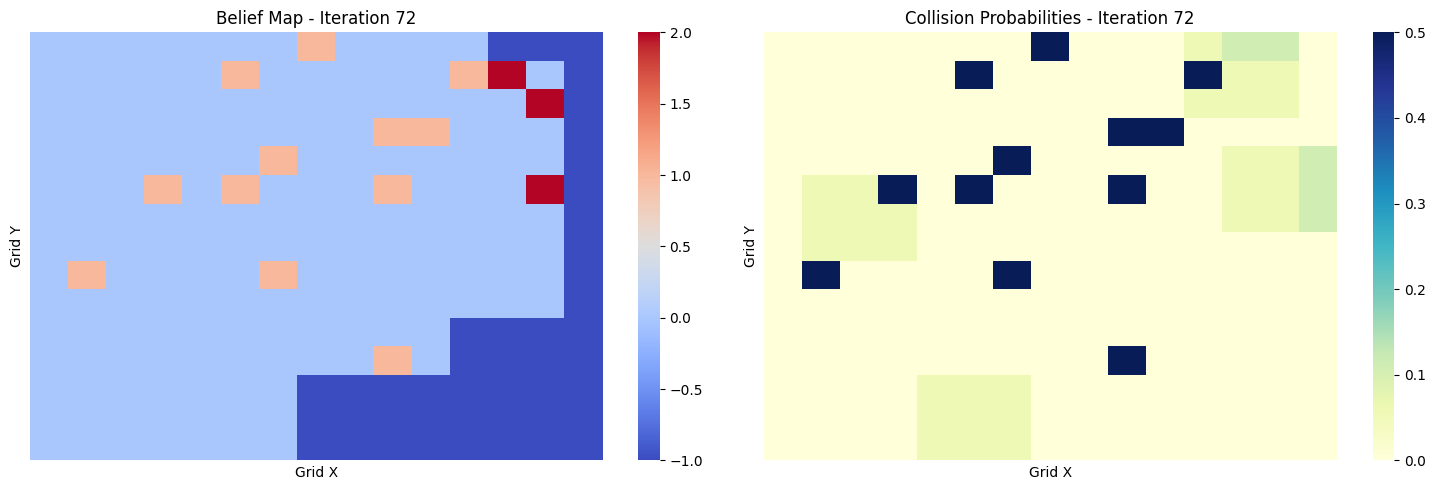

Robot's new position: (9, 11)

Iteration 76:


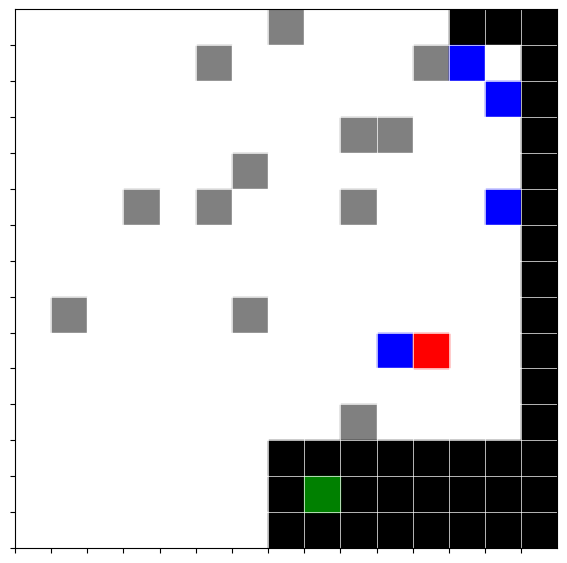

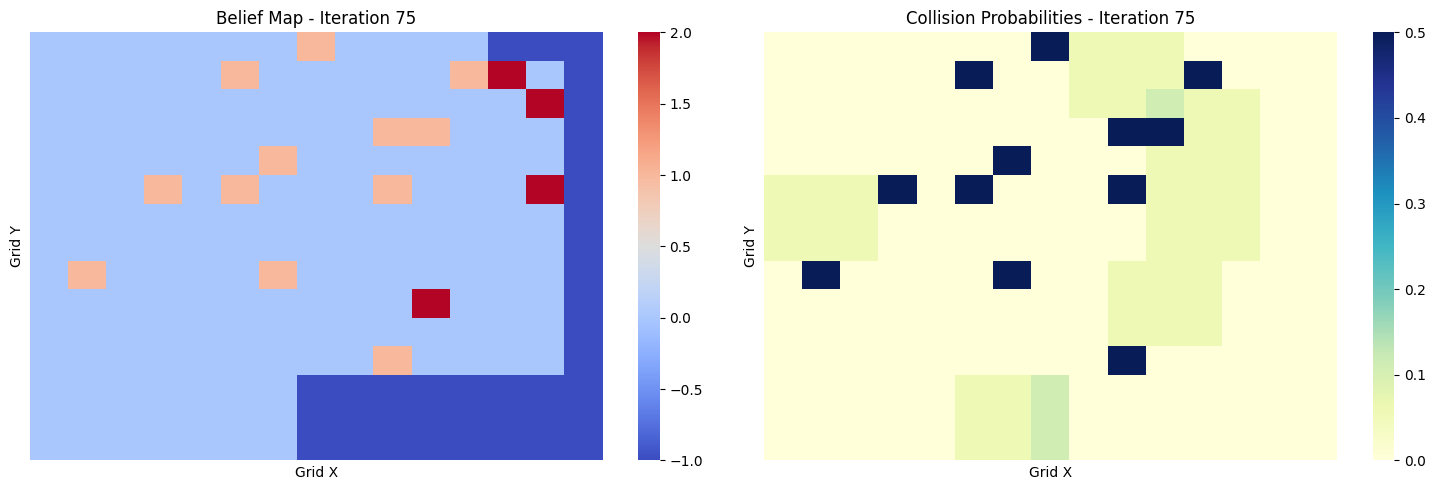

Robot's new position: (9, 13)

Iteration 79:


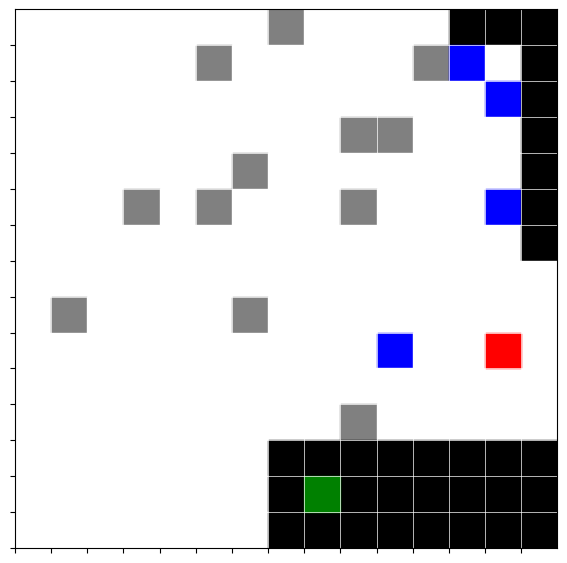

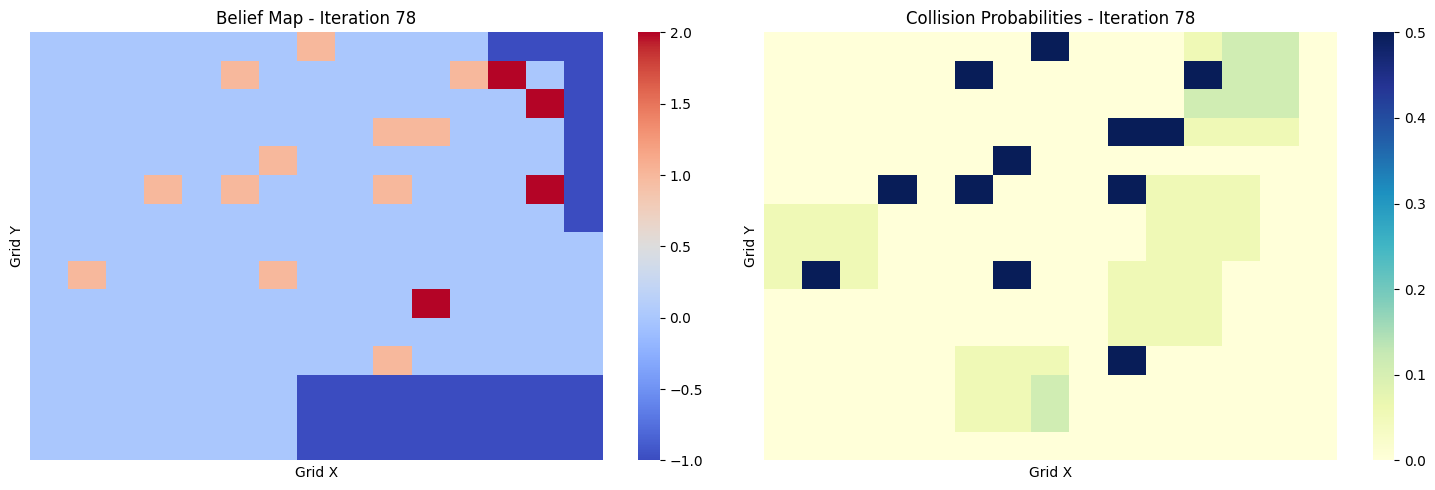

Robot's new position: (11, 13)

Iteration 82:


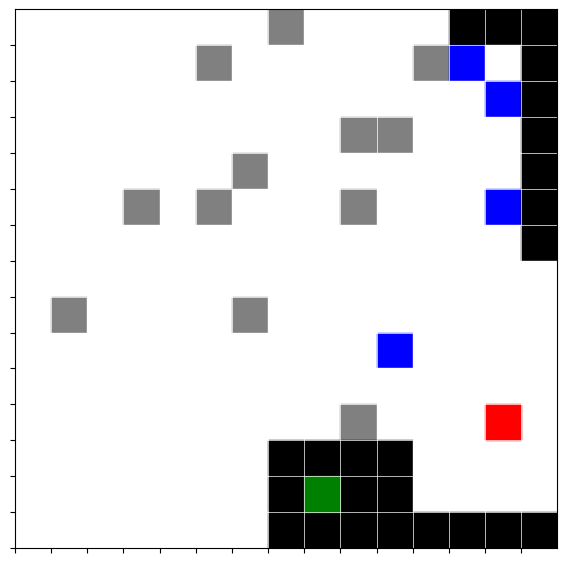

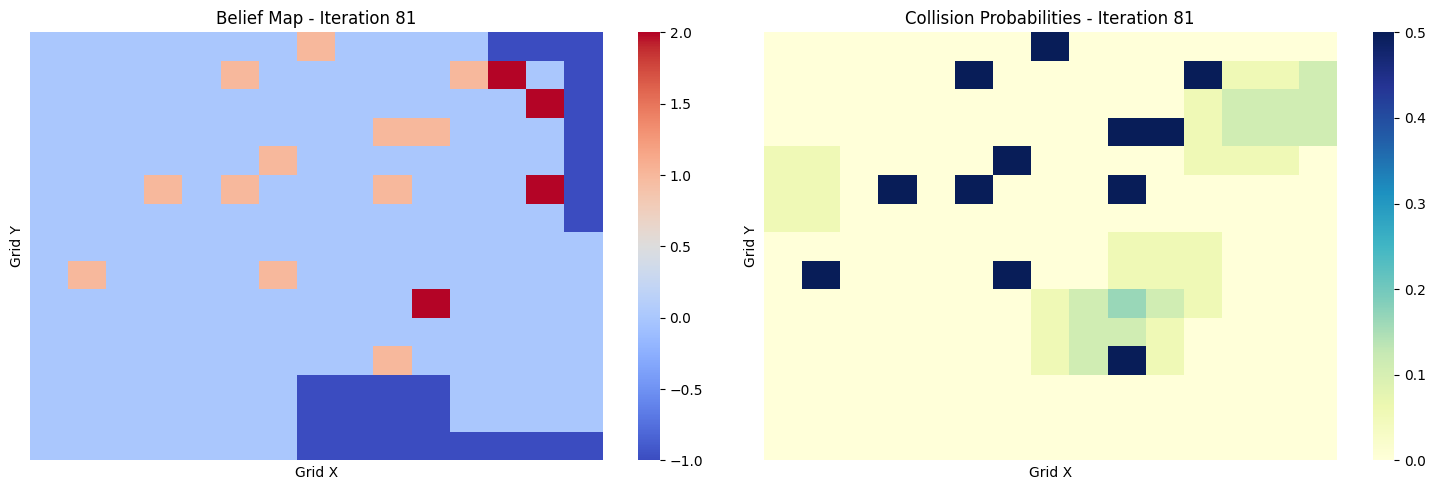

Robot's new position: (13, 13)

Iteration 85:


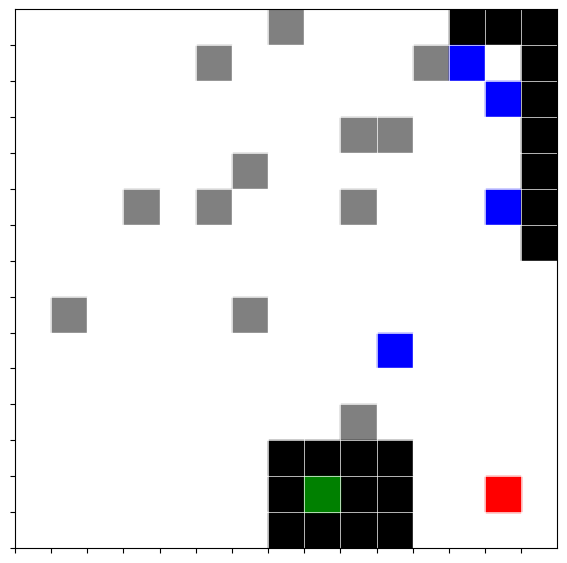

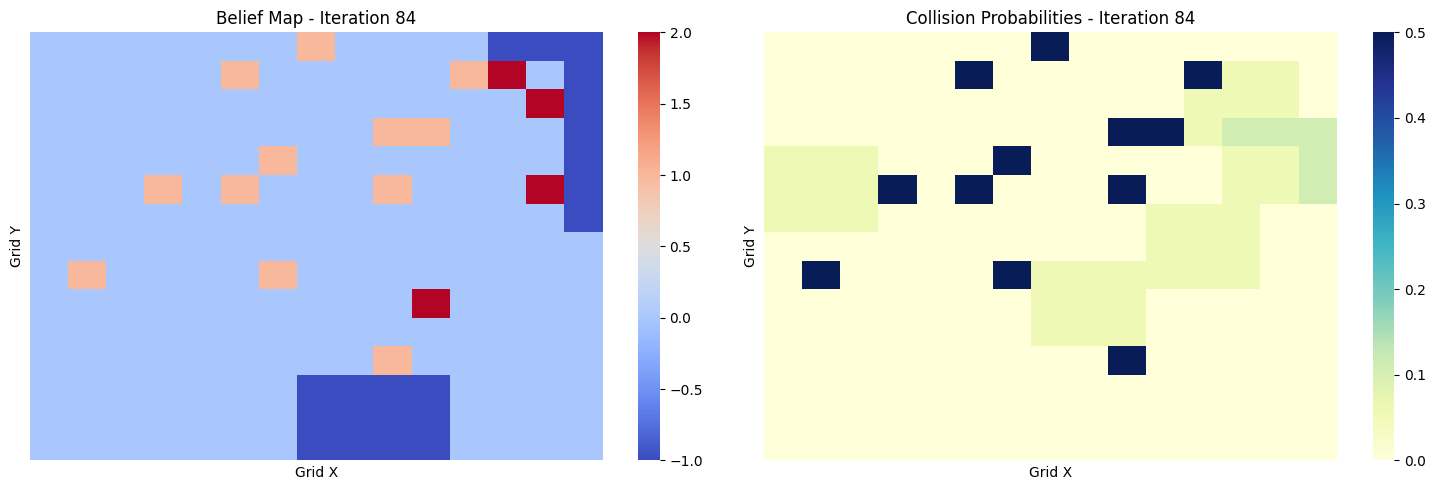

Robot's new position: (13, 11)

Iteration 88:


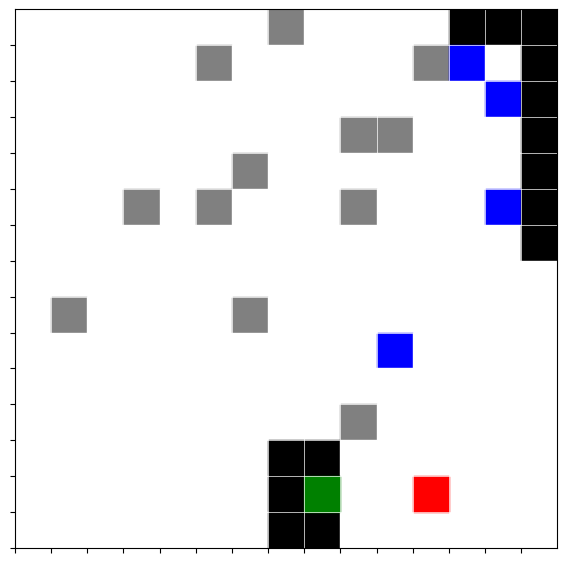

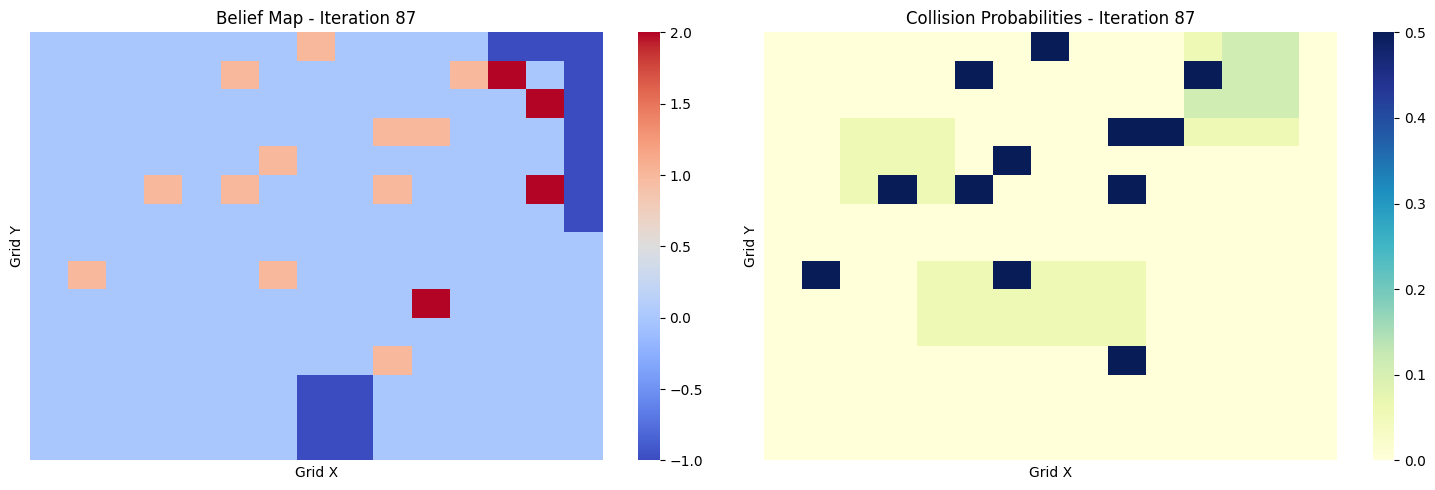

Robot's new position: (13, 9)

Iteration 91:


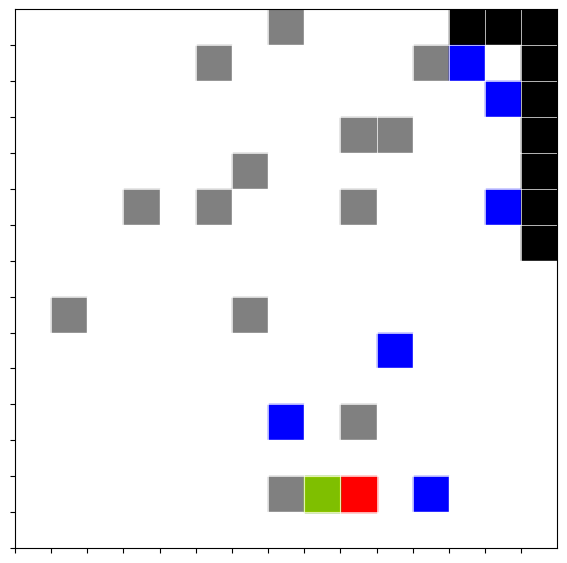

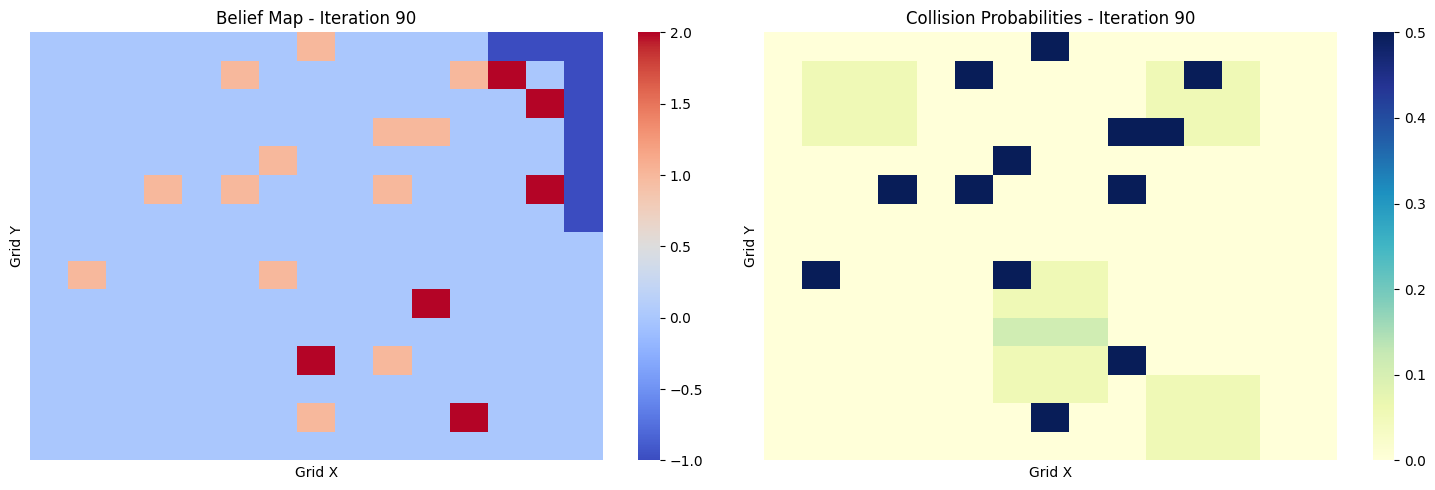

Robot's new position: (13, 8)


In [86]:
import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class DynamicGridEnvironment:
    def __init__(self, size=15, num_particles=100):
        self.size = size
        self.grid = np.zeros((size, size), dtype=int)
        self.robot = (0, 0)  # Robot's starting position
        self.belief_map = np.full((size, size), -1)  # -1 indicates unknown cells
        self.goal = None  # Actual goal (hidden initially)
        self.identified_goal = None  # The goal identified by the robot
        self.walls = []
        self.moving_obstacles = []
        self.obstacle_history = {}
        self.particles = [(self.robot, np.full((size, size), -1), 1 / num_particles) for _ in range(num_particles)]
        self.collision_probabilities = np.zeros((self.size, self.size))  # Initialize collision probabilities
        self.beta_params = np.ones((self.size, self.size, 2))  # Beta distribution parameters [alpha, beta]
        self.generate_static_environment()
        self.generate_moving_obstacles()
        self.set_random_goal()  # Assign a random goal

    def set_random_goal(self):
        """Set a random goal position that is not a wall or obstacle."""
        while True:
            x, y = random.randint(0, self.size - 1), random.randint(0, self.size - 1)
            if (x, y) not in self.walls and (x, y) != self.robot and (x, y) not in self.moving_obstacles:
                self.goal = (x, y)
                break

    def generate_static_environment(self):
        """Generate walls and ensure a valid path exists."""
        while True:
            self.grid.fill(0)
            self.walls = []

            for _ in range(random.randint(self.size // 2, self.size)):
                x, y = random.randint(0, self.size - 1), random.randint(0, self.size - 1)
                if (x, y) != self.robot:
                    self.walls.append((x, y))

            for wall in self.walls:
                self.grid[wall] = 1

            # Ensure there's enough free space for exploration
            if len(self.walls) < (self.size * self.size * 0.5):
                break

    def generate_moving_obstacles(self):
        """Generate moving obstacles with initial positions."""
        self.moving_obstacles = []
        for _ in range(random.randint(5, 10)):
            while True:
                x, y = random.randint(0, self.size - 1), random.randint(0, self.size - 1)
                if (x, y) not in self.walls and (x, y) != self.robot:
                    self.moving_obstacles.append((x, y))
                    self.obstacle_history[(x, y)] = []
                    break

    def move_obstacles(self):
        """Move dynamic obstacles to new positions."""
        new_positions = []
        new_history = {}
        for x, y in self.moving_obstacles:
            possible_moves = [
                (x + dx, y + dy)
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1), (0,0)]
                if 0 <= x + dx < self.size and 0 <= y + dy < self.size
            ]
            random.shuffle(possible_moves)
            for new_pos in possible_moves:
                if new_pos not in self.walls and new_pos not in self.moving_obstacles and new_pos != self.robot:
                    new_positions.append(new_pos)
                    new_history[new_pos] = self.obstacle_history.get((x, y), [])[-4:] + [new_pos]
                    break
            else:
                new_positions.append((x, y))
                new_history[(x, y)] = self.obstacle_history.get((x, y), [])[-4:] + [(x, y)]
        self.moving_obstacles = new_positions
        self.obstacle_history = new_history

    def update_belief_map(self):
        """Update the belief map based on the robot's current view using Rao-Blackwellized particle filtering."""
        robot_x, robot_y = self.robot
        visible_range = 2

        # Reset belief accumulation for visible cells
        belief_accumulator = np.zeros_like(self.belief_map, dtype=float)

        updated_particles = []
        for particle, belief_map, weight in self.particles:
            new_belief_map = belief_map.copy()
            for dx in range(-visible_range, visible_range + 1):
                for dy in range(-visible_range, visible_range + 1):
                    x, y = robot_x + dx, robot_y + dy
                    if 0 <= x < self.size and 0 <= y < self.size:
                        if (x, y) == self.goal:
                            self.identified_goal = self.goal  # The robot identifies the goal
                        if (x, y) in self.walls:
                            new_belief_map[x, y] = 1  # Wall
                        elif (x, y) in self.moving_obstacles:
                            new_belief_map[x, y] = 2  # Moving obstacle
                        else:
                            new_belief_map[x, y] = 0  # Free space

            # Update weights based on the similarity of this particle's belief map to the observation
            observation = self.belief_map
            weight *= np.exp(-np.sum((new_belief_map - observation) ** 2))

            # Append updated particle
            updated_particles.append((particle, new_belief_map, weight))

            # Accumulate the weighted belief map
            belief_accumulator += weight * new_belief_map

        # Normalize weights and resample particles
        total_weight = sum(weight for _, _, weight in updated_particles)
        if total_weight > 0:
            self.particles = [
                (p, b, w / total_weight) for p, b, w in updated_particles
            ]
        else:
            self.particles = updated_particles

        # Update the global belief map with the weighted average
        self.belief_map = np.clip(belief_accumulator / total_weight, -1, 2).astype(int) if total_weight > 0 else self.belief_map

    def predict_collision_probabilities(self):
        """Predict collision probabilities for the entire grid based on moving obstacles."""
        self.collision_probabilities.fill(0)
        for x, y in self.moving_obstacles:
            if self.belief_map[x, y] != -1:
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1), (0,0)]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < self.size and 0 <= ny < self.size:
                        self.collision_probabilities[nx, ny] += 0.11  # Lower probability in neighboring cells
        for x, y in self.walls:
            if self.belief_map[x, y] != -1:
                self.collision_probabilities[x, y] = 1.0  # High probability at wall position

        # Update collision probabilities using Beta-Bernoulli prior
        for x in range(self.size):
            for y in range(self.size):
                if self.belief_map[x, y] != -1:  # Only consider known cells
                    if [x, y] not in self.walls:
                        alpha, beta = self.beta_params[x, y]
                        posterior_mean = alpha / (alpha + beta)
                        self.collision_probabilities[x, y] *= posterior_mean

        self.collision_probabilities = np.clip(self.collision_probabilities, 0, 1)  # Ensure probabilities are valid

    def update_beta_prior(self, position, collision_occurred):
        """Update the Beta distribution parameters based on collision observations."""
        x, y = position
        if collision_occurred:
            self.beta_params[x, y][0] += 1  # Increment alpha for collision
        else:
            self.beta_params[x, y][1] += 1  # Increment beta for no collision

    def a_star_search(self):
        """Perform A* search to find the best path to an unexplored area or the goal."""
        target = self.identified_goal if self.identified_goal else None
        open_set = [(self.robot, 0)]  # (position, cost)
        came_from = {}
        cost_so_far = {self.robot: 0}

        while open_set:
            open_set.sort(key=lambda x: x[1])  # Sort by cost
            current, current_cost = open_set.pop(0)

            if target and current == target:
                break

            if not target and self.belief_map[current[0], current[1]] == -1:
                target = current
                break

            neighbors = [
                (current[0] + dx, current[1] + dy)
                for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
                if 0 <= current[0] + dx < self.size and 0 <= current[1] + dy < self.size
            ]

            for neighbor in neighbors:
                if self.belief_map[neighbor[0], neighbor[1]] == 1:  # Wall
                    continue

                move_cost = 1.414 if abs(neighbor[0] - current[0]) + abs(neighbor[1] - current[1]) == 2 else 1
                collision_penalty = self.collision_probabilities[neighbor[0], neighbor[1]] * 10  # Add collision penalty
                new_cost = cost_so_far[current] + move_cost + collision_penalty
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    unexplored_cells = [(x, y) for x in range(self.size) for y in range(self.size) if self.belief_map[x, y] == -1]
                    if unexplored_cells:
                        closest_unexplored = min(unexplored_cells, key=lambda cell: max(abs(cell[0] - neighbor[0]), abs(cell[1] - neighbor[1])))
                        priority = new_cost + max(abs(closest_unexplored[0] - neighbor[0]), abs(closest_unexplored[1] - neighbor[1]))
                    else:
                        priority = new_cost
                    open_set.append((neighbor, priority))
                    came_from[neighbor] = current

        # Reconstruct path
        path = []
        current = target
        while current in came_from:
            path.append(current)
            current = came_from[current]
        path.reverse()
        return path

    def choose_next_state(self):
        self.update_belief_map()
        self.predict_collision_probabilities()
        path = self.a_star_search()
        if path:
            steps = min(2, len(path))
            next_position = path[steps - 1]

            collision_occurred = next_position in self.walls or next_position in self.moving_obstacles



            if collision_occurred:
                self.update_beta_prior(next_position, collision_occurred)
                print(f"Collision detected at {next_position}.")
                return True, steps
            else:
                self.robot = next_position
                return False, steps



    def plot_belief_map(self):
        """Plot the belief map showing known and unknown areas."""
        color_map = {-1: 'black', 0: 'white', 1: 'grey', 2: 'blue'}
        fig, ax = plt.subplots(figsize=(7, 7))
        for x in range(self.size):
            for y in range(self.size):
                rect = plt.Rectangle((y, self.size - x - 1), 1, 1, color=color_map[self.belief_map[x, y]])
                ax.add_patch(rect)

        # Highlight robot
        rx, ry = self.robot
        rect = plt.Rectangle((ry, self.size - rx - 1), 1, 1, color='red')
        ax.add_patch(rect)

        # Highlight actual goal
        if self.goal:
            gx, gy = self.goal
            rect = plt.Rectangle((gy, self.size - gx - 1), 1, 1, color='green')
            ax.add_patch(rect)

        # Highlight identified goal
        if self.identified_goal:
            ix, iy = self.identified_goal
            rect = plt.Rectangle((iy, self.size - ix - 1), 1, 1, color='yellow', alpha=0.5)
            ax.add_patch(rect)

        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.set_xticks(range(self.size))
        ax.set_yticks(range(self.size))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True, which='both', color='white', linewidth=0.5)
        plt.show()

    def plot_effectiveness(self, iteration):
        """Visualize RBPF and collision probability progress."""
        # Plot collision probabilities
        plt.figure(figsize=(15, 5))

        # Subplot 1: Belief Map
        plt.subplot(1, 2, 1)
        sns.heatmap(self.belief_map, annot=False, cmap="coolwarm", cbar=True, xticklabels=False, yticklabels=False)
        plt.title(f"Belief Map - Iteration {iteration}")
        plt.xlabel("Grid X")
        plt.ylabel("Grid Y")

        # Subplot 2: Collision Probabilities
        plt.subplot(1, 2, 2)
        sns.heatmap(self.collision_probabilities, annot=False, cmap="YlGnBu", cbar=True, xticklabels=False, yticklabels=False)
        plt.title(f"Collision Probabilities - Iteration {iteration}")
        plt.xlabel("Grid X")
        plt.ylabel("Grid Y")

        plt.tight_layout()
        plt.show()

    def plot_actual_map(self):
        """Plot the actual map showing the true environment state."""
        fig, ax = plt.subplots(figsize=(7, 7))
        for x in range(self.size):
            for y in range(self.size):
                if (x, y) in self.walls:
                    rect = plt.Rectangle((y, self.size - x - 1), 1, 1, color='grey')  # Wall
                elif (x, y) in self.moving_obstacles:
                    rect = plt.Rectangle((y, self.size - x - 1), 1, 1, color='blue')  # Moving obstacle
                else:
                    rect = plt.Rectangle((y, self.size - x - 1), 1, 1, color='white')  # Free space
                ax.add_patch(rect)

        # Highlight robot
        rx, ry = self.robot
        rect = plt.Rectangle((ry, self.size - rx - 1), 1, 1, color='red')  # Robot
        ax.add_patch(rect)

        # Highlight actual goal
        if self.goal:
            gx, gy = self.goal
            rect = plt.Rectangle((gy, self.size - gx - 1), 1, 1, color='green')
            ax.add_patch(rect)

        ax.set_xlim(0, self.size)
        ax.set_ylim(0, self.size)
        ax.set_xticks(range(self.size))
        ax.set_yticks(range(self.size))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True, which='both', color='black', linewidth=0.5)
        plt.title("Actual Map")
        plt.show()

# Example usage
def create_environment():
    env = DynamicGridEnvironment(size=15)
    return env

# Initialize environment
env = create_environment()
print("Initial Belief Map:")
i = 0
# Update belief map and plot
while env.robot != env.goal:
    print(f"\nIteration {i + 1}:")
    env.move_obstacles()
    env.update_belief_map()
    env.predict_collision_probabilities()
    env.plot_belief_map()
    env.plot_effectiveness(i)
    collision = env.choose_next_state()
    if collision:
        i+=2
        env.move_obstacles()
        env.move_obstacles()
    print(f"Robot's new position: {env.robot}")
    i += 1


Working on Episode 0
Working on Episode 1
Working on Episode 2
Working on Episode 3
Working on Episode 4
Working on Episode 5
Working on Episode 6
Working on Episode 7
Working on Episode 8
Working on Episode 9
Working on Episode 10
Working on Episode 11
Working on Episode 12
Working on Episode 13
Working on Episode 14
Collision detected at (13, 8).
Working on Episode 15
Working on Episode 16
Working on Episode 17
Working on Episode 18
Working on Episode 19
Working on Episode 20
Working on Episode 21
Working on Episode 22
Working on Episode 23
Working on Episode 24
Working on Episode 25
Working on Episode 26
Working on Episode 27
Working on Episode 28
Working on Episode 29
Working on Episode 30
Working on Episode 31
Working on Episode 32
Working on Episode 33
Working on Episode 34
Working on Episode 35
Working on Episode 36
Working on Episode 37
Working on Episode 38
Working on Episode 39
Working on Episode 40
Working on Episode 41
Working on Episode 42
Working on Episode 43
Working on 

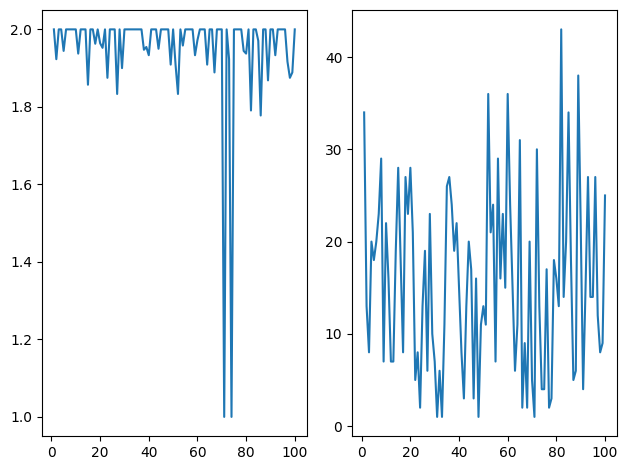

In [87]:
collision_count = []
iteration_count = []
velocity = []
for ep in range(100):
  print(f"Working on Episode {ep}")
  env = create_environment()
  # print("Initial Environment:")
  i =0
  total_dist = 0
  collision_c = 0
  # Update and plot
  while env.robot != env.goal:
      env.move_obstacles()
      # env.plot_environment()
      collision, dist = env.choose_next_state()
      if collision:
        collision_c +=1
        i+=2
        env.move_obstacles()
        env.move_obstacles()
      i+=1
      if i == 100:
        break
      total_dist += dist

  collision_count.append(collision_c)
  iteration_count.append(i)
  velocity.append(total_dist/i)
  # print(f"Robot's new position: {env.robot}")
  # print(ep)
eps = [i for i in range(1, 101)]
print(f"Average number of collisions: {np.mean(collision_count)}")
print(f"Average number of iterations taken: {np.mean(iteration_count)}")
print(f"Average speed: {np.mean(velocity)}")

plt.subplot(1, 2, 1)
plt.plot(eps, velocity, label='Speed')
plt.subplot(1, 2, 2)
plt.plot(eps, iteration_count, label='Time Taken')
plt.tight_layout()
plt.show()